---
# Titanic EDA
---
---
### Data Importation
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize']= [6,3]
plt.rcParams['figure.dpi'] = 175

In [4]:
titanic = sns.load_dataset('titanic')
titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [5]:
cols = titanic.columns

In [6]:
titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [9]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [11]:
plt.style.use('ggplot')

In [12]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

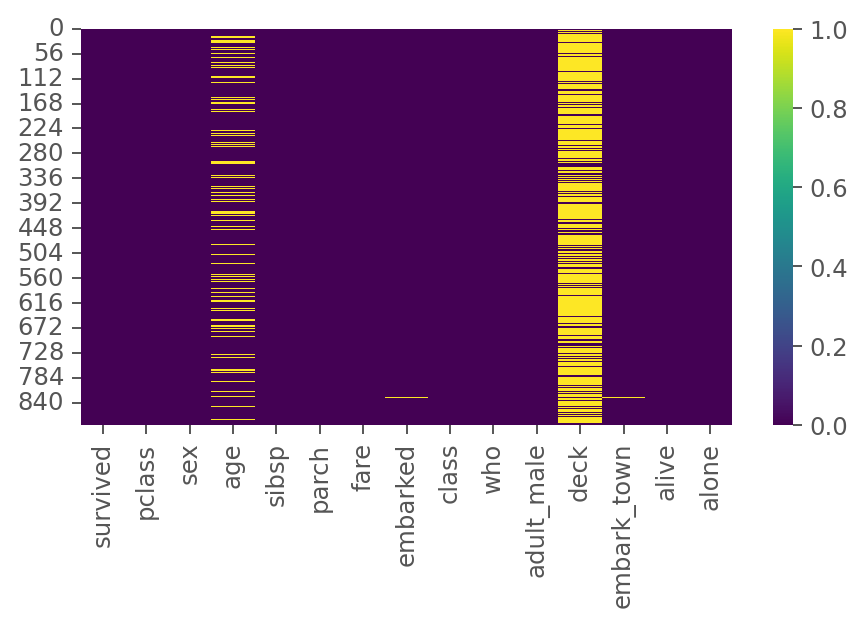

In [13]:
sns.heatmap(titanic.isnull(), cmap='viridis')

<AxesSubplot:>

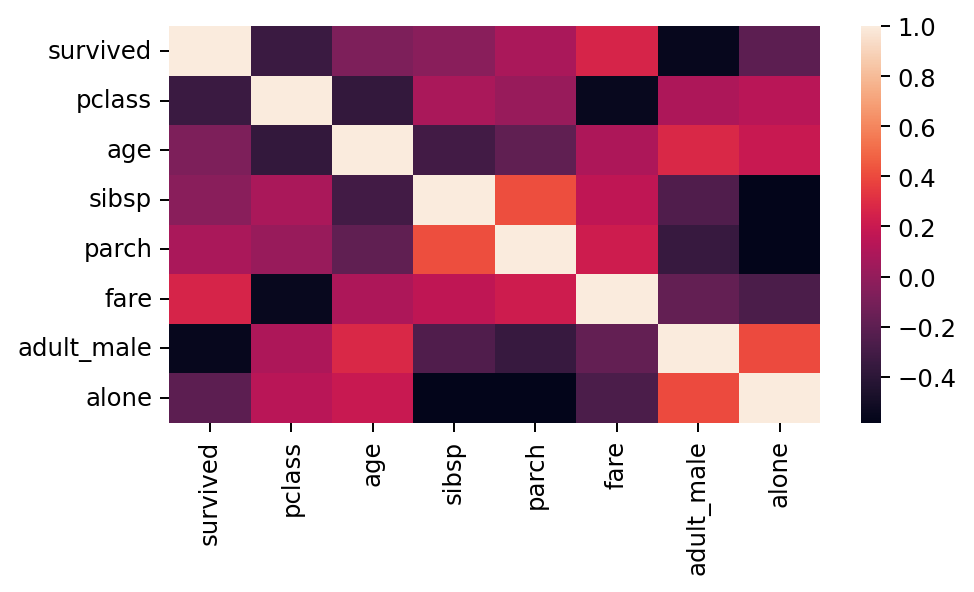

In [10]:
sns.heatmap(titanic.corr())

In [29]:
for_pair = titanic[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']]
for_pair

survived  pclass   age  sibsp  parch     fare
0           0       3  22.0      1      0   7.2500
1           1       1  38.0      1      0  71.2833
2           1       3  26.0      0      0   7.9250
3           1       1  35.0      1      0  53.1000
4           0       3  35.0      0      0   8.0500
..        ...     ...   ...    ...    ...      ...
886         0       2  27.0      0      0  13.0000
887         1       1  19.0      0      0  30.0000
888         0       3   NaN      1      2  23.4500
889         1       1  26.0      0      0  30.0000
890         0       3  32.0      0      0   7.7500

[891 rows x 6 columns]

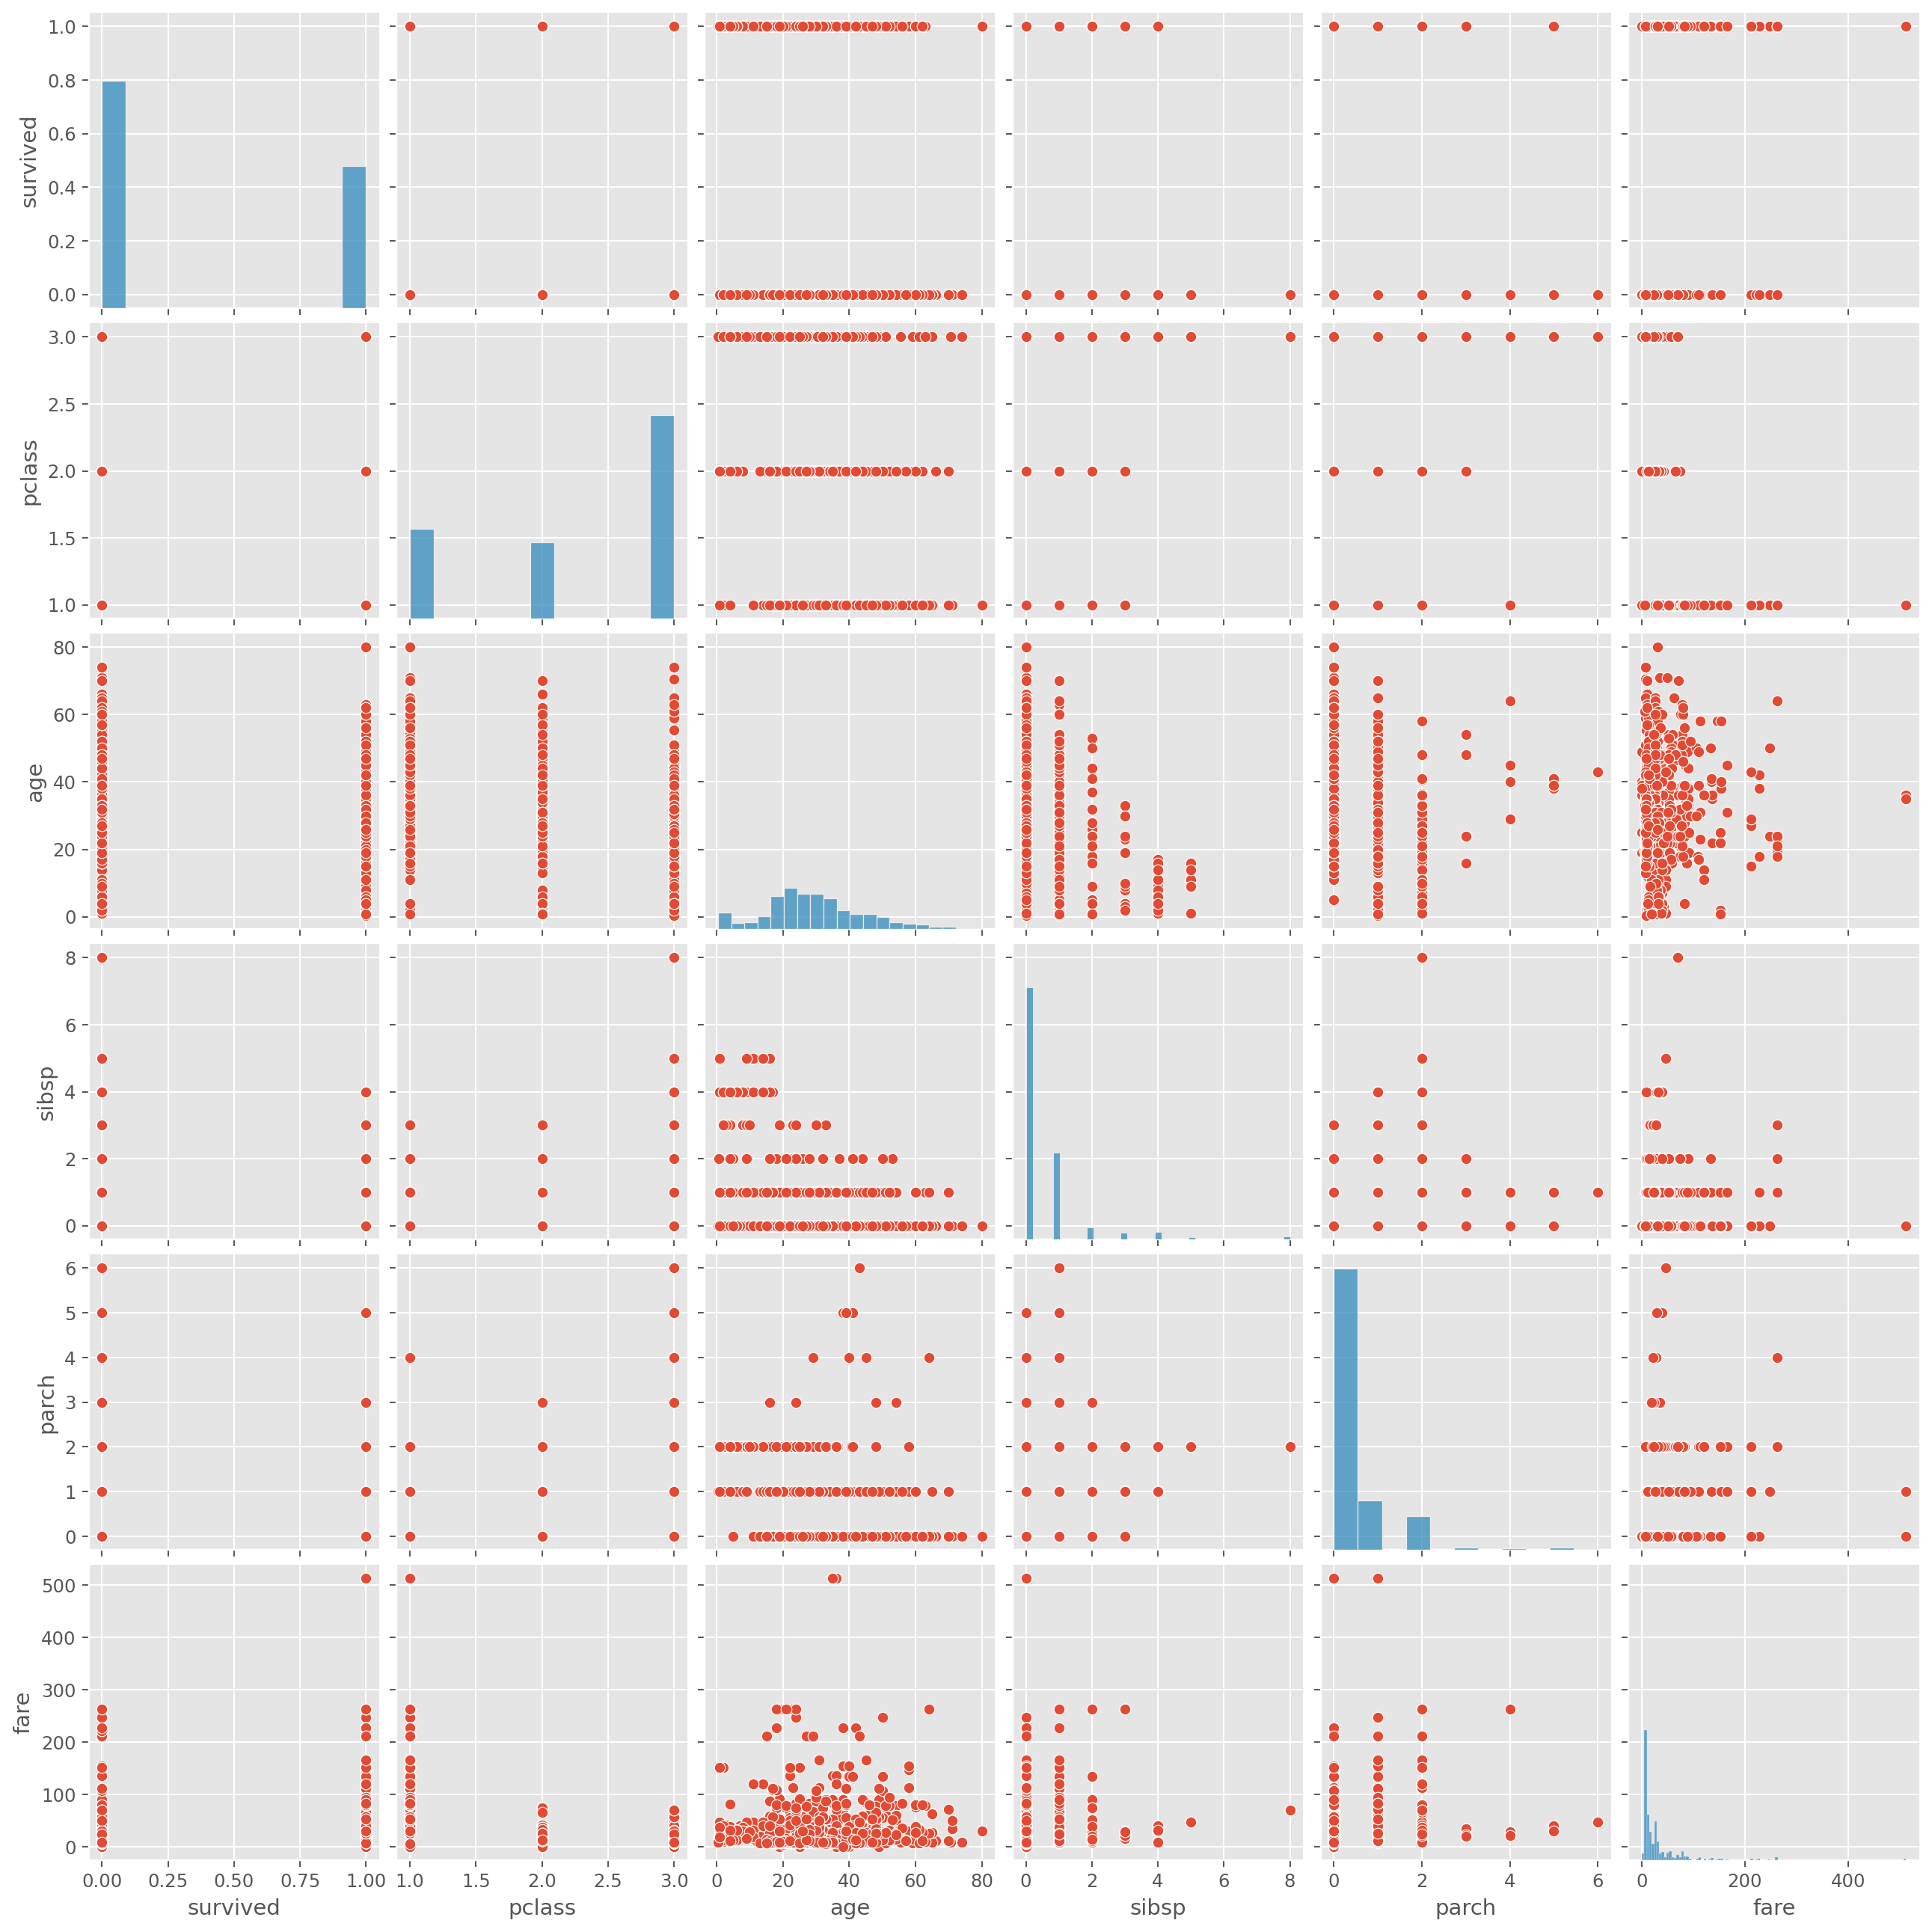

In [30]:
sns.pairplot(for_pair)

In [19]:
a = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']
for col in a:
    print(titanic[col].value_counts())

0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64
True     537
False    354
Name: adult_male, dtype: int64
True     537
False    354
Name: alone, dtype: int64


---
### Univariate Analysis
---

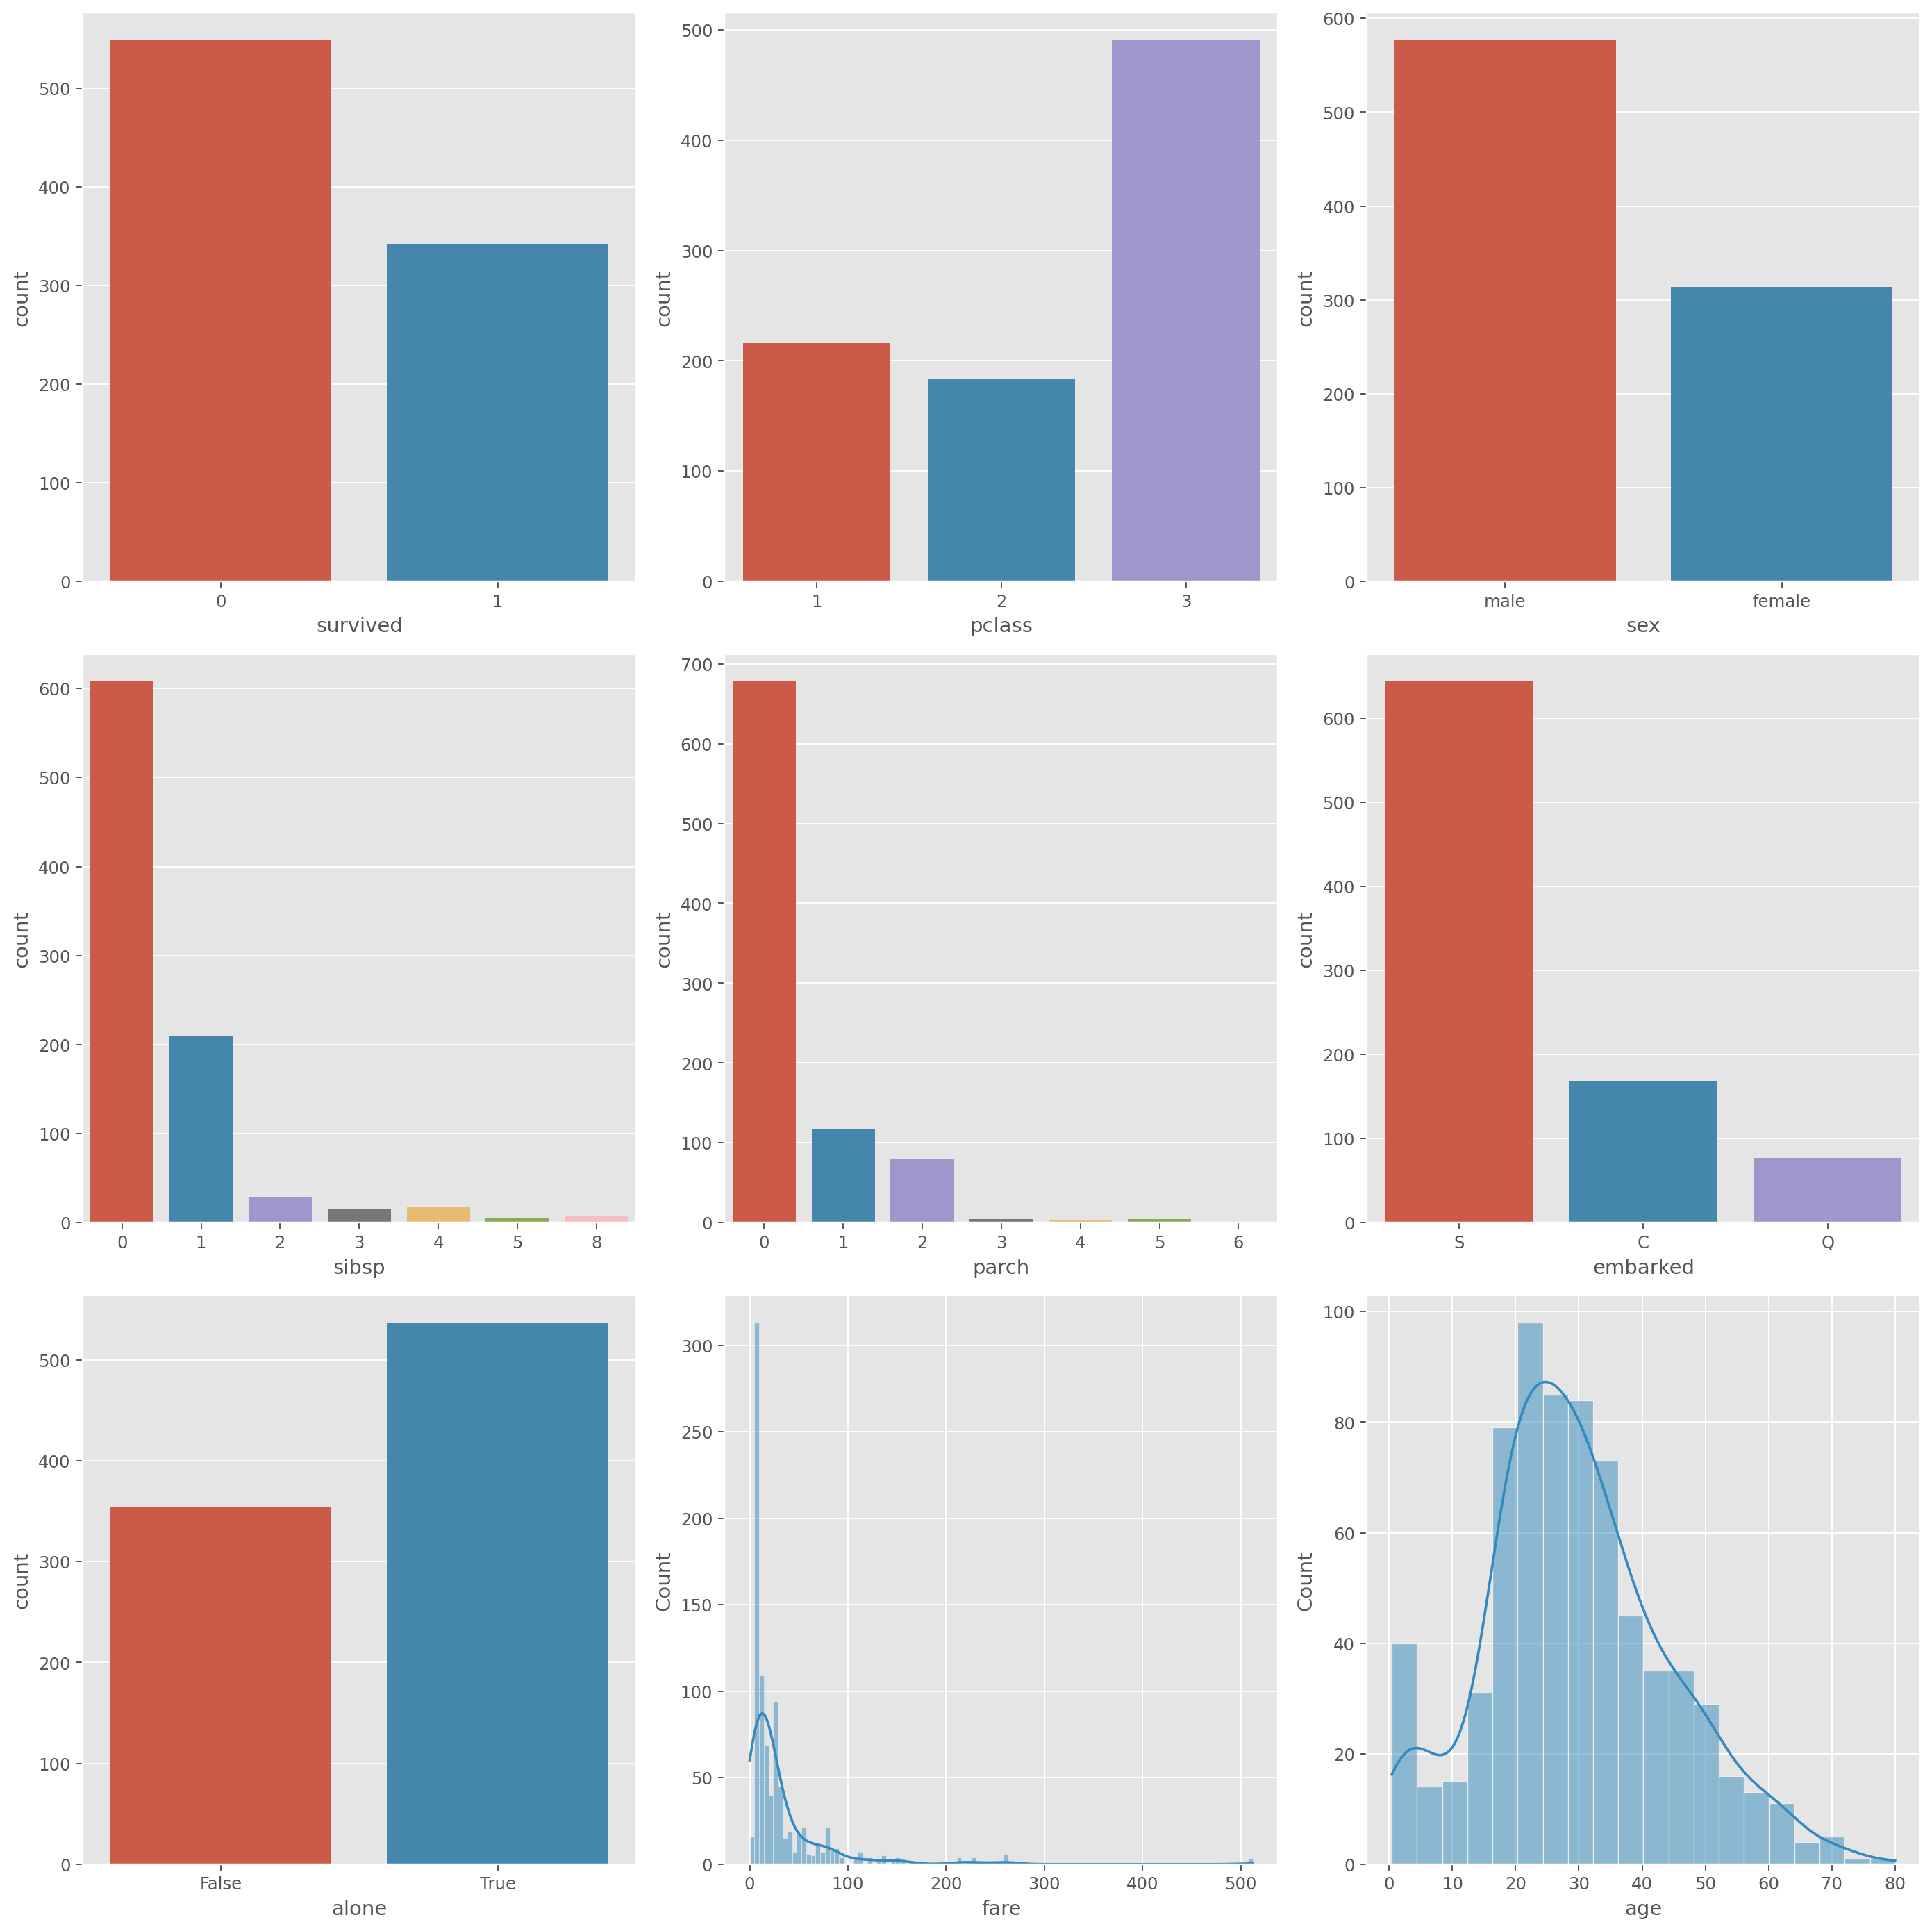

In [25]:
fig, ax =  plt.subplots(3,3, figsize=(16,16))
sns.countplot(x='survived', data= titanic, ax = ax[0][0])
sns.countplot(x='pclass', data= titanic, ax = ax[0][1])
sns.countplot(x='sex', data= titanic, ax = ax[0][2])
sns.countplot(x='sibsp', data= titanic, ax = ax[1][0])
sns.countplot(x='parch', data= titanic, ax = ax[1][1])
sns.countplot(x='embarked', data= titanic, ax = ax[1][2])
sns.countplot(x='alone', data= titanic, ax = ax[2][0])
sns.histplot(titanic['fare'], kde=True, ax= ax[2][1])
sns.histplot(titanic['age'], kde= True, ax= ax[2][2])

plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


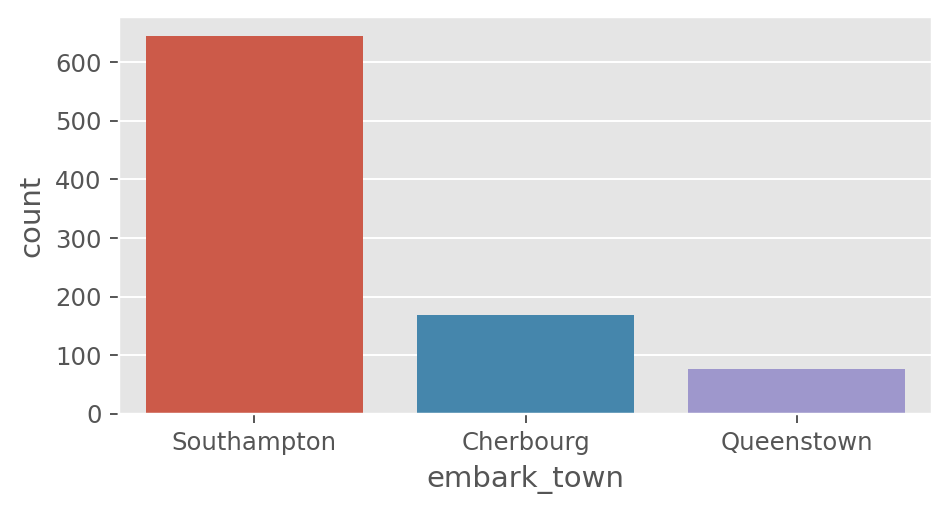

In [26]:
sns.countplot(titanic['embark_town'])
plt.show()

---
## Survived
___

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


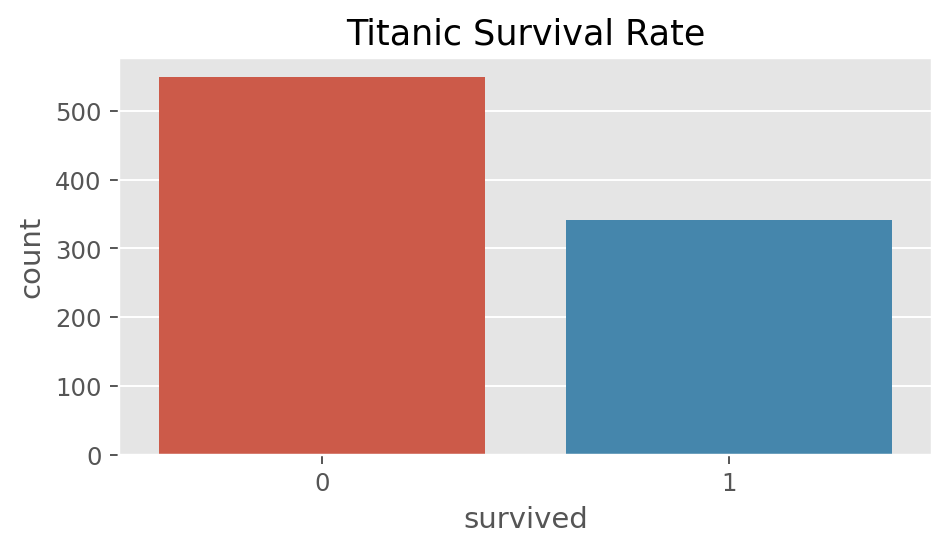

In [31]:
sns.countplot('survived', data=titanic)
plt.title('Titanic Survival Rate')
plt.show()

<AxesSubplot:ylabel='Frequency'>

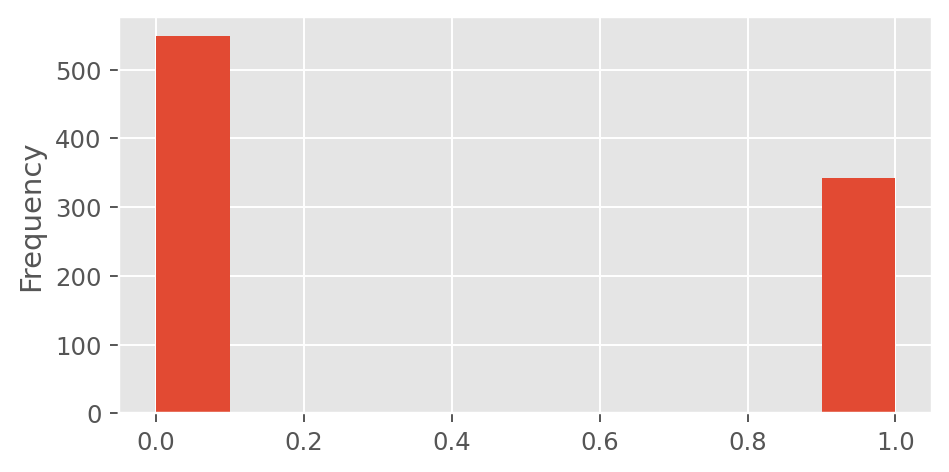

In [32]:
titanic.survived.plot.hist()

<AxesSubplot:ylabel='survived'>

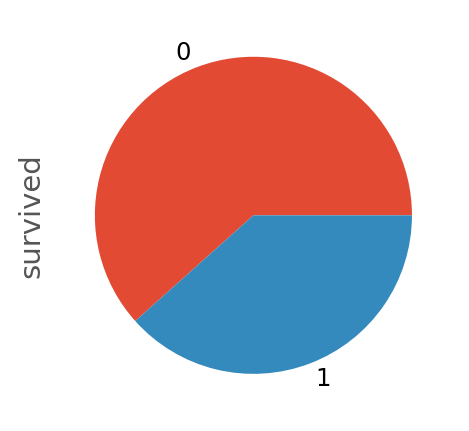

In [34]:
titanic['survived'].value_counts().plot.pie()

<AxesSubplot:ylabel='survived'>

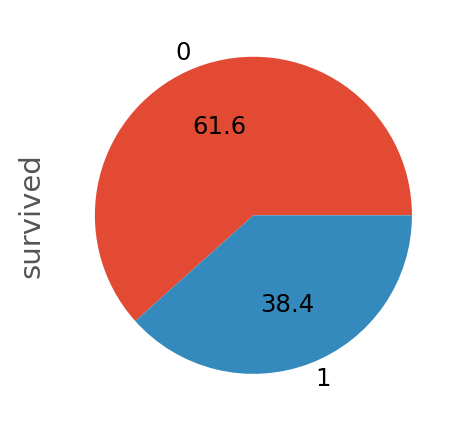

In [35]:
titanic['survived'].value_counts().plot.pie(autopct='%1.1f')

<AxesSubplot:ylabel='survived'>

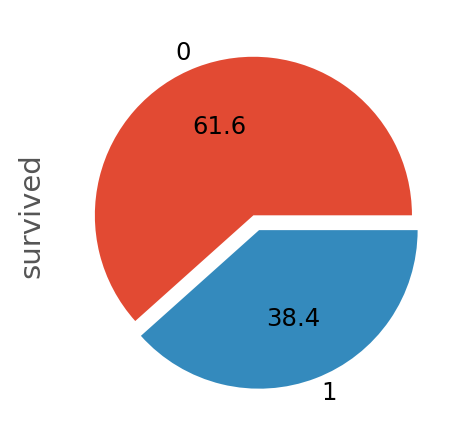

In [36]:
explode= [0.0,.1]
titanic['survived'].value_counts().plot.pie(autopct='%1.1f',explode=explode)


---
### P-Class
---

In [37]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [38]:
titanic.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

In [39]:
titanic.groupby(['parch','survived'])['survived'].count()

parch  survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: survived, dtype: int64

In [40]:
titanic.groupby(['sibsp','survived'])['survived'].count()

sibsp  survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: survived, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


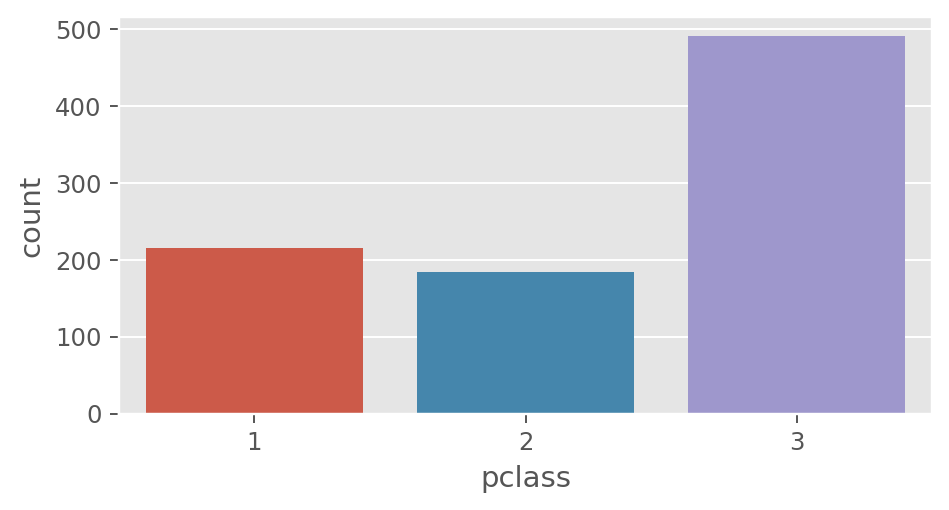

In [41]:
sns.countplot('pclass',data= titanic)
plt.show()

<AxesSubplot:xlabel='pclass', ylabel='count'>

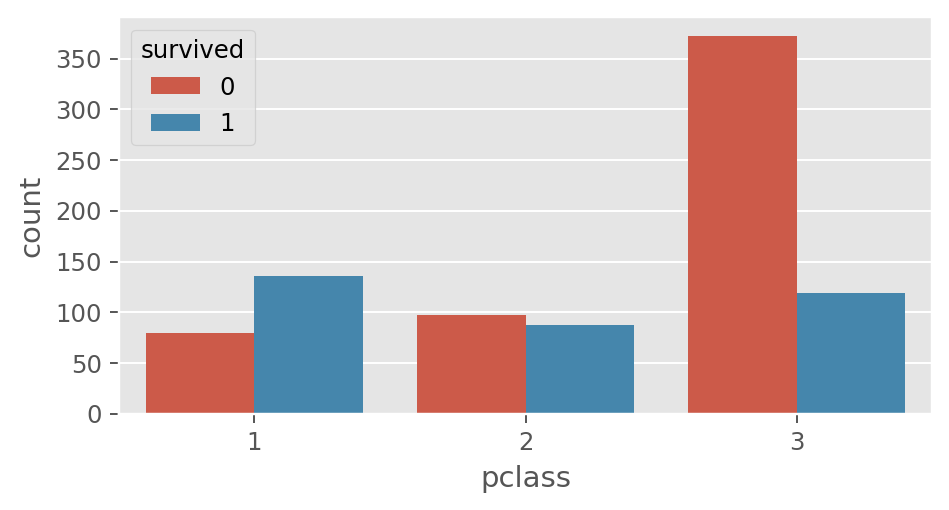

In [43]:
sns.countplot(x='pclass',data=titanic, hue='survived')

<AxesSubplot:ylabel='pclass'>

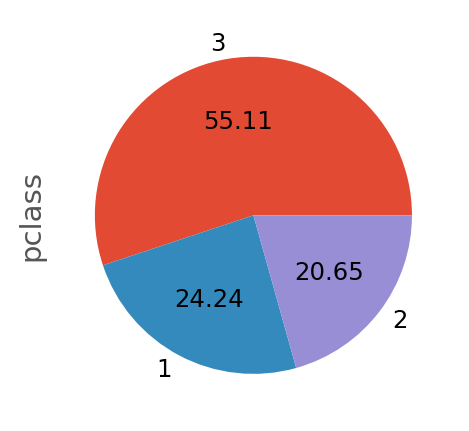

In [44]:
titanic['pclass'].value_counts().plot.pie(autopct='%1.2f')

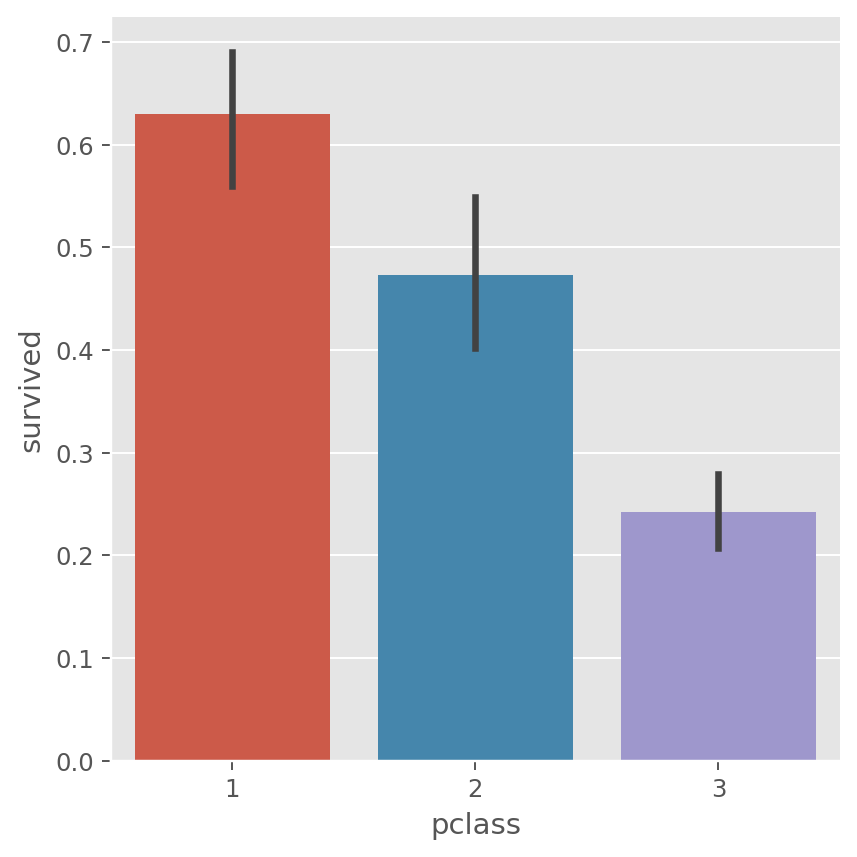

In [46]:
sns.catplot(x='pclass', y='survived', data= titanic,kind= 'bar')

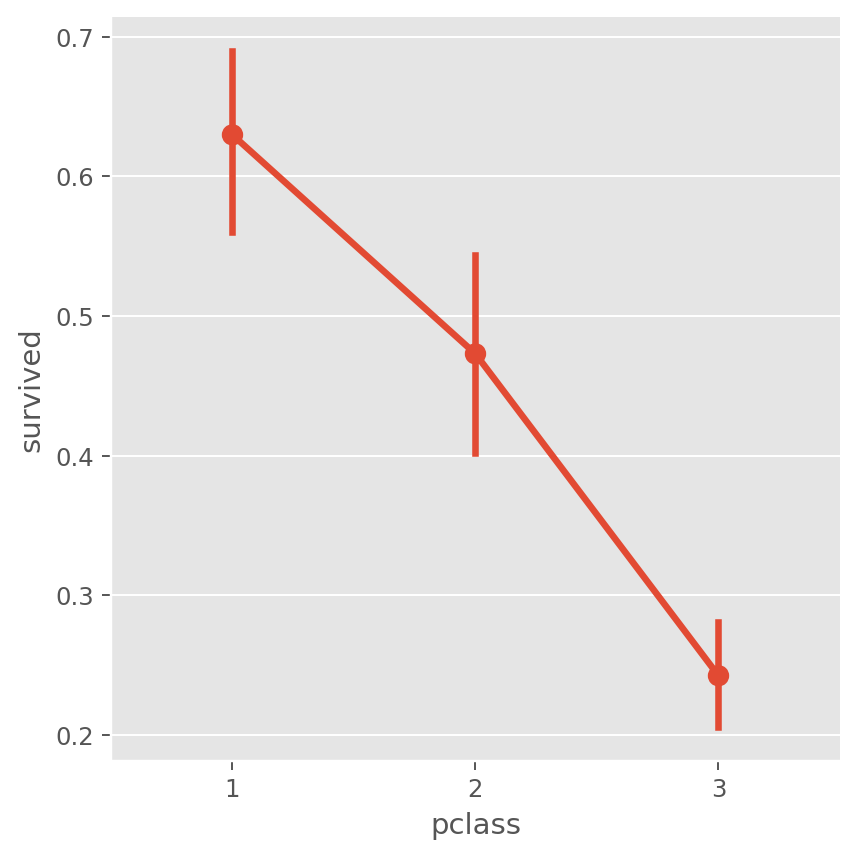

In [47]:
sns.catplot(x= 'pclass', y = 'survived',kind= 'point', data= titanic)

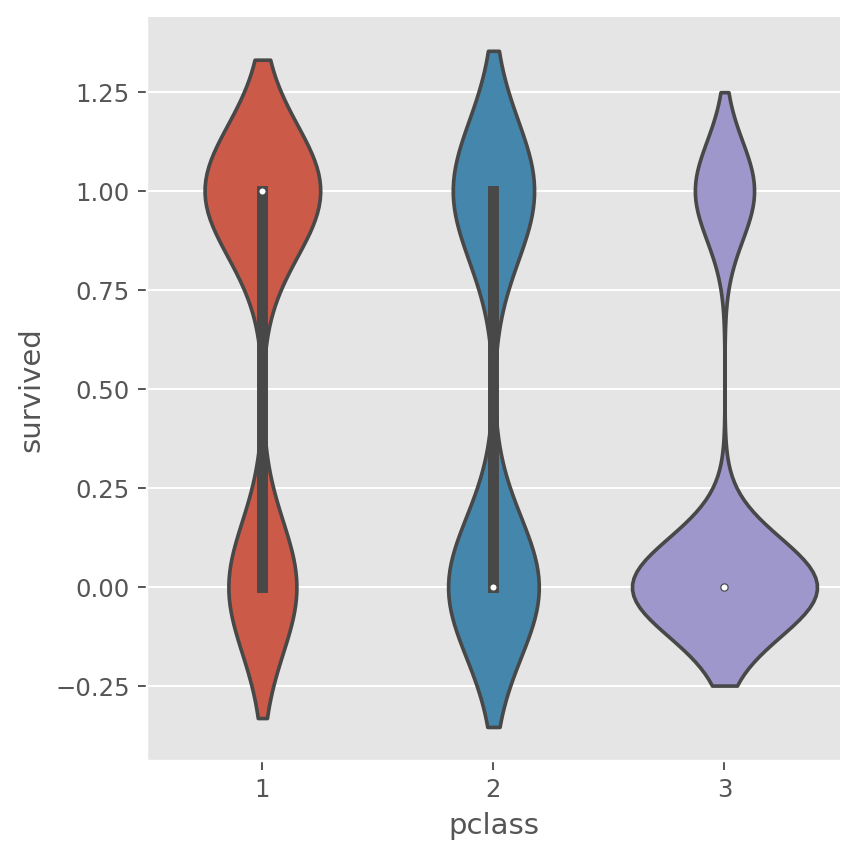

In [48]:
sns.catplot(x= 'pclass', y = 'survived', kind = 'violin', data= titanic)

___
### Analysis of Sex Variable
___

In [49]:
sex_partition = titanic.groupby(['sex','survived'])['survived'].count()

<AxesSubplot:xlabel='sex', ylabel='count'>

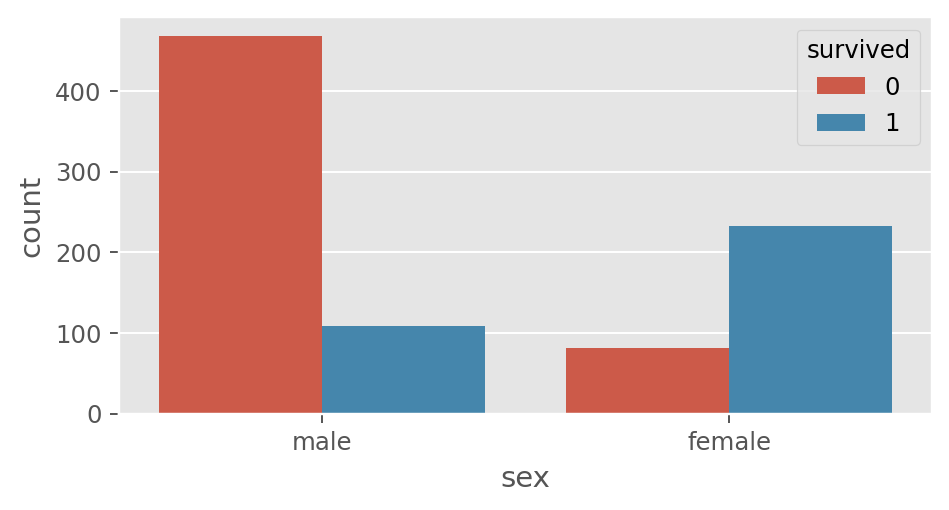

In [53]:
sns.countplot(x='sex', data=titanic, hue='survived' )

<AxesSubplot:ylabel='sex'>

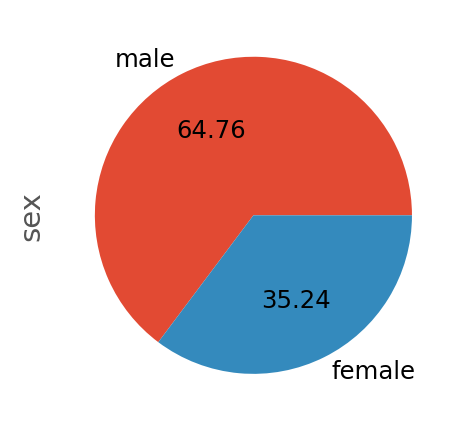

In [54]:
titanic['sex'].value_counts().plot.pie(autopct='%1.2f')

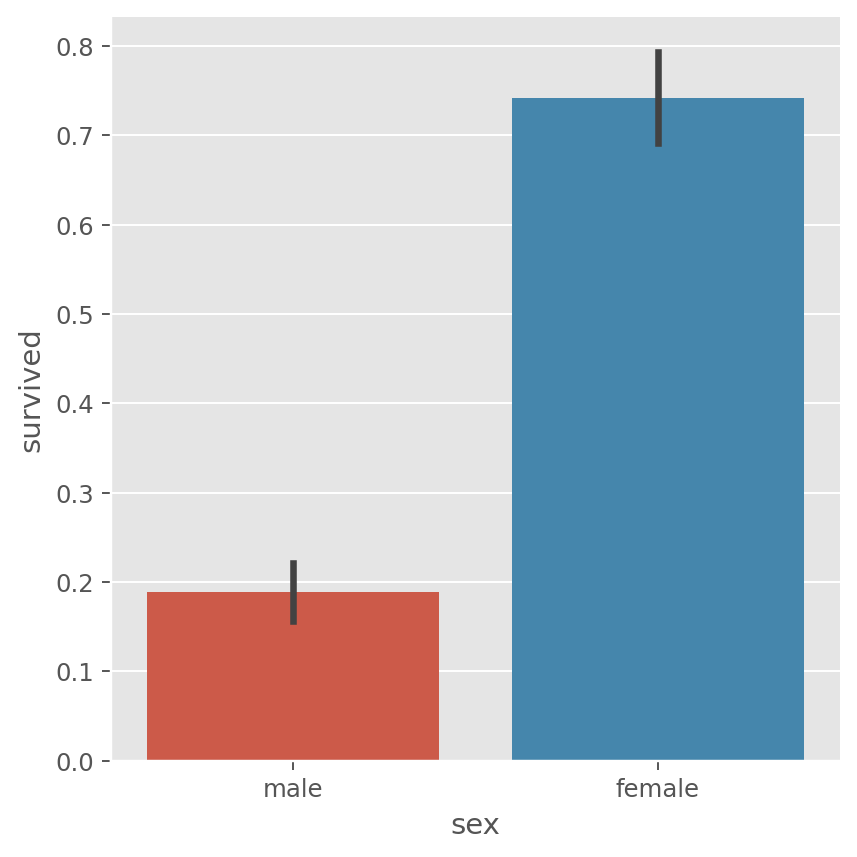

In [56]:
sns.catplot(x= 'sex', y='survived', data= titanic, kind= 'bar')

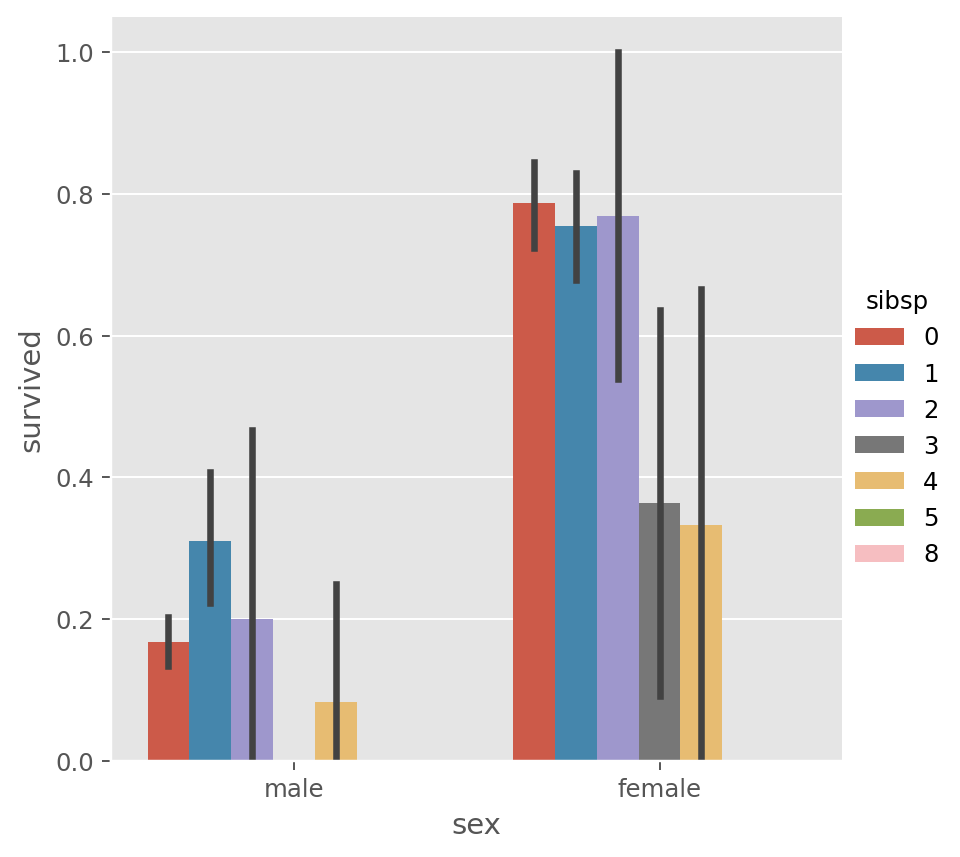

In [58]:
sns.catplot(x= 'sex', y='survived', data= titanic, kind= 'bar', hue='sibsp')

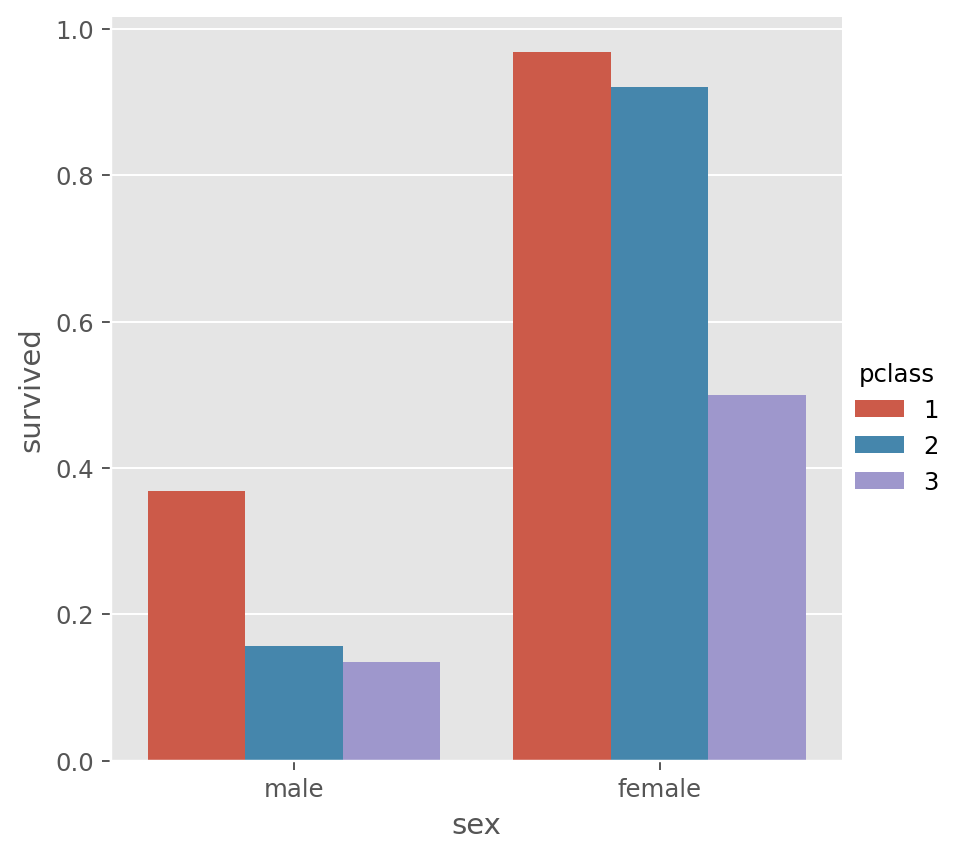

In [60]:
sns.catplot(x= 'sex', y='survived', data= titanic, kind= 'bar', hue= 'pclass', ci= None)

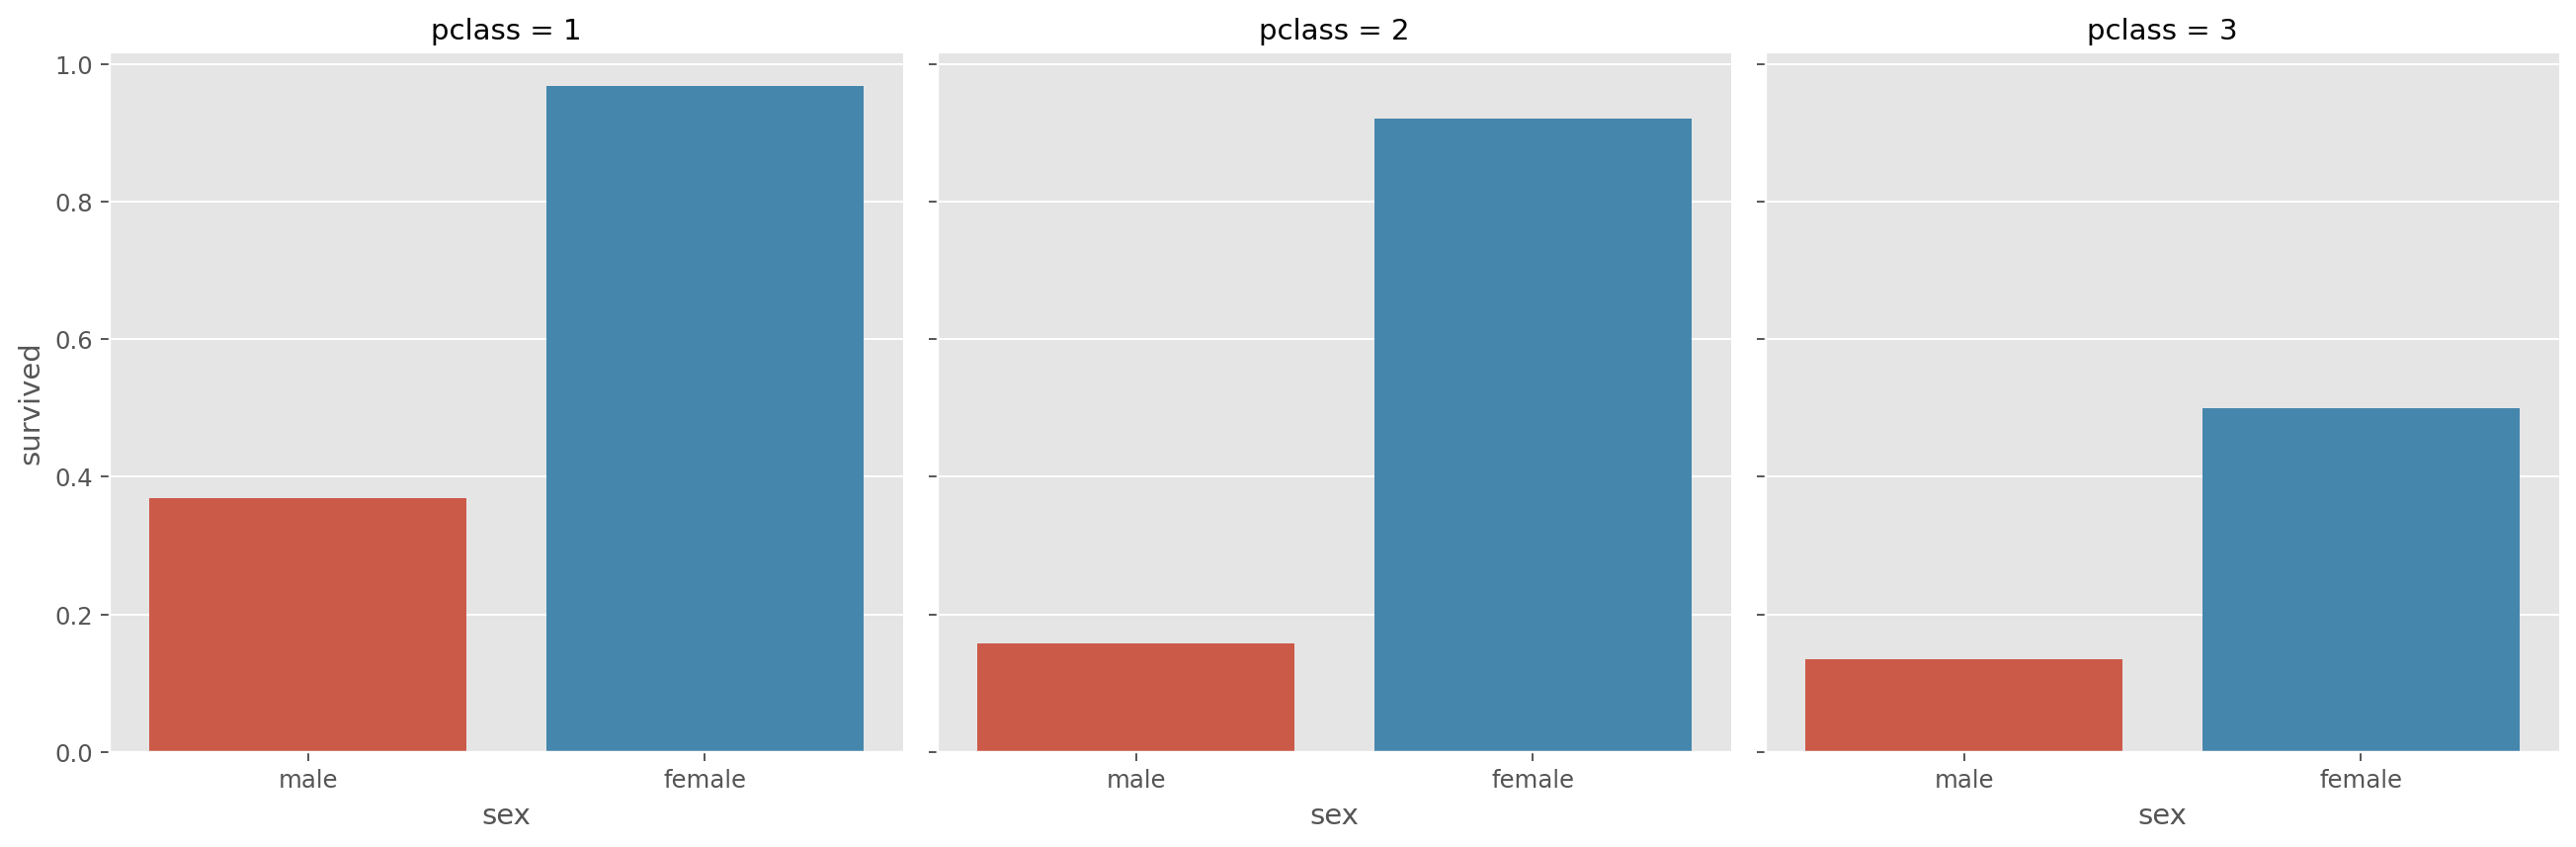

In [61]:
sns.catplot(x= 'sex', y='survived', data= titanic, kind= 'bar', col= 'pclass', ci= None)

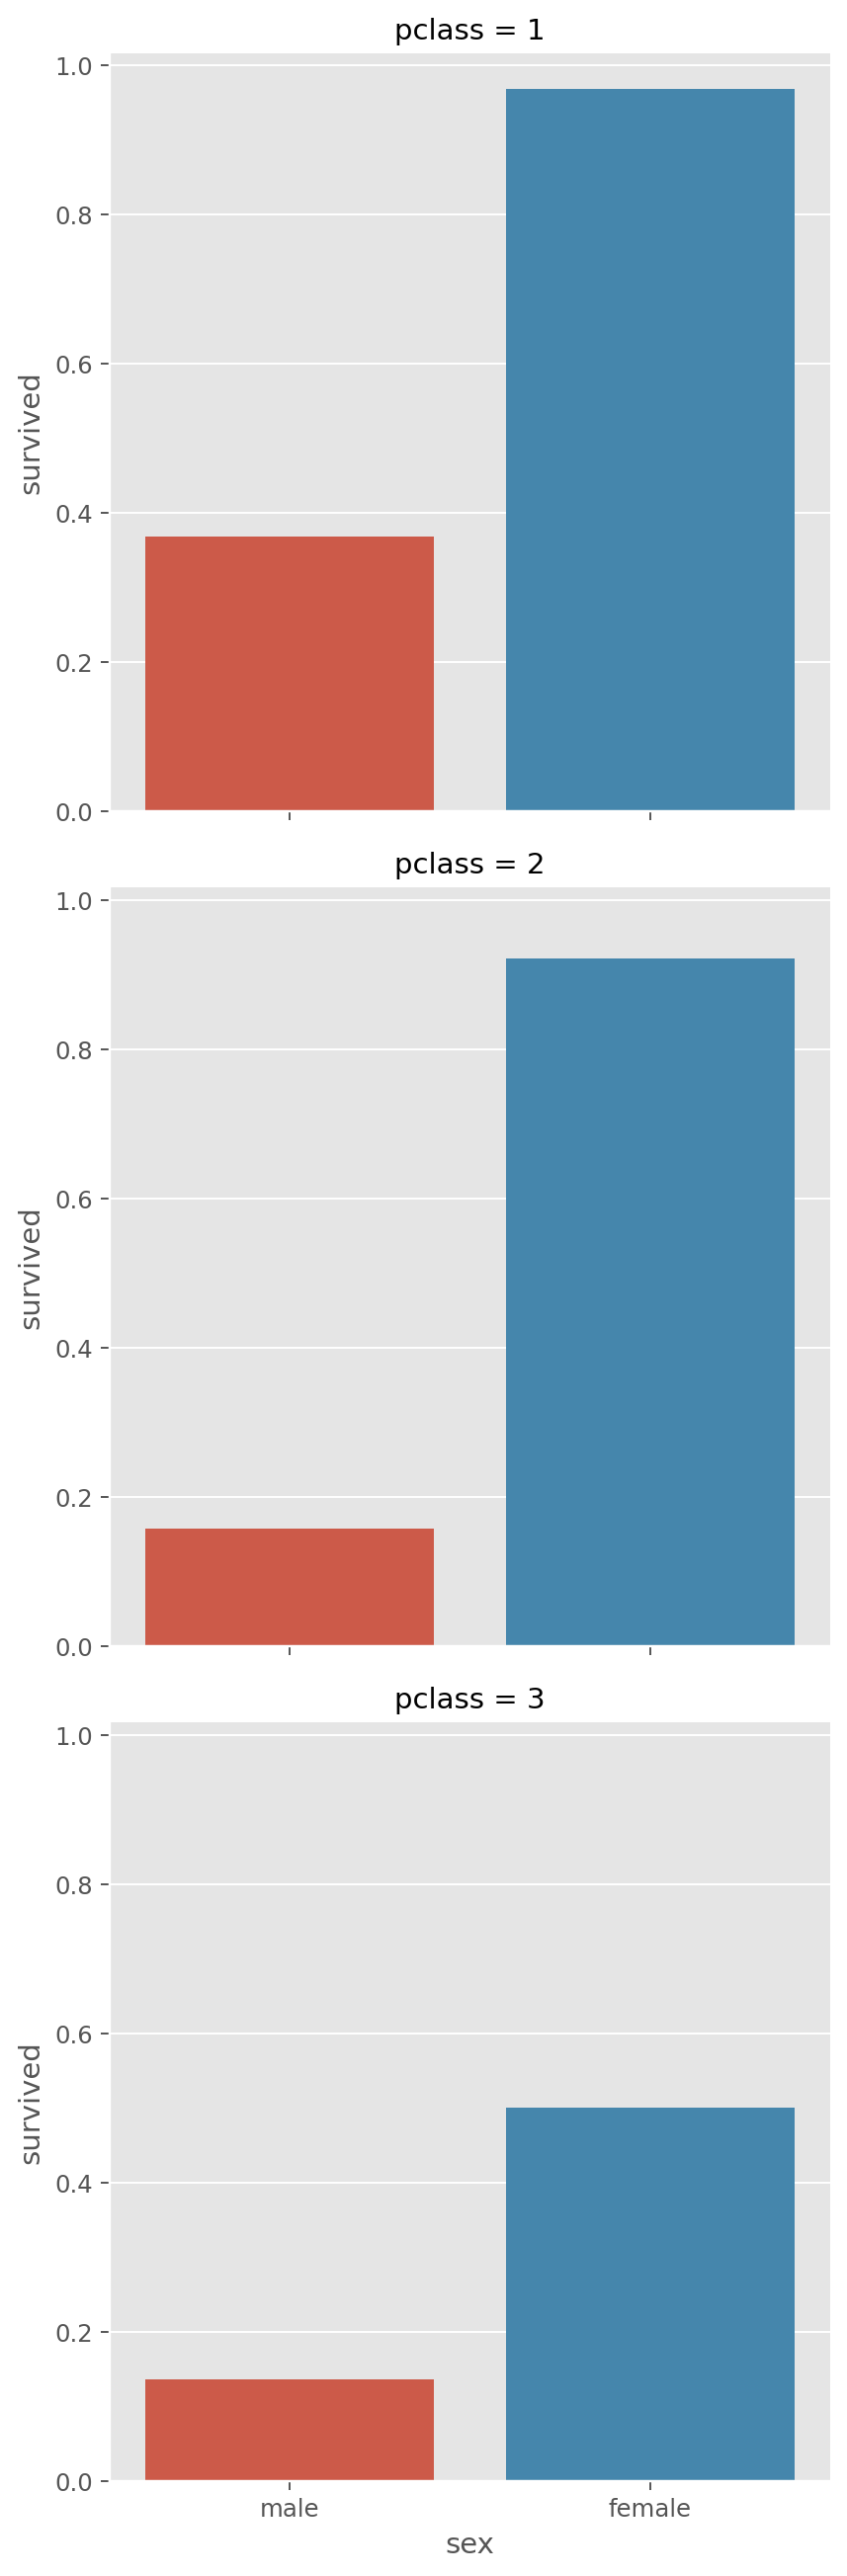

In [62]:
sns.catplot(x= 'sex', y='survived', data= titanic, kind= 'bar', row= 'pclass', ci= None)

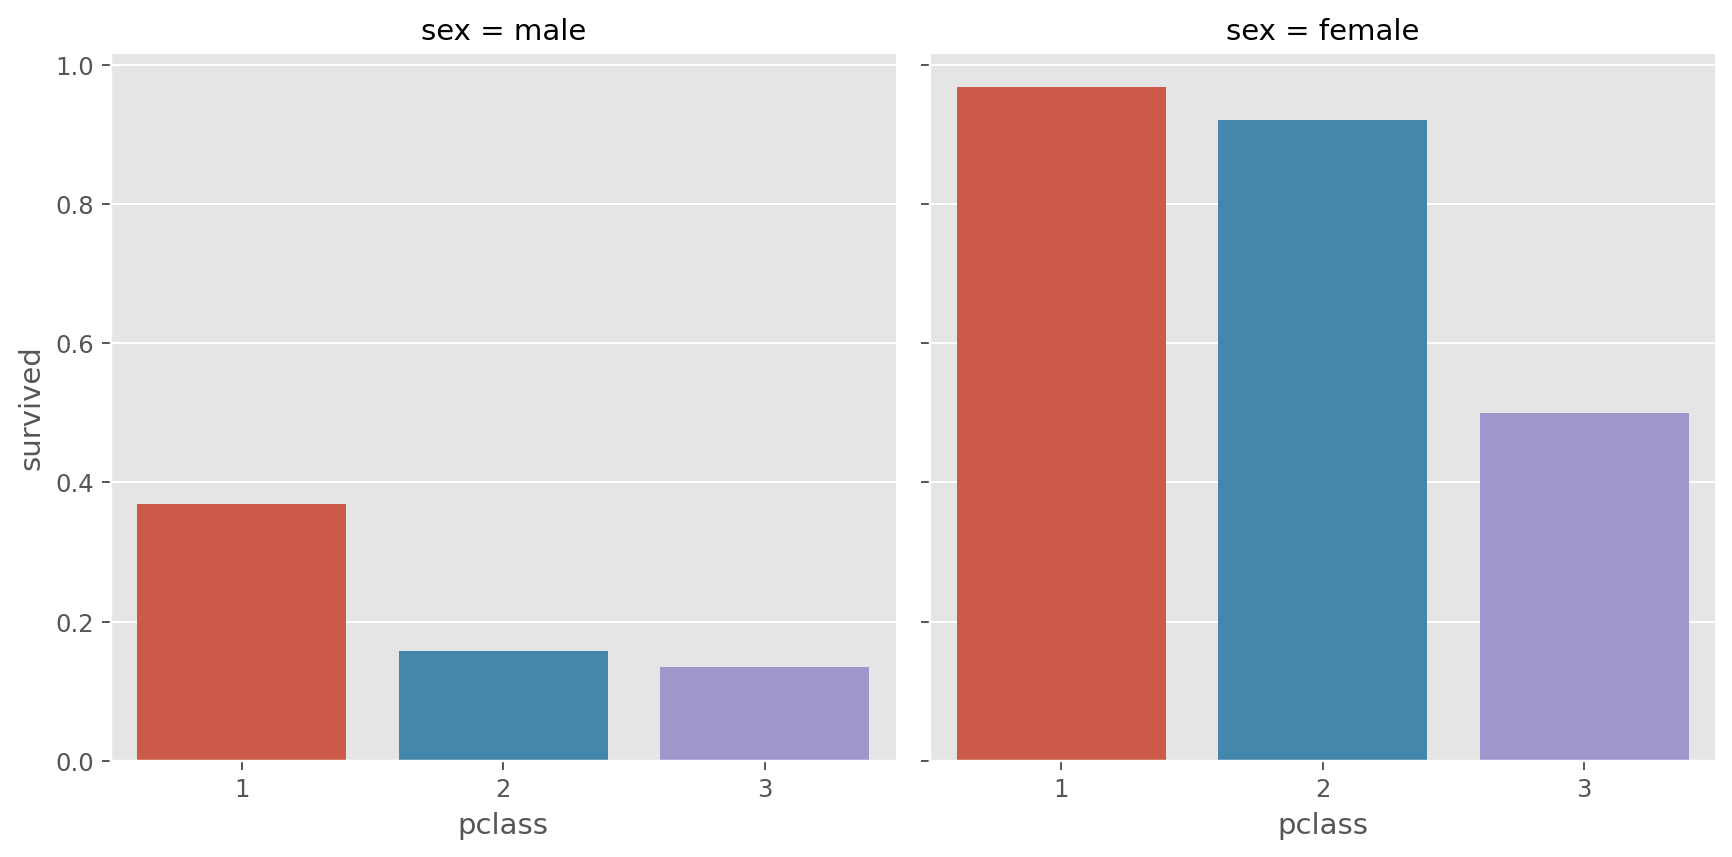

In [64]:
sns.catplot(x= 'pclass', y='survived', data= titanic, kind= 'bar', col= 'sex', ci= None)

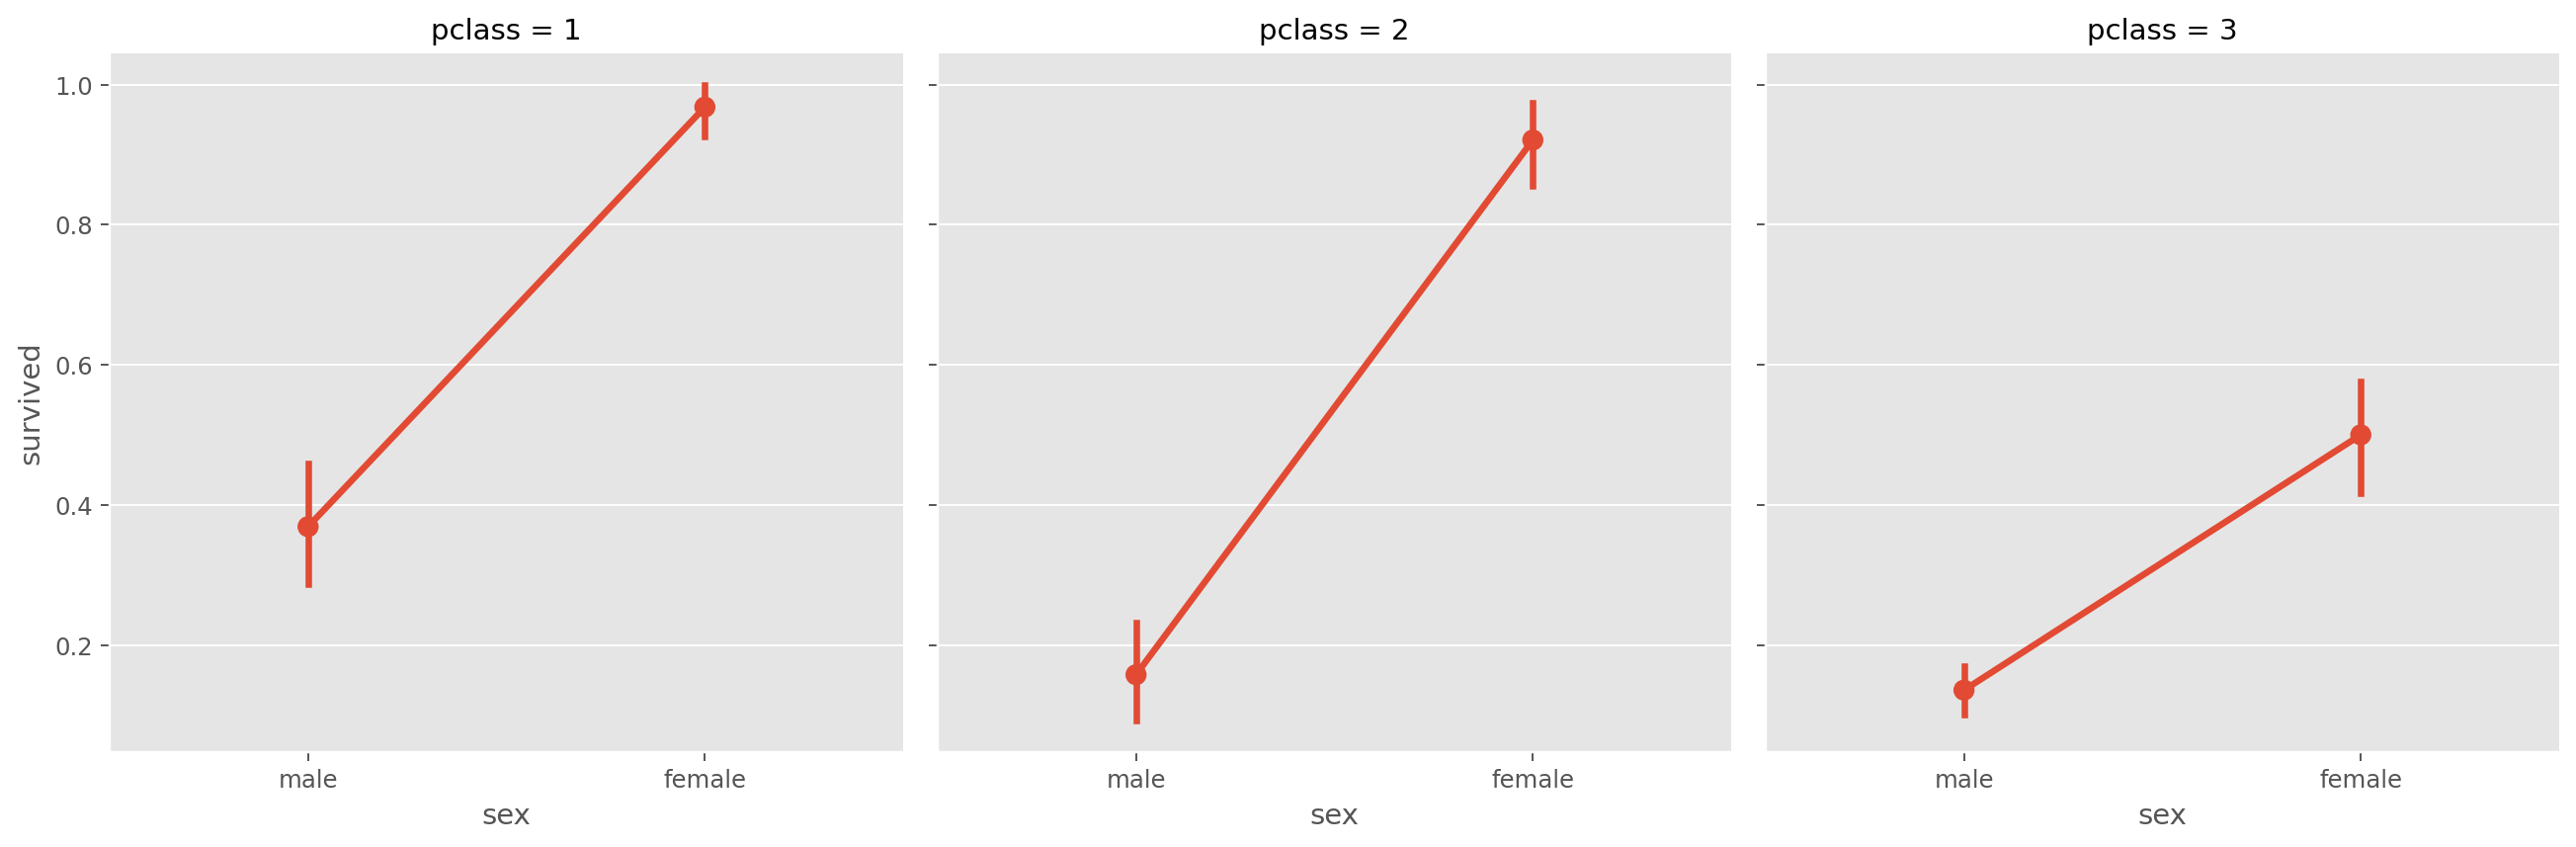

In [65]:
sns.catplot(x= 'sex', y='survived', data= titanic, kind= 'point', col= 'pclass')

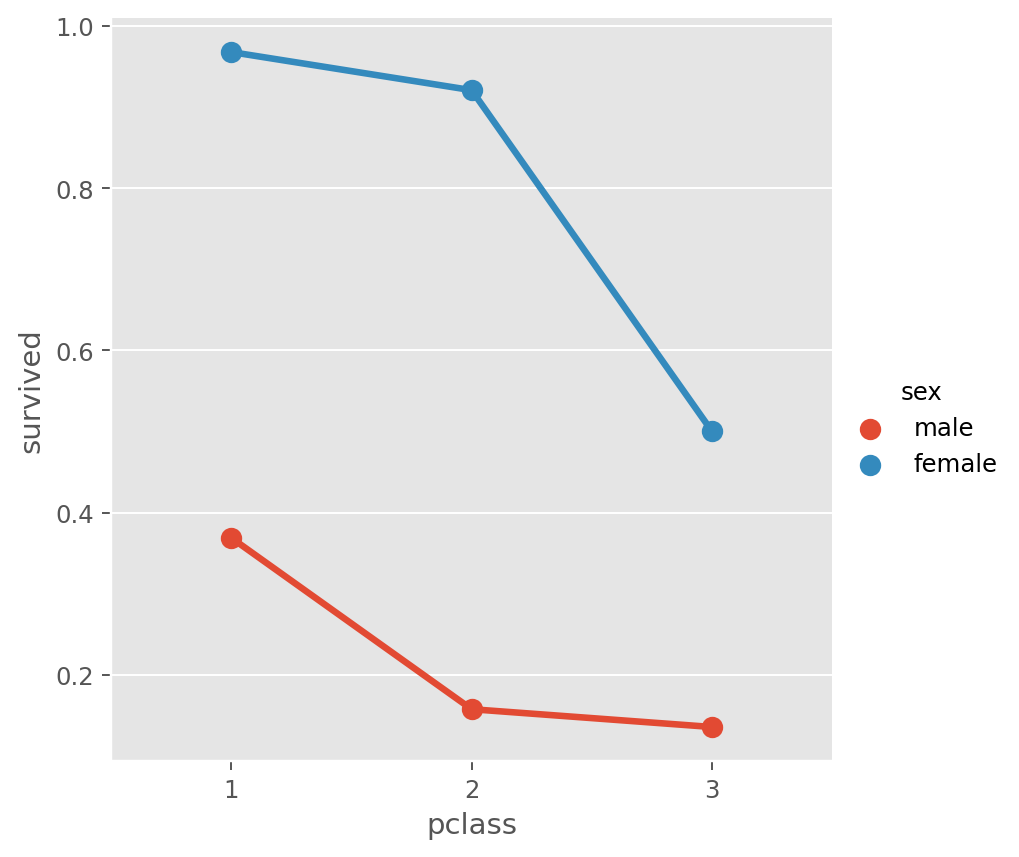

In [66]:
sns.catplot(x= 'pclass', y='survived', data= titanic, kind= 'point', hue= 'sex', ci= None)

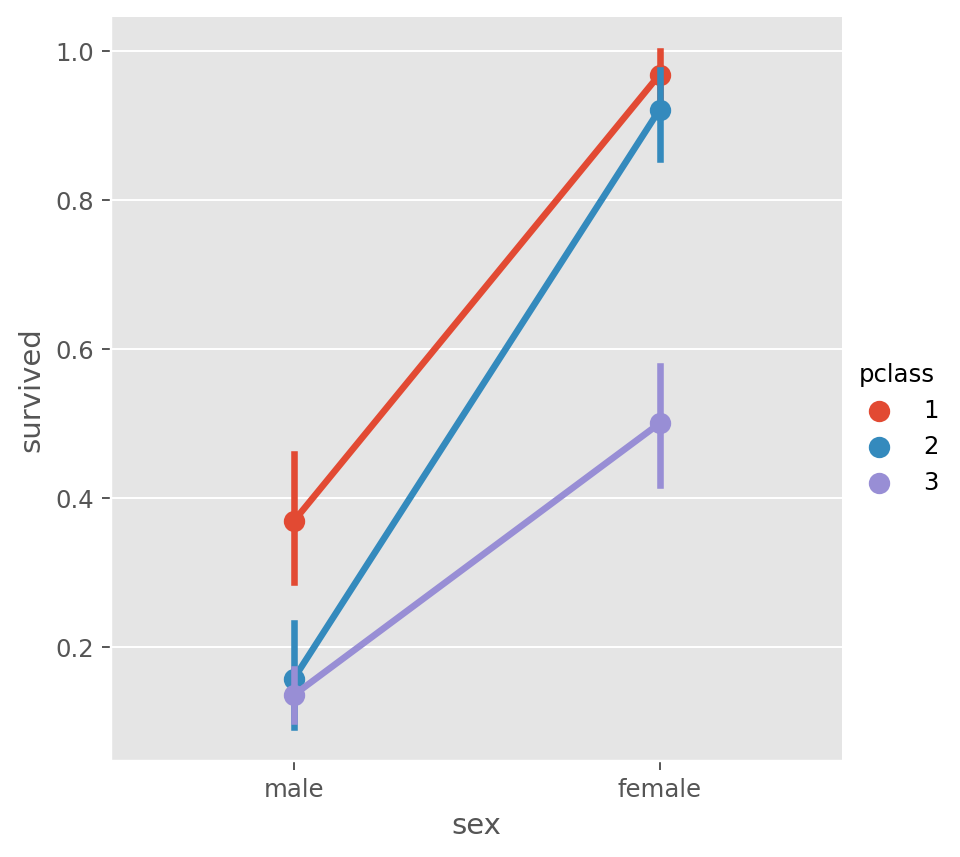

In [68]:
sns.catplot(x= 'sex', y='survived', data= titanic, kind= 'point', hue= 'pclass')

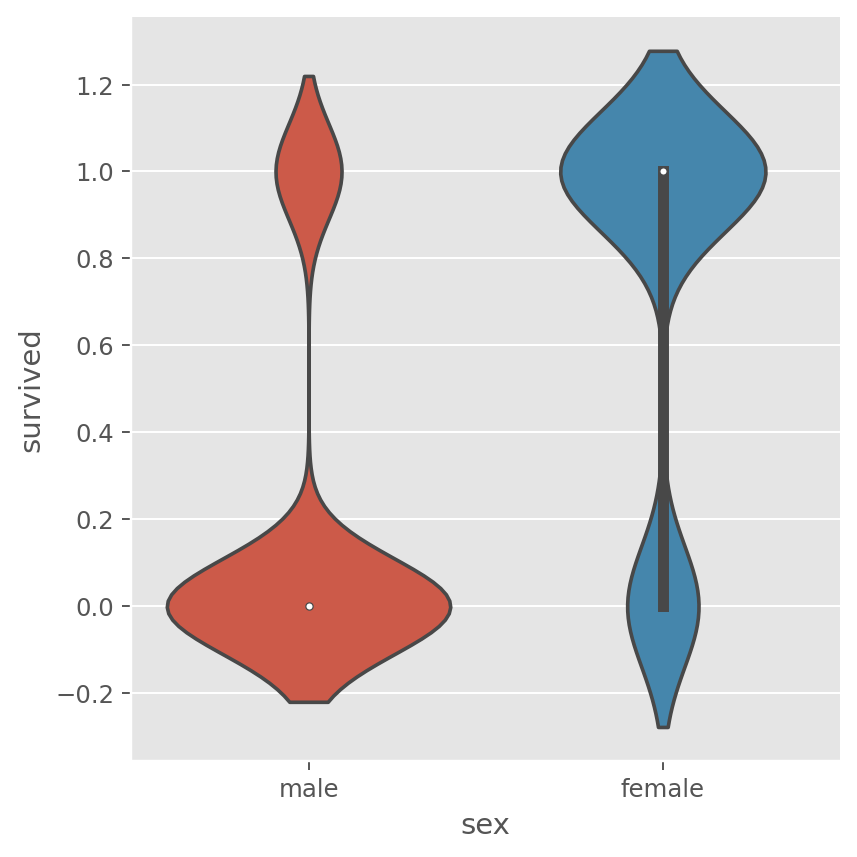

In [69]:
sns.catplot(x= 'sex', y='survived', data= titanic, kind= 'violin')

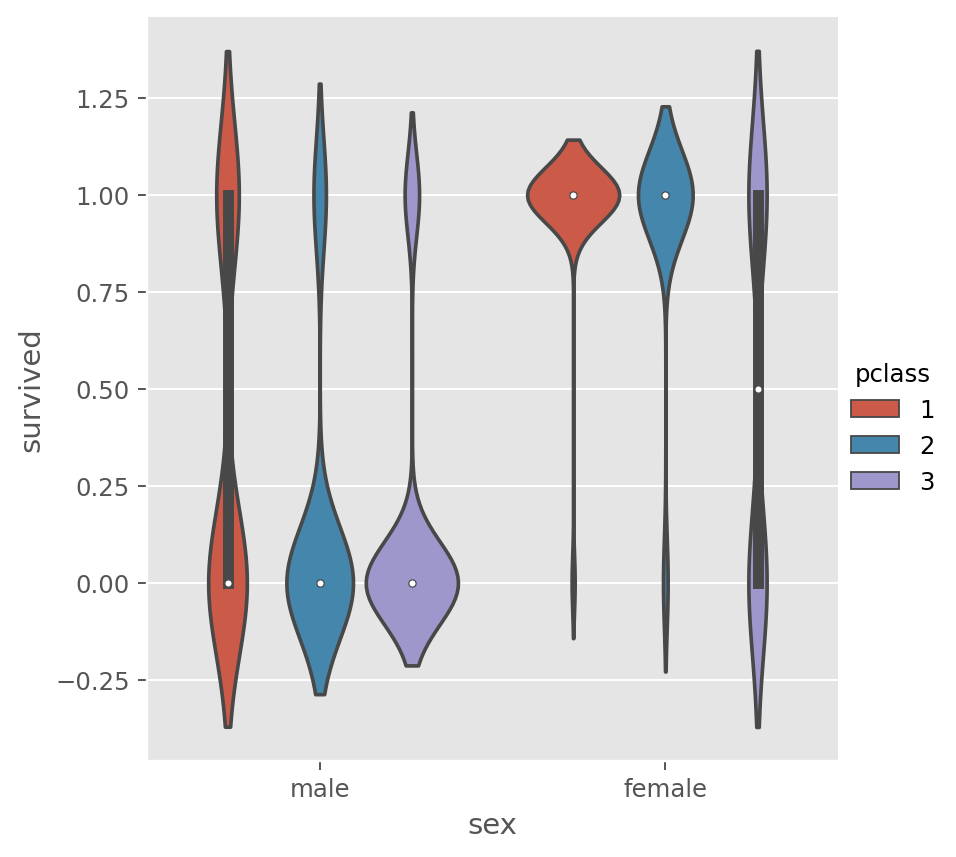

In [71]:
sns.catplot(x= 'sex', y='survived', data= titanic, kind= 'violin',hue='pclass')

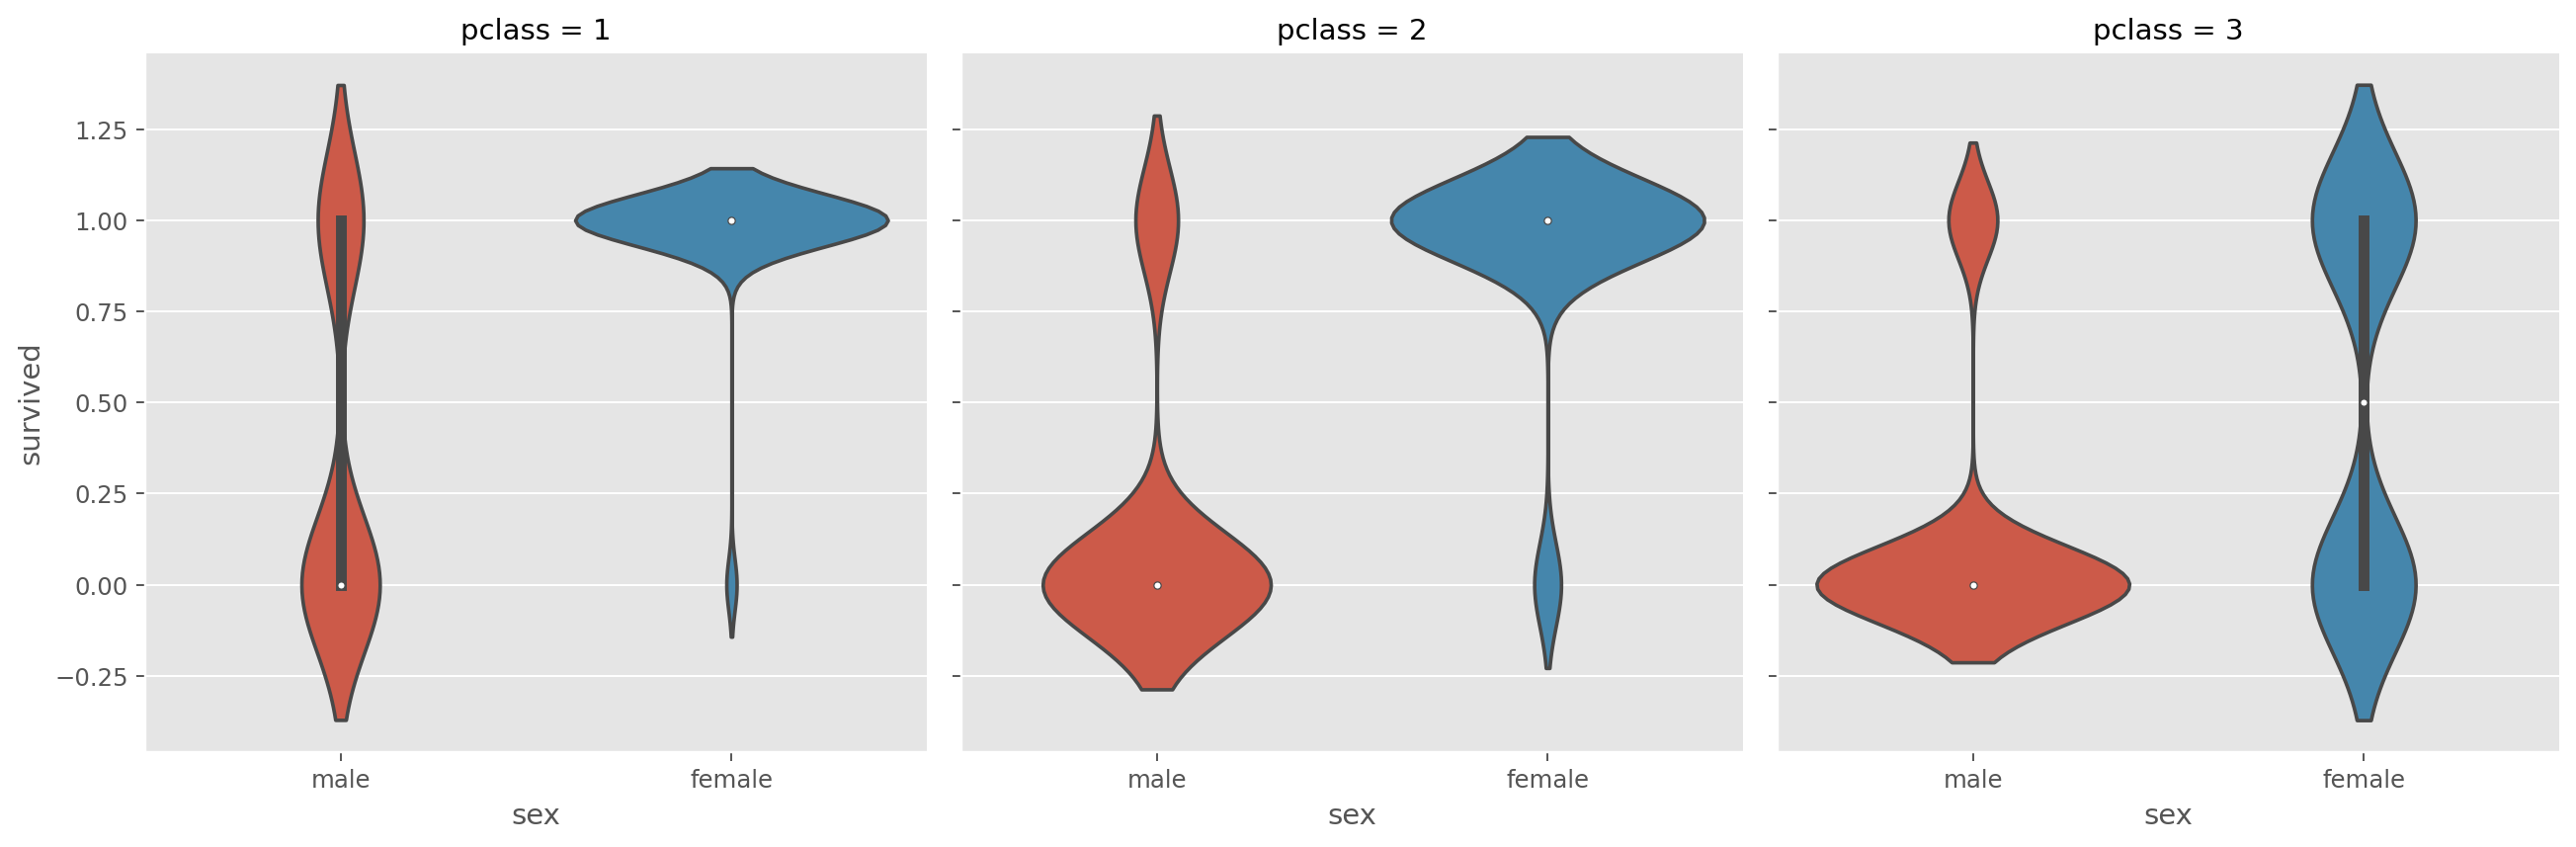

In [72]:
sns.catplot(x= 'sex', y='survived', data= titanic, kind= 'violin',col='pclass')

In [74]:
filt = (titanic['sex'] == 'female') & (titanic['pclass'] == 1) & (titanic['survived'] == 0)
titanic[filt]

survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
177         0       1  female  50.0      0      0   28.7125        C  First   
297         0       1  female   2.0      1      2  151.5500        S  First   
498         0       1  female  25.0      1      2  151.5500        S  First   

       who  adult_male deck  embark_town alive  alone  
177  woman       False    C    Cherbourg    no   True  
297  child       False    C  Southampton    no  False  
498  woman       False    C  Southampton    no  False

---
## Age
---

<AxesSubplot:>

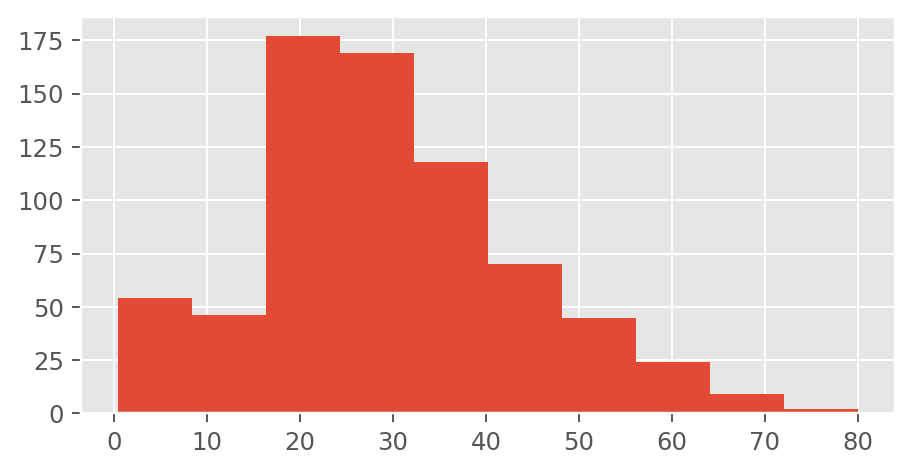

In [75]:
titanic['age'].hist()

<AxesSubplot:>

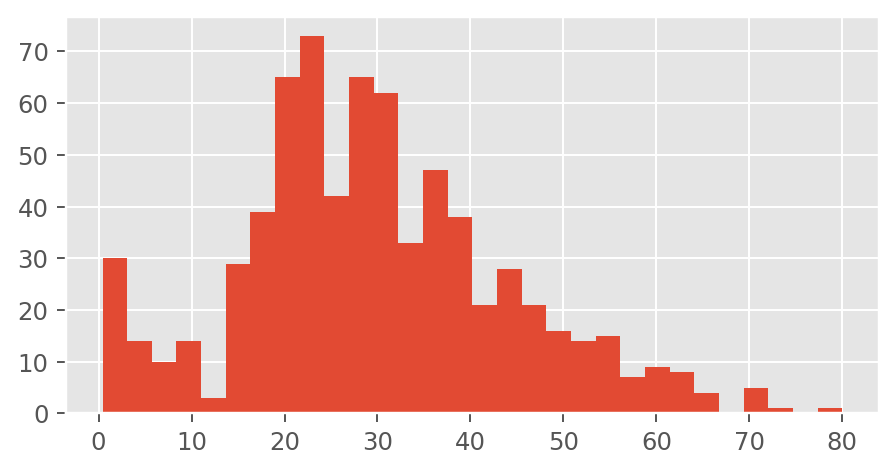

In [76]:
titanic['age'].hist(bins=30)

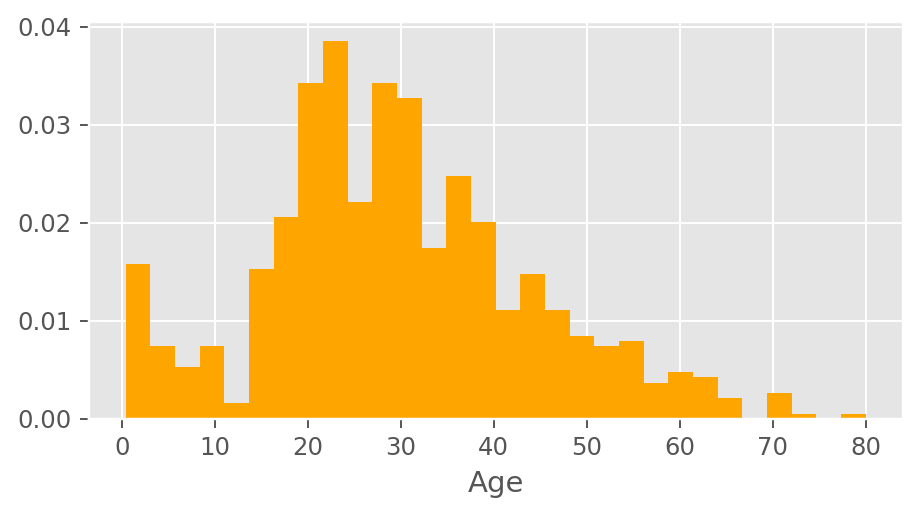

In [77]:
titanic['age'].hist(bins=30,density=True, color='orange')
plt.xlabel("Age")
plt.show()

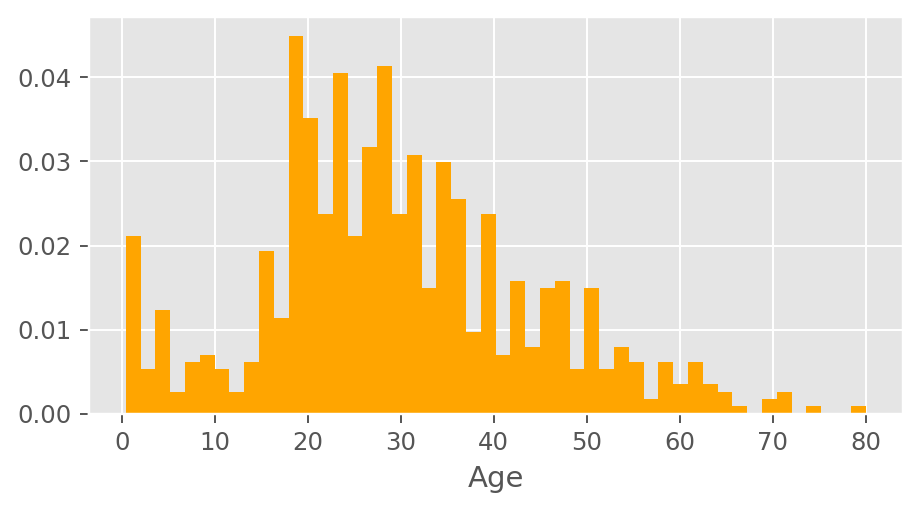

In [78]:
titanic['age'].hist(bins=50,density=True, color='orange')
plt.xlabel("Age")
plt.show()

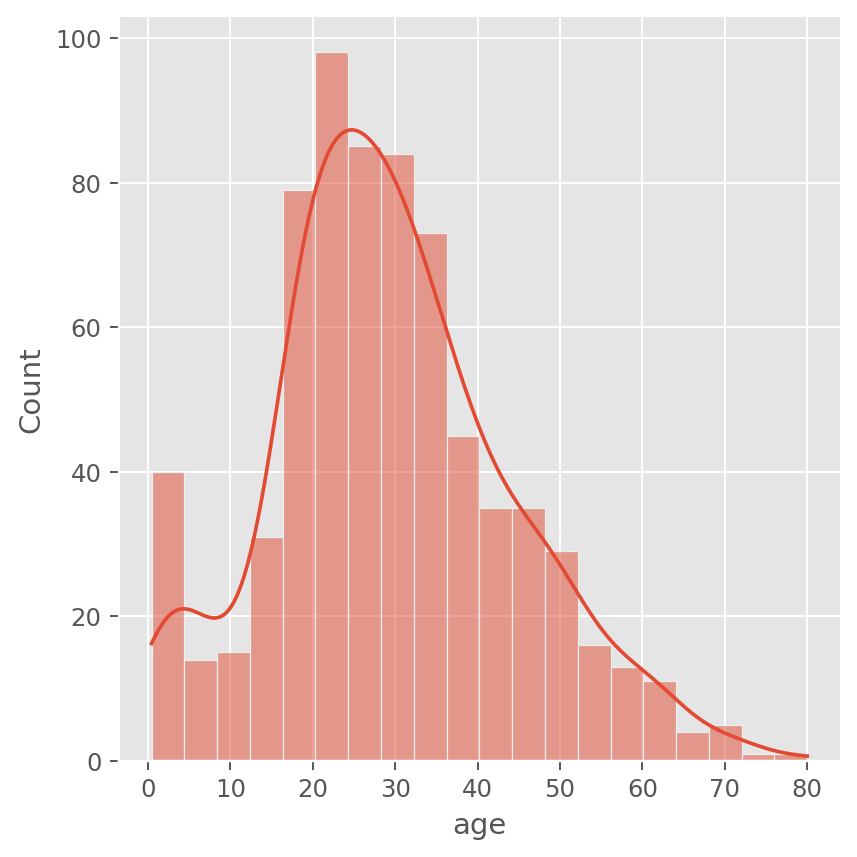

In [84]:
sns.displot(titanic['age'], kde= True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

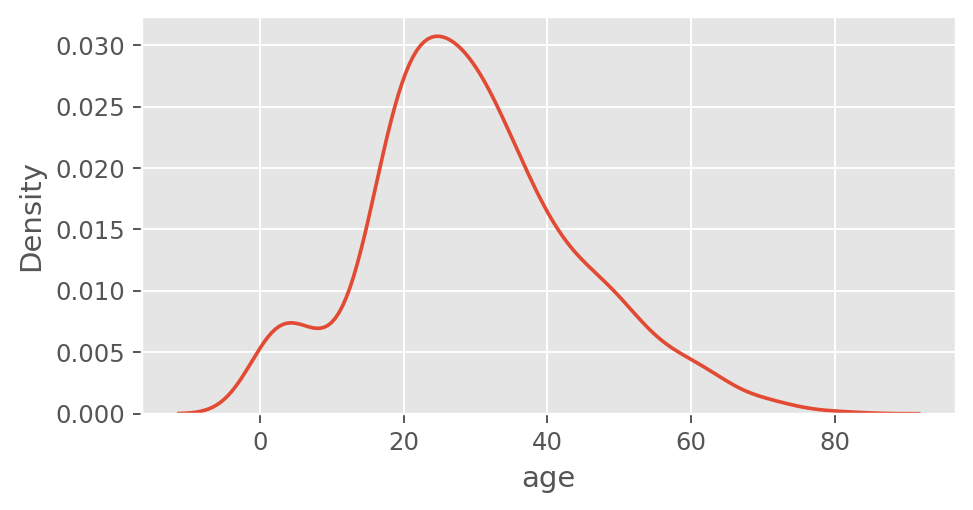

In [82]:
sns.distplot(titanic['age'], hist= False)

<AxesSubplot:xlabel='age', ylabel='Density'>

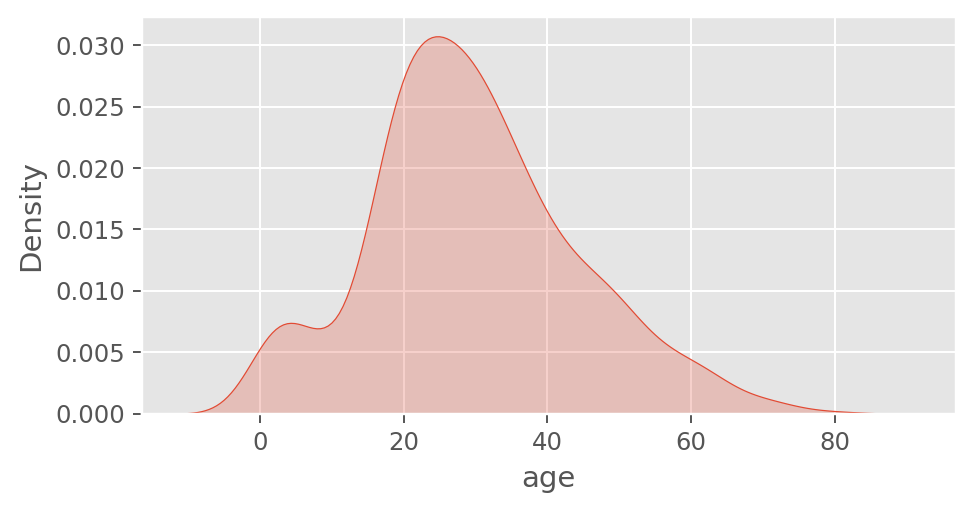

In [83]:
sns.kdeplot(titanic['age'], shade= True)

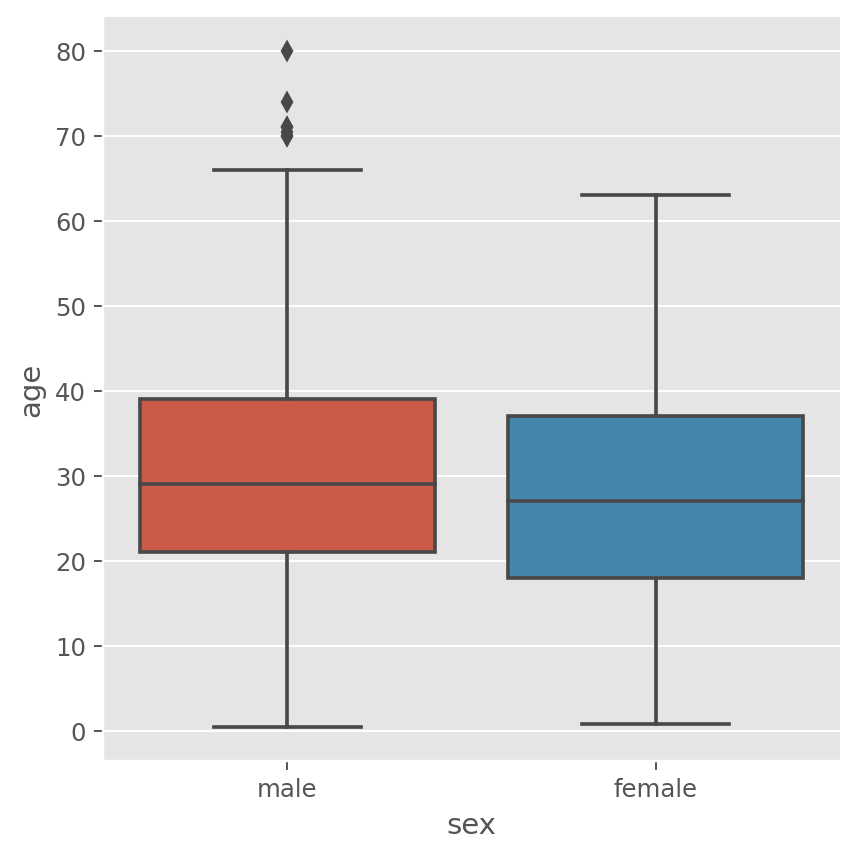

In [85]:
sns.catplot(x='sex', y='age', kind= 'box', data= titanic)

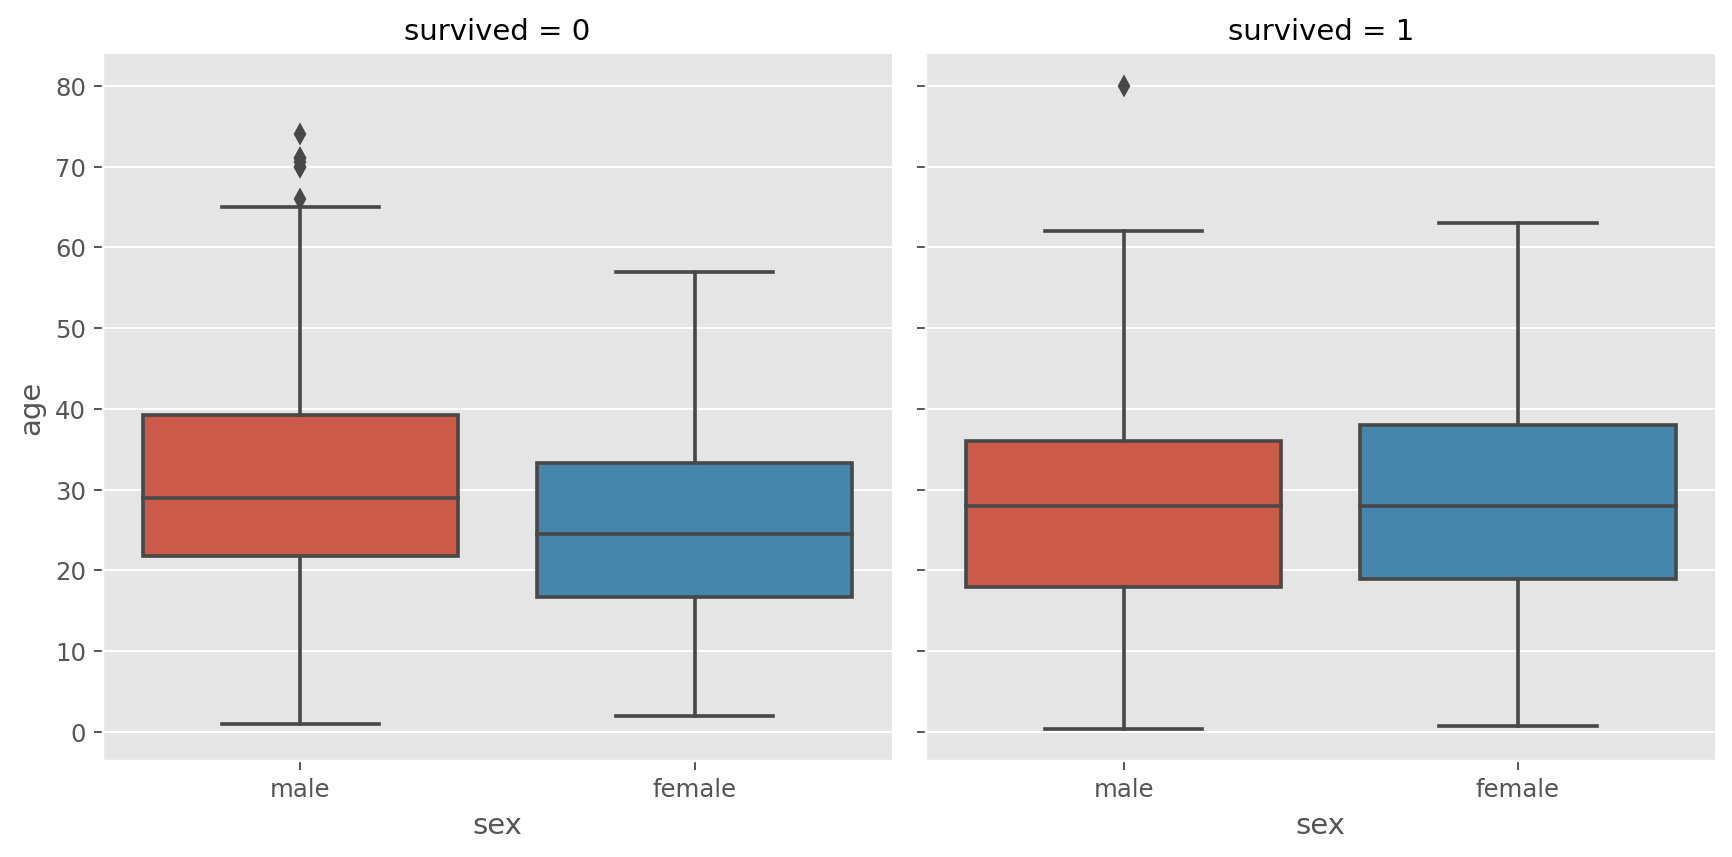

In [86]:
sns.catplot(x='sex', y='age', kind= 'box', data= titanic, col= 'survived')

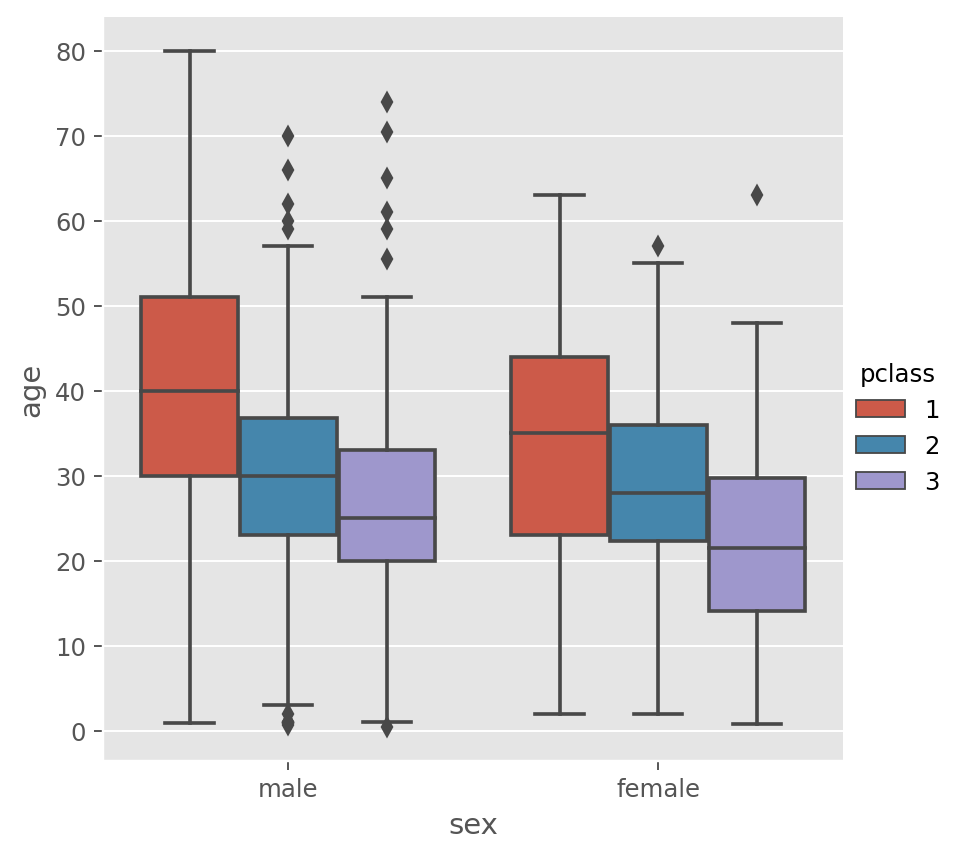

In [88]:
sns.catplot(x='sex', y='age', kind= 'box', data= titanic, hue= 'pclass')

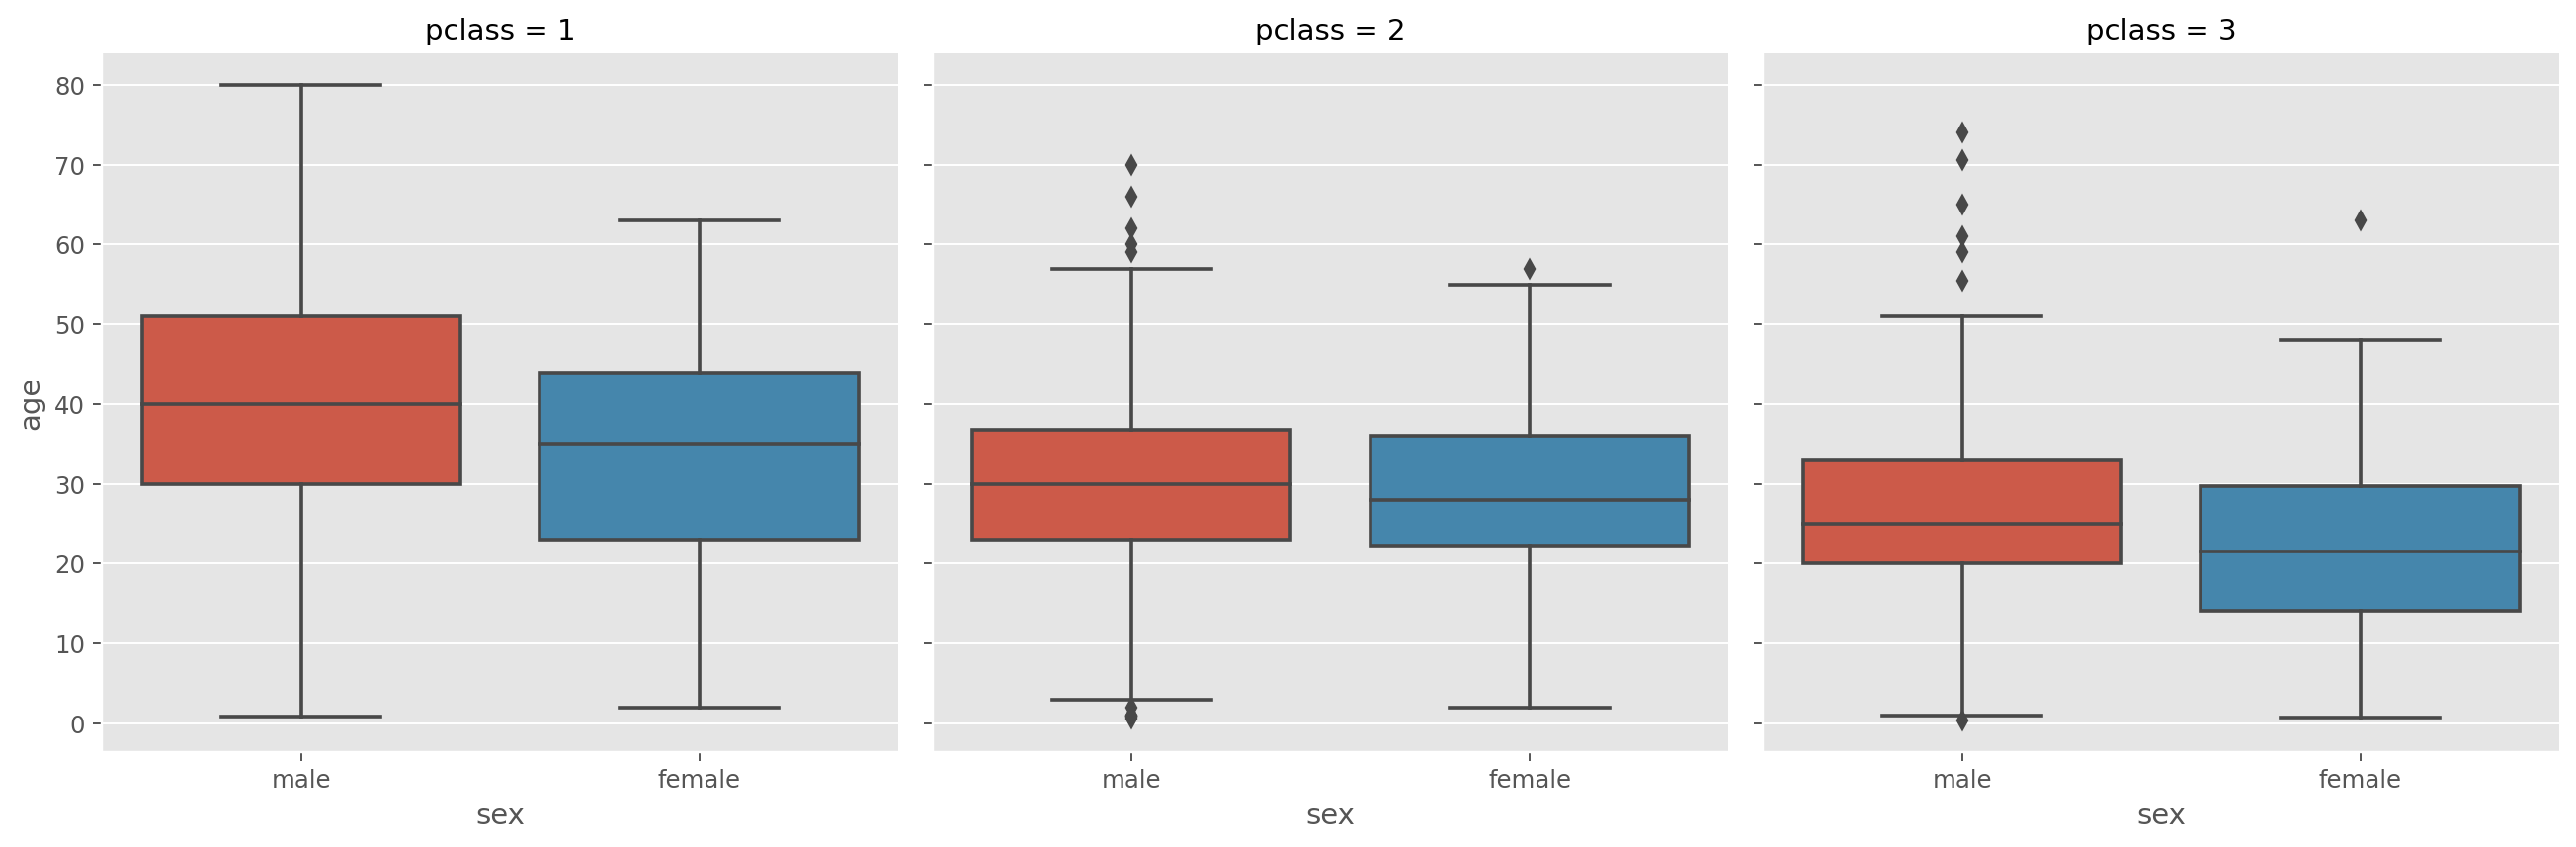

In [87]:
sns.catplot(x='sex', y='age', kind= 'box', data= titanic, col= 'pclass')

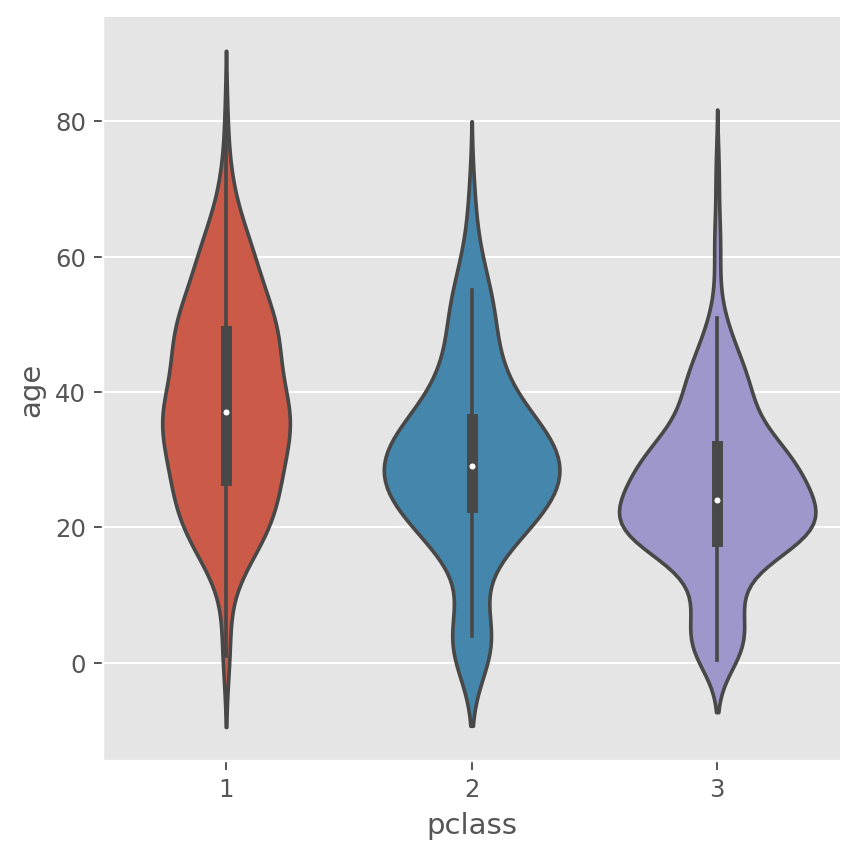

In [91]:
sns.catplot(data=titanic, x='pclass', y='age', kind='violin')

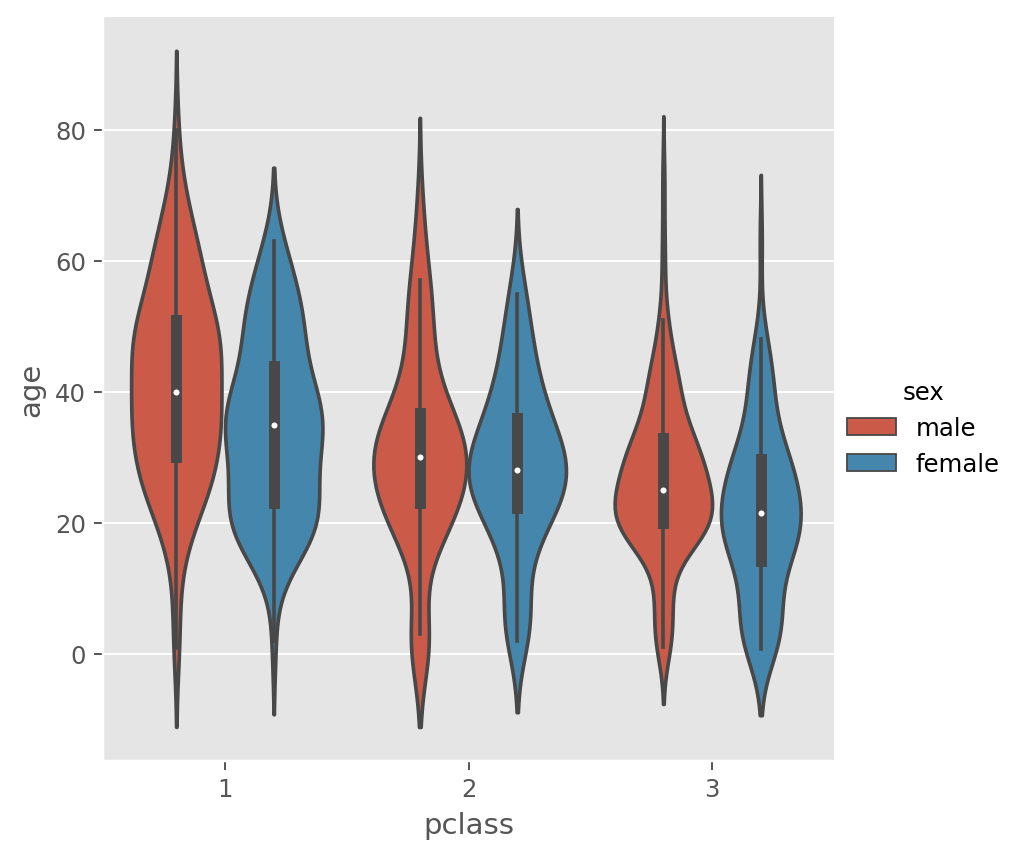

In [92]:
sns.catplot(data=titanic, x='pclass', y='age', kind='violin' ,hue='sex')

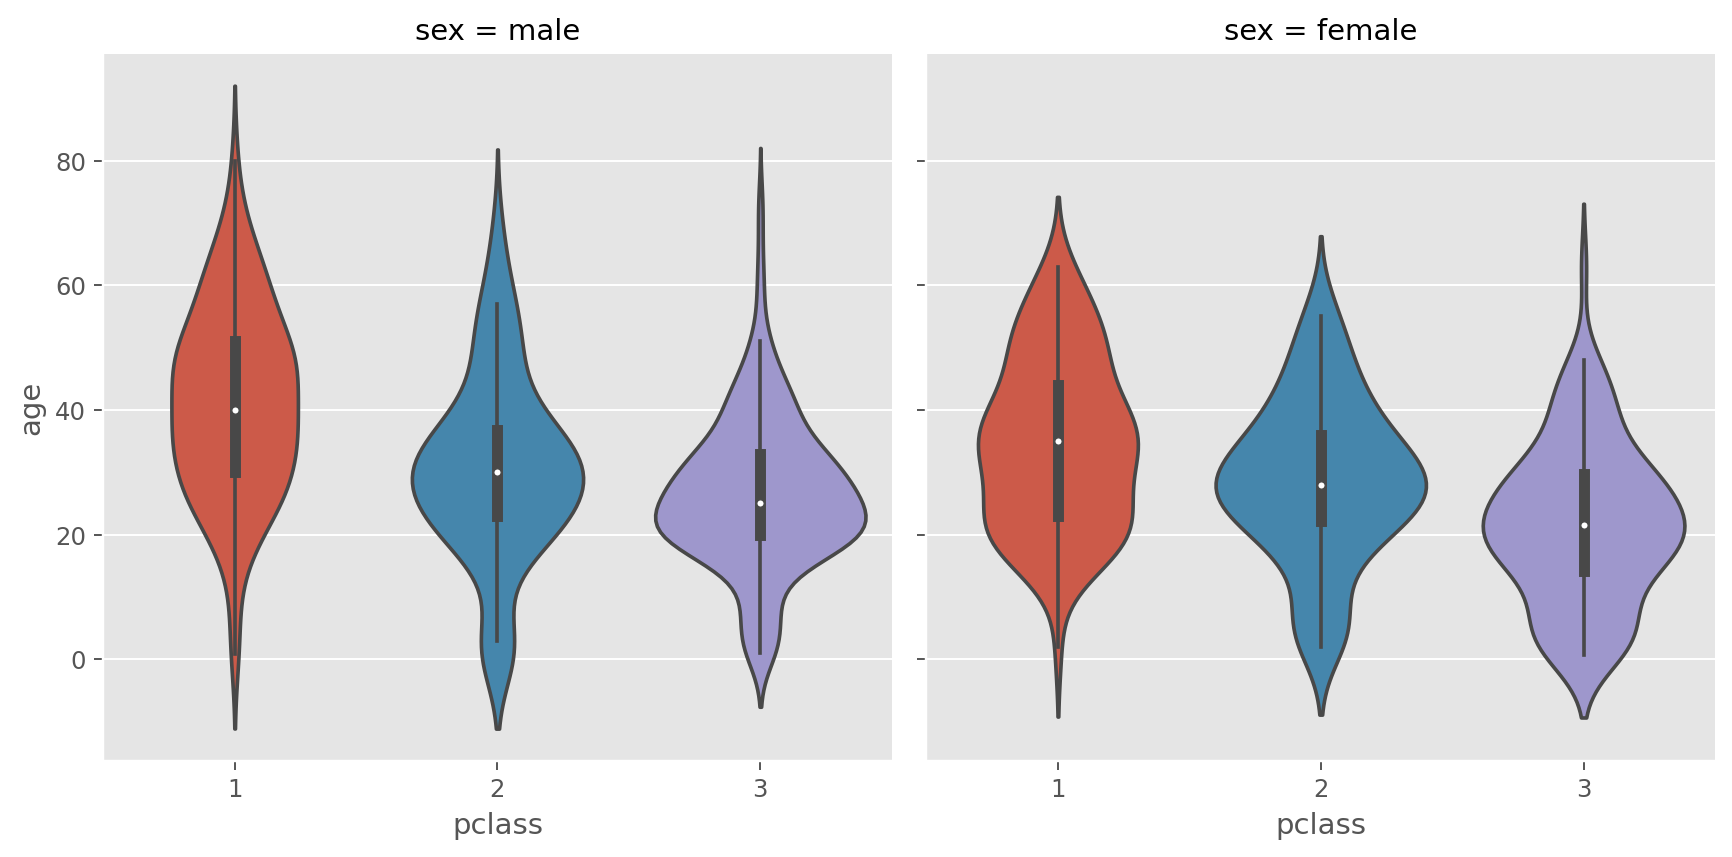

In [94]:
sns.catplot(data=titanic, x='pclass', y='age', kind='violin' ,col='sex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


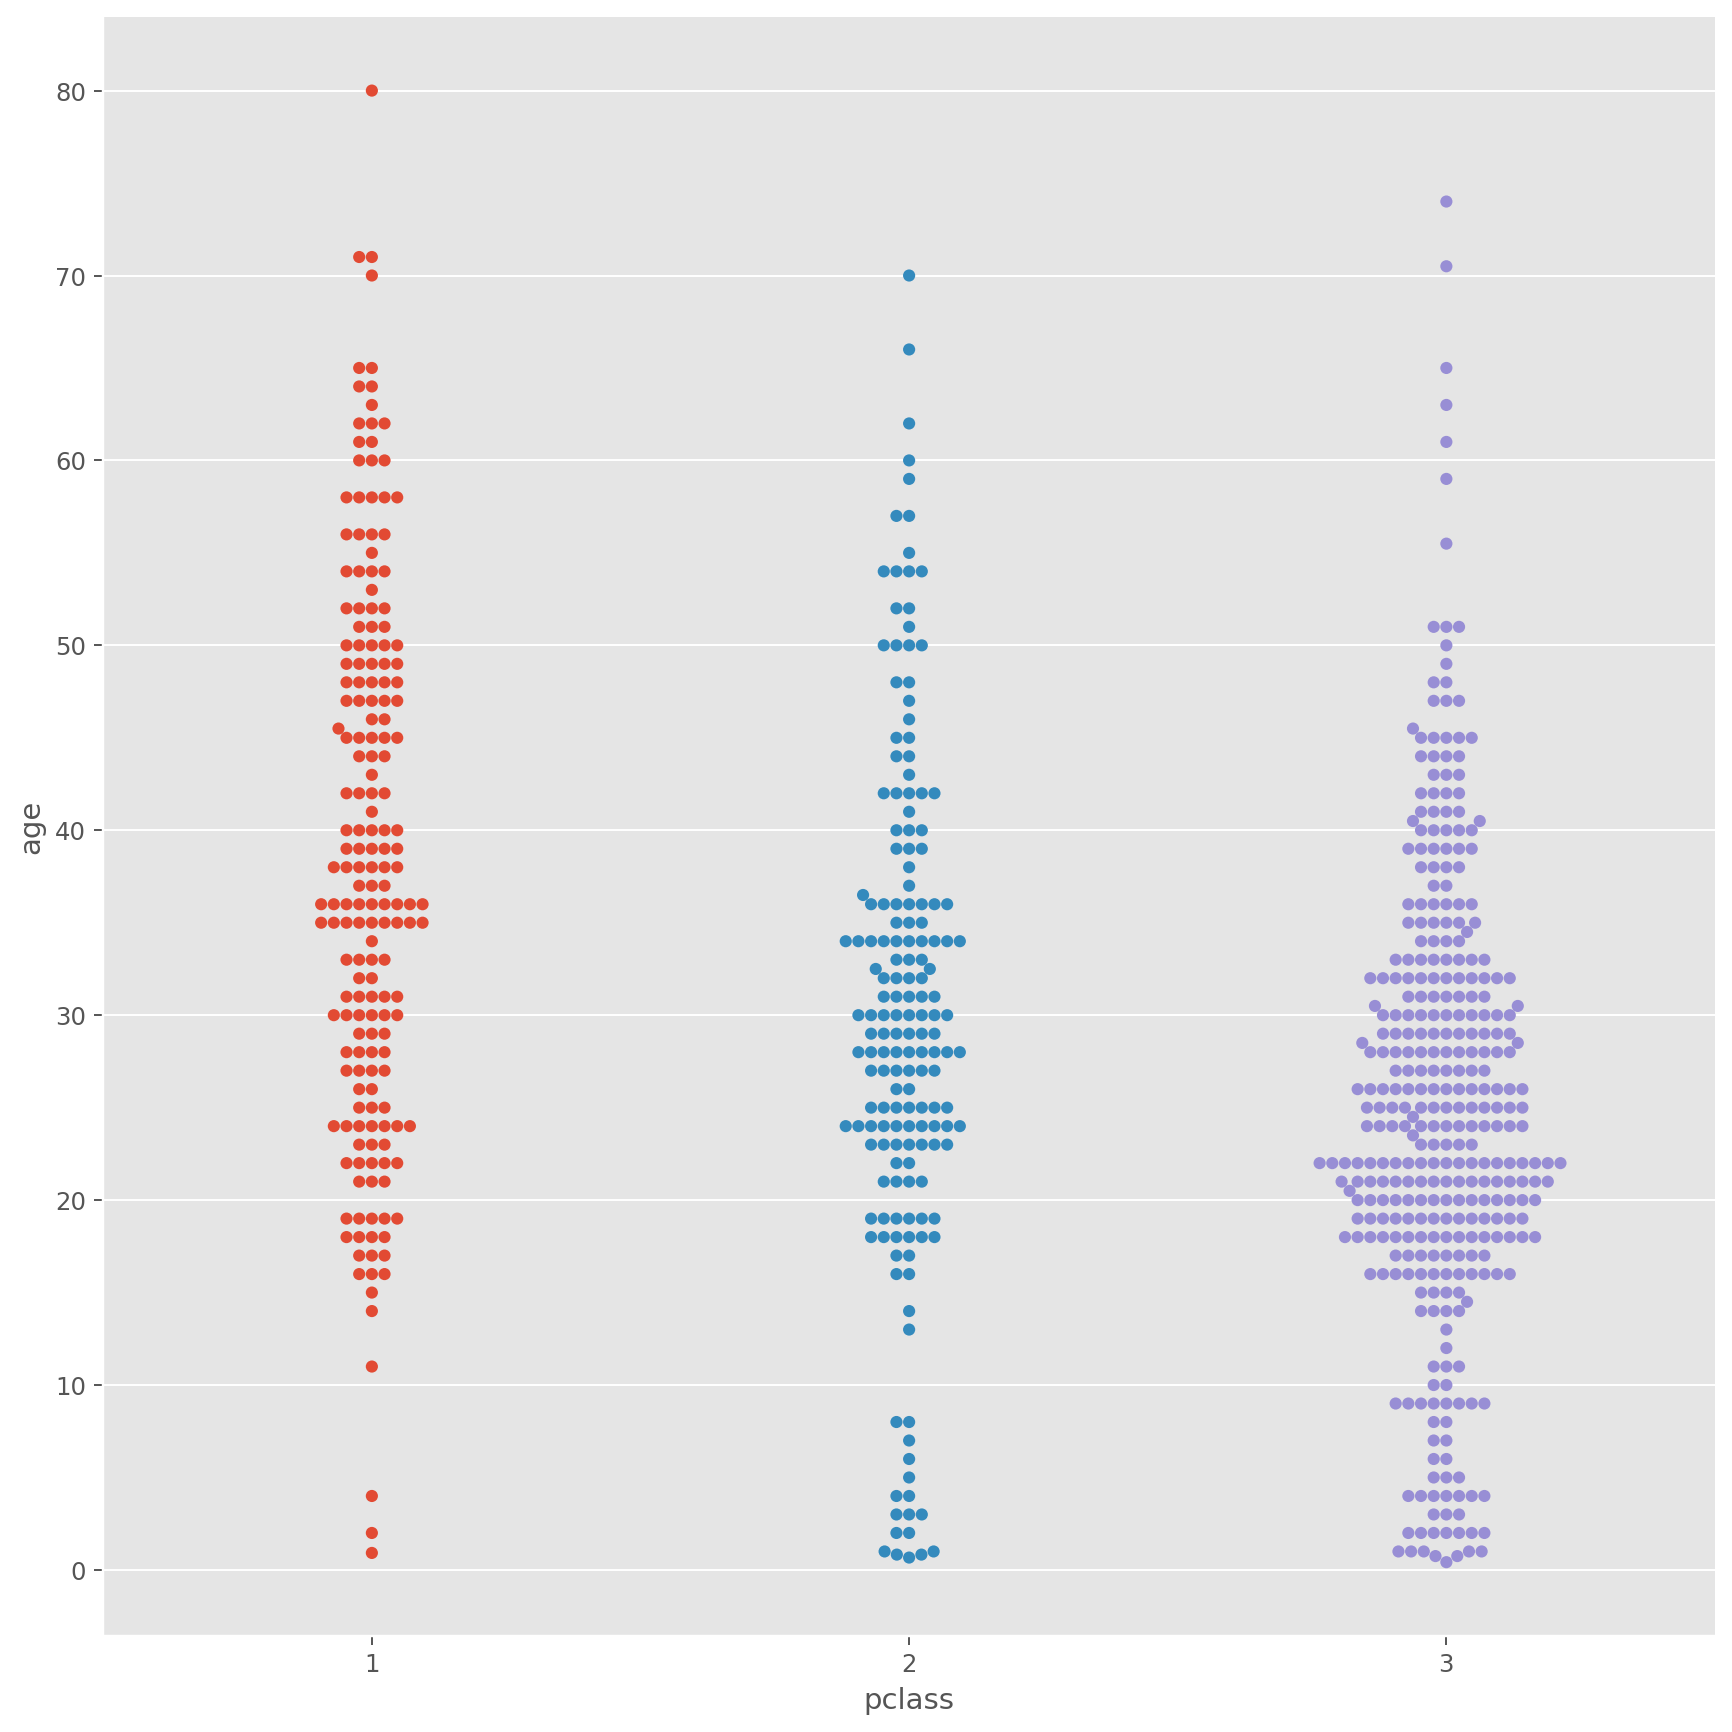

In [99]:
sns.catplot(x='pclass', y='age', kind='swarm', data= titanic, size=10)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


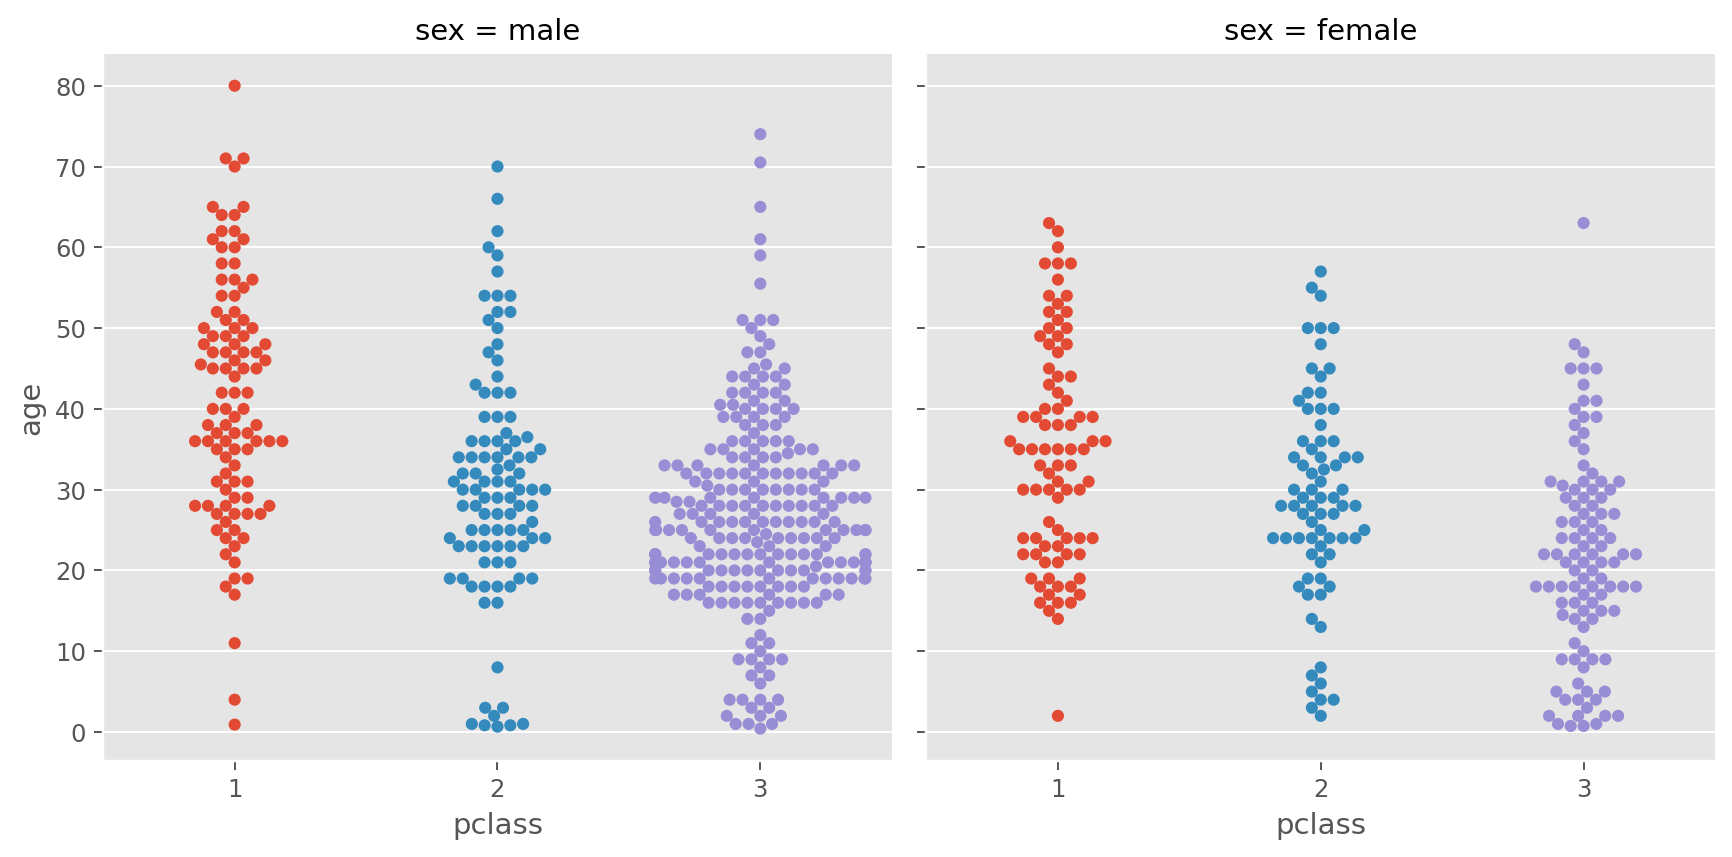

In [100]:
sns.catplot(x='pclass', y='age', kind='swarm', data= titanic, col='sex')

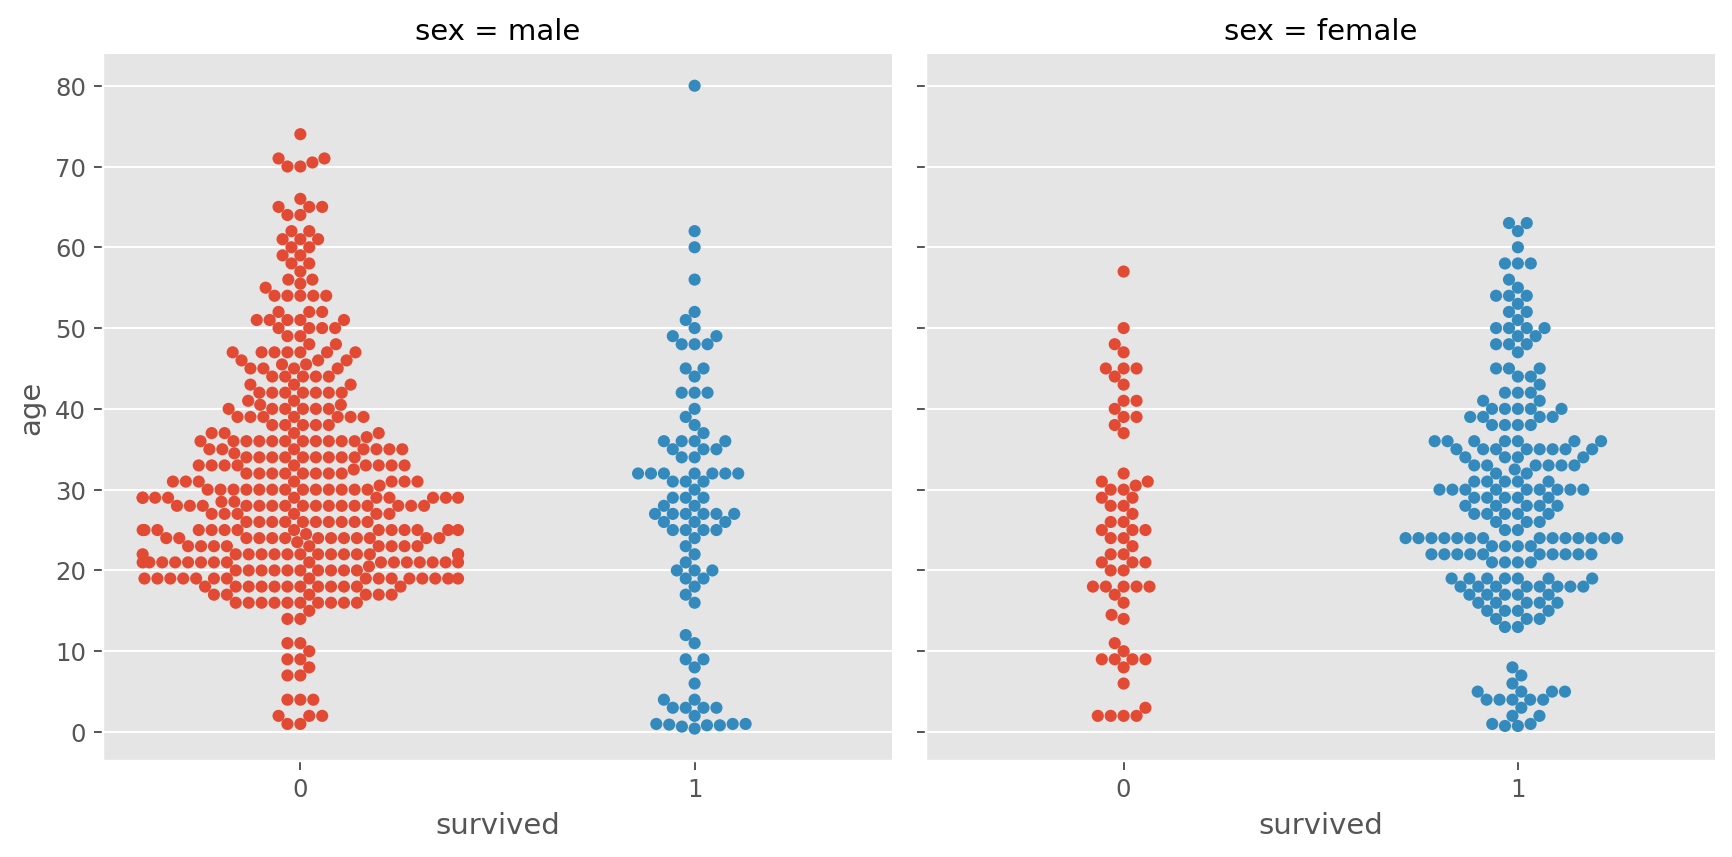

In [101]:
sns.catplot(x='survived',y='age',data=titanic, kind='swarm', col='sex')
plt.show()

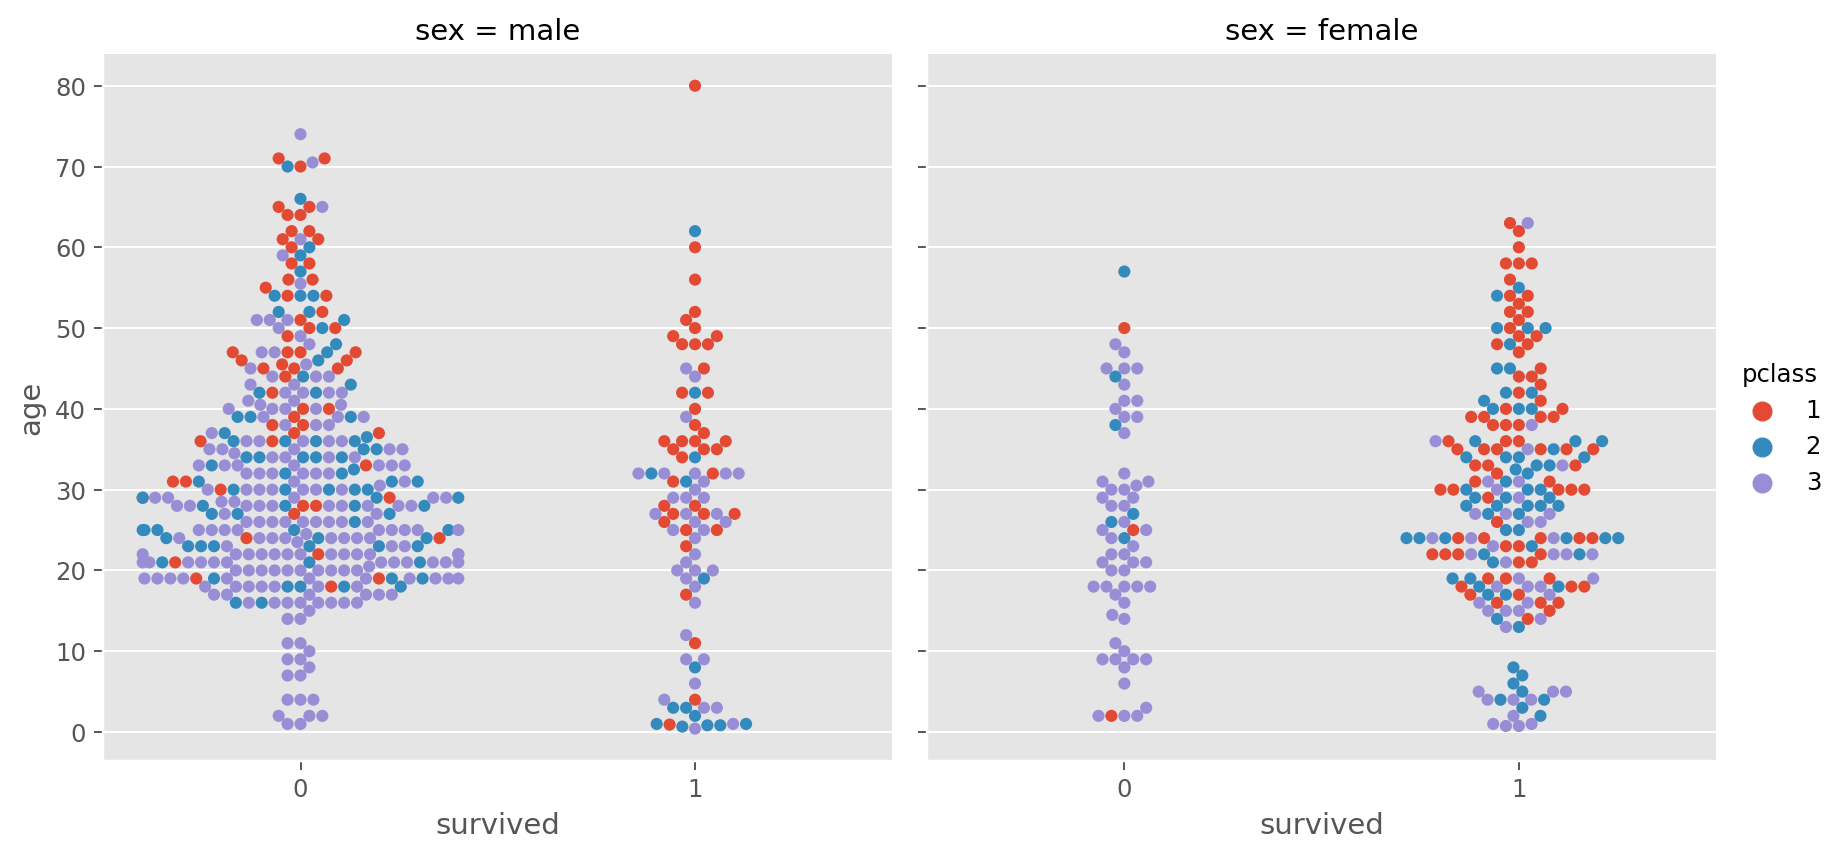

In [102]:
sns.catplot(x='survived',y='age',data=titanic, kind='swarm', col='sex',hue='pclass')
plt.show()

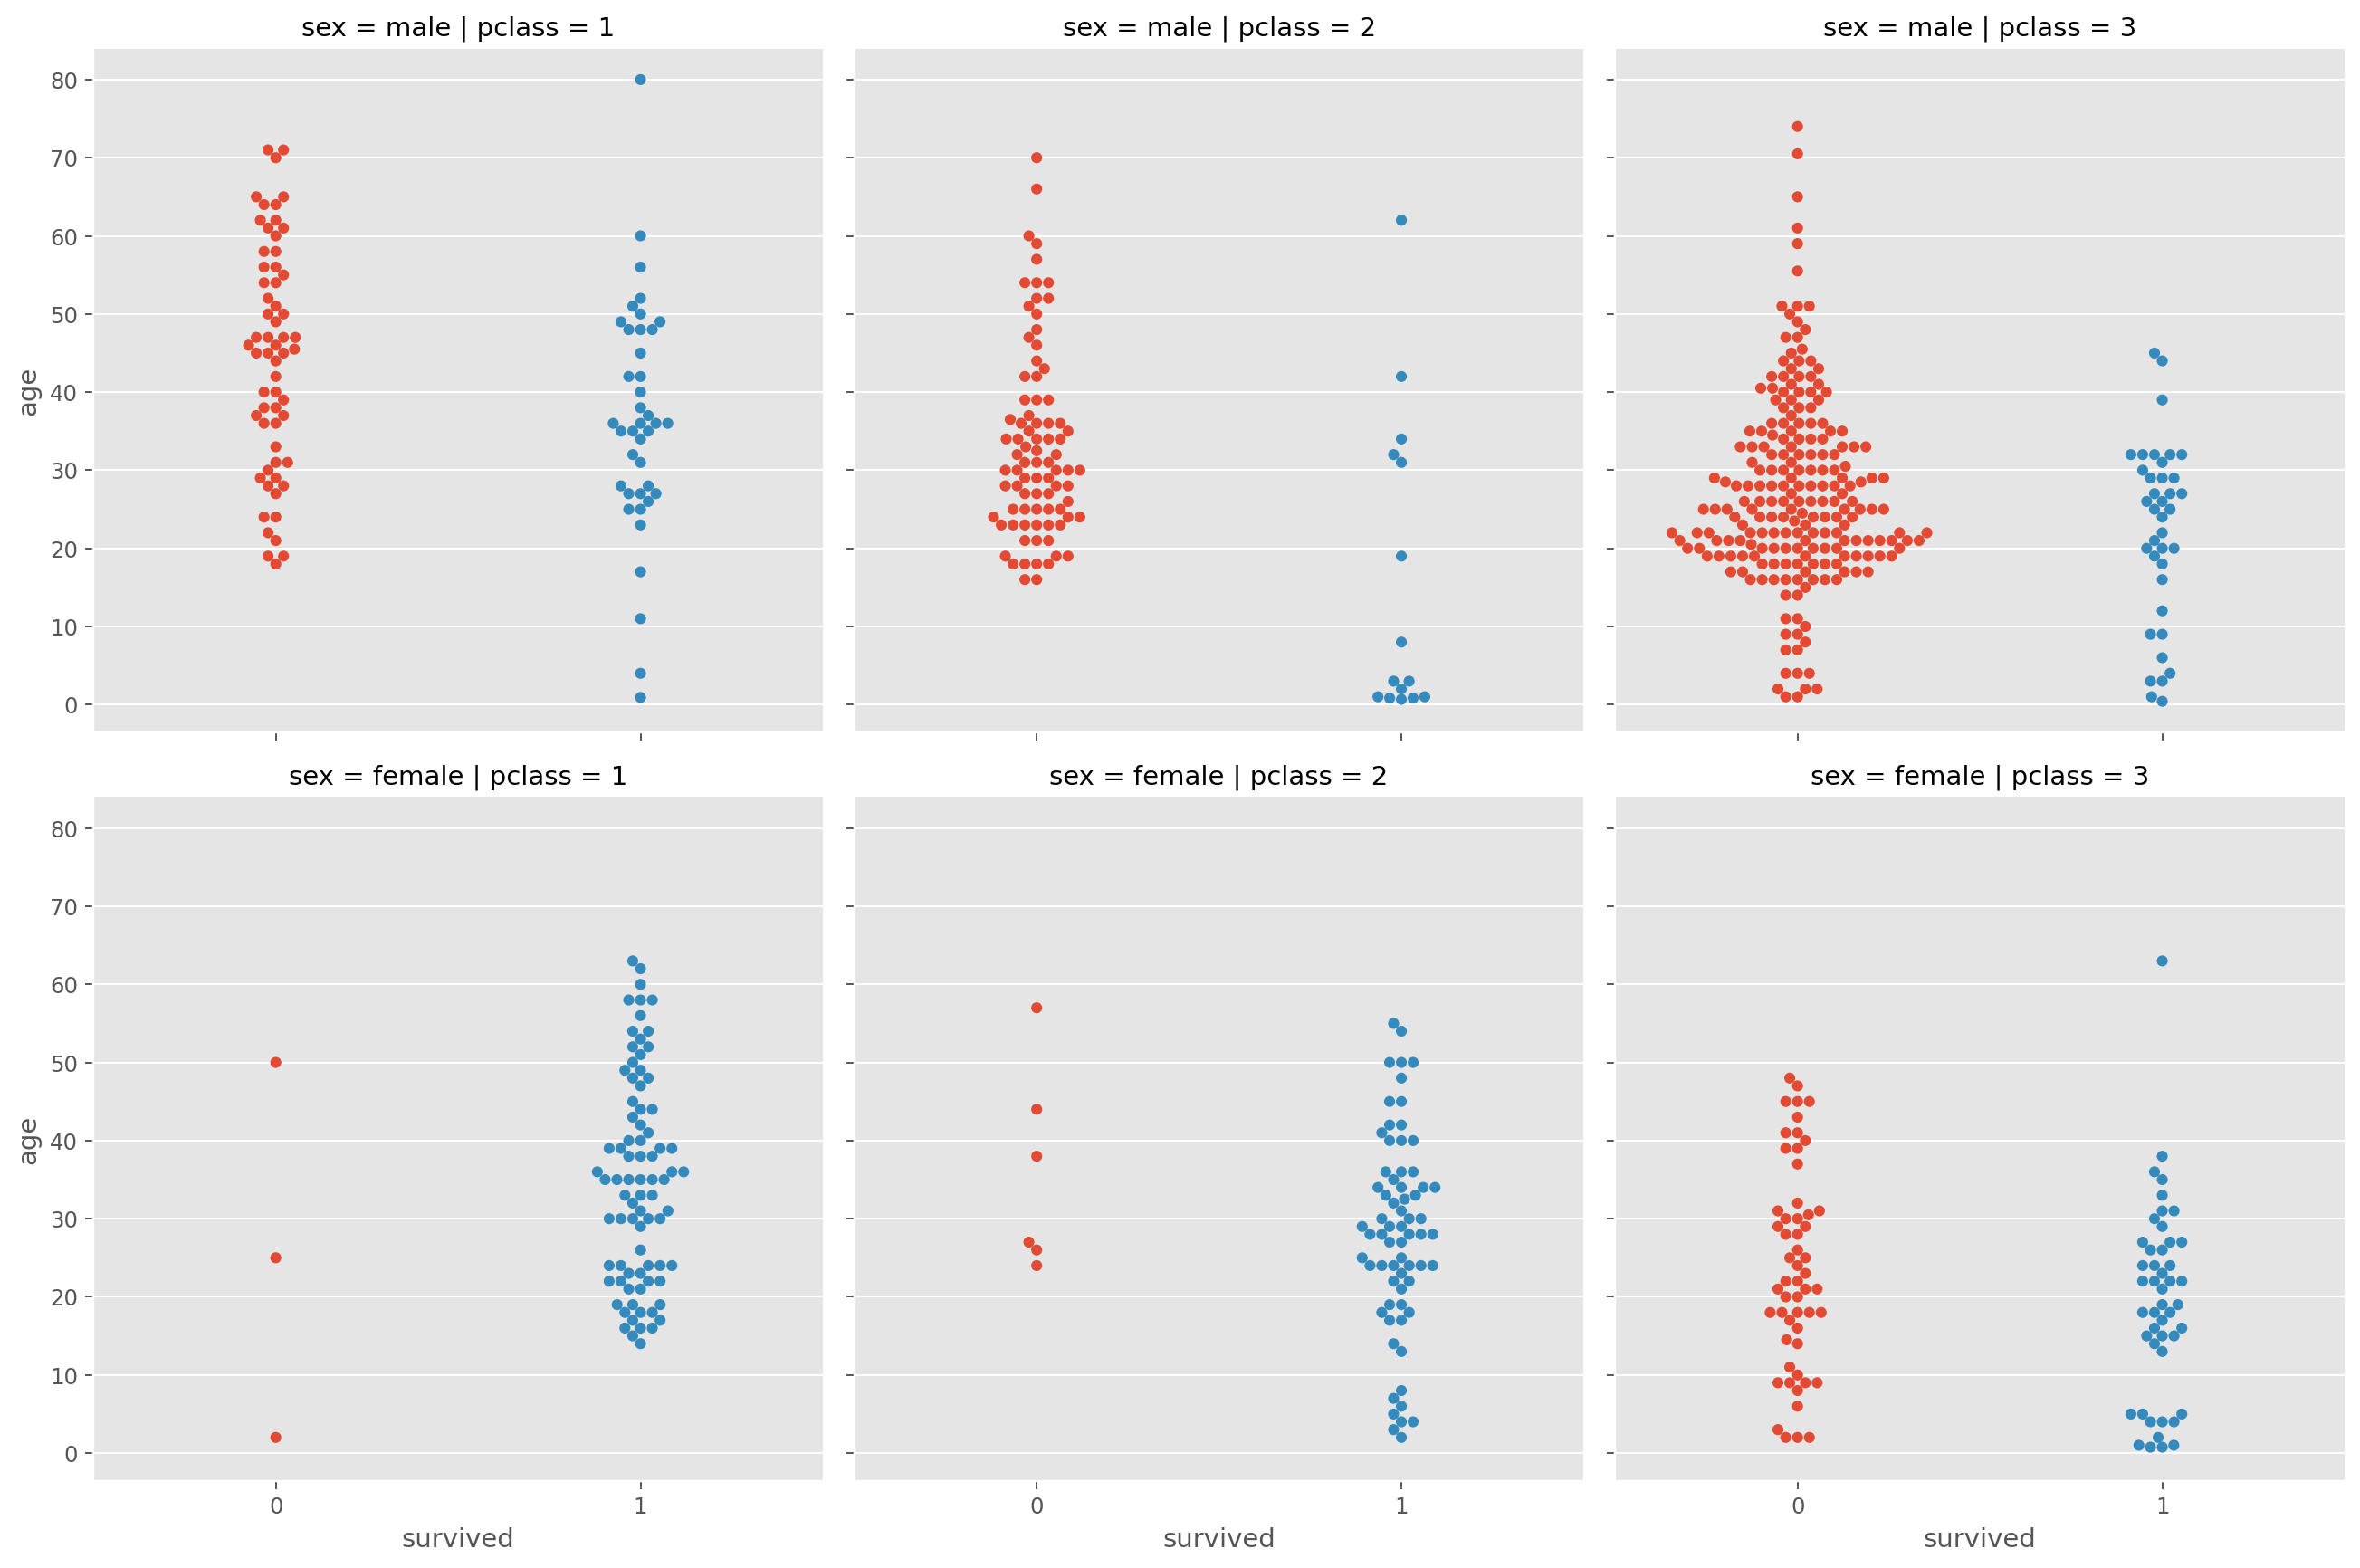

In [103]:
sns.catplot(x='survived',y='age',data=titanic, kind='swarm', row='sex', col='pclass')
plt.show()

---
## Fare
___

<AxesSubplot:>

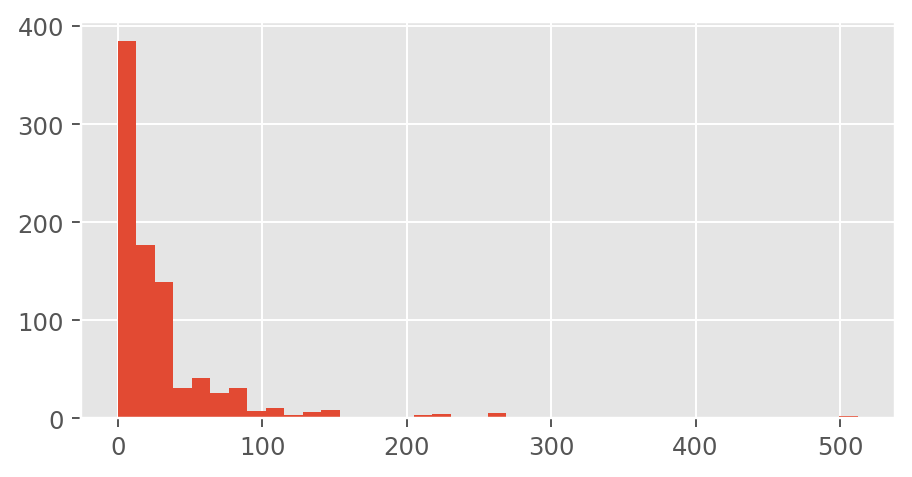

In [104]:
titanic['fare'].hist(bins= 40)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


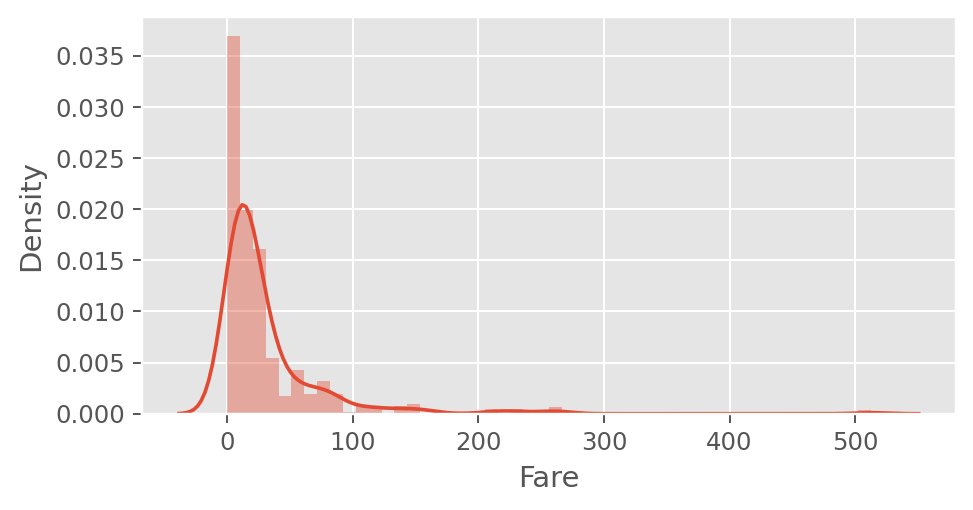

In [107]:
sns.distplot(titanic['fare'])
plt.xlabel('Fare')
plt.show()

<AxesSubplot:xlabel='fare', ylabel='Density'>

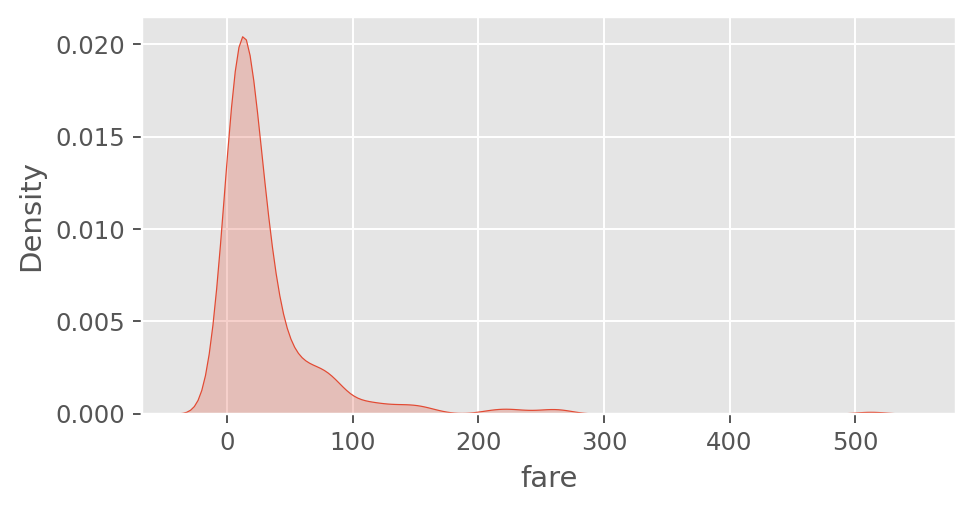

In [106]:
sns.kdeplot(titanic['fare'],shade=True)

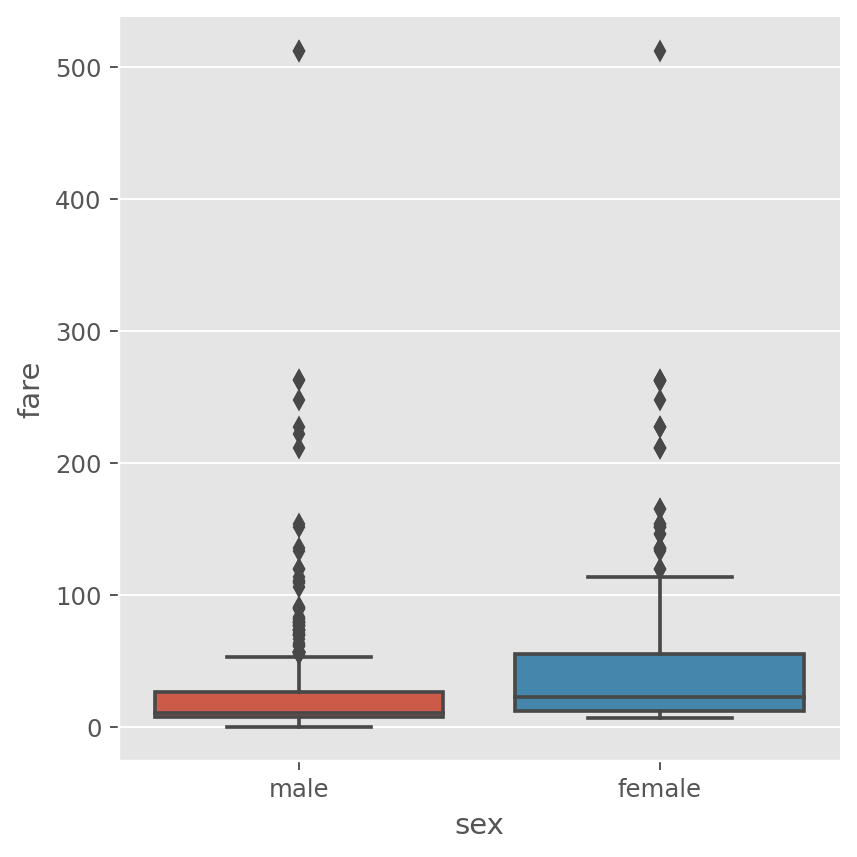

In [108]:
sns.catplot(x='sex', y='fare',data= titanic, kind= 'box')

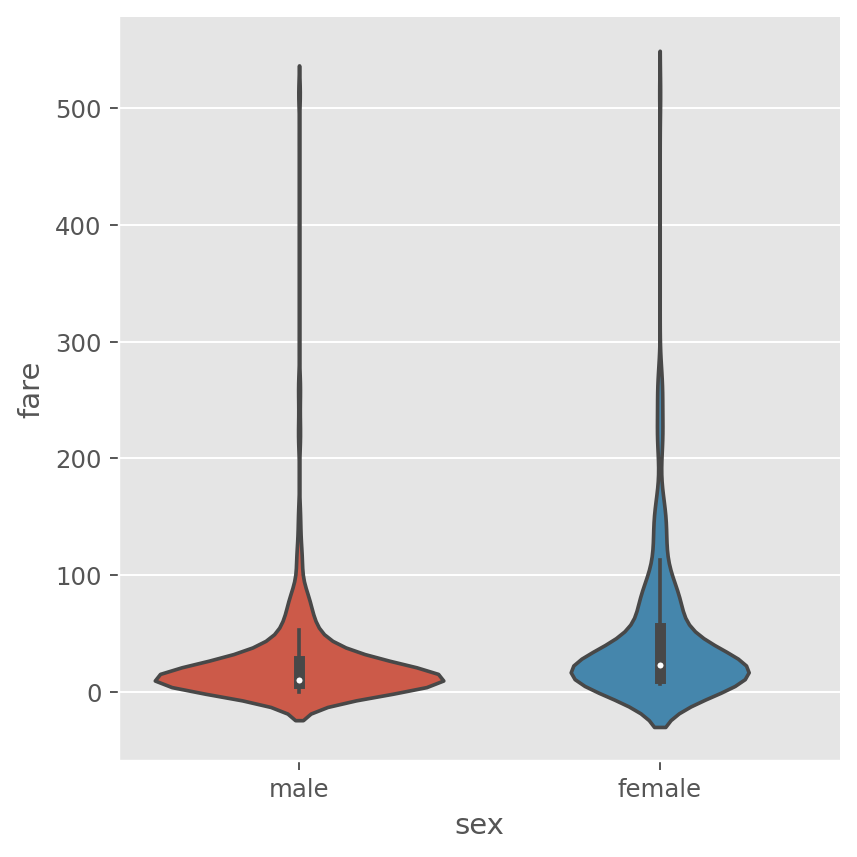

In [109]:
sns.catplot(x='sex', y='fare',data= titanic, kind= 'violin')

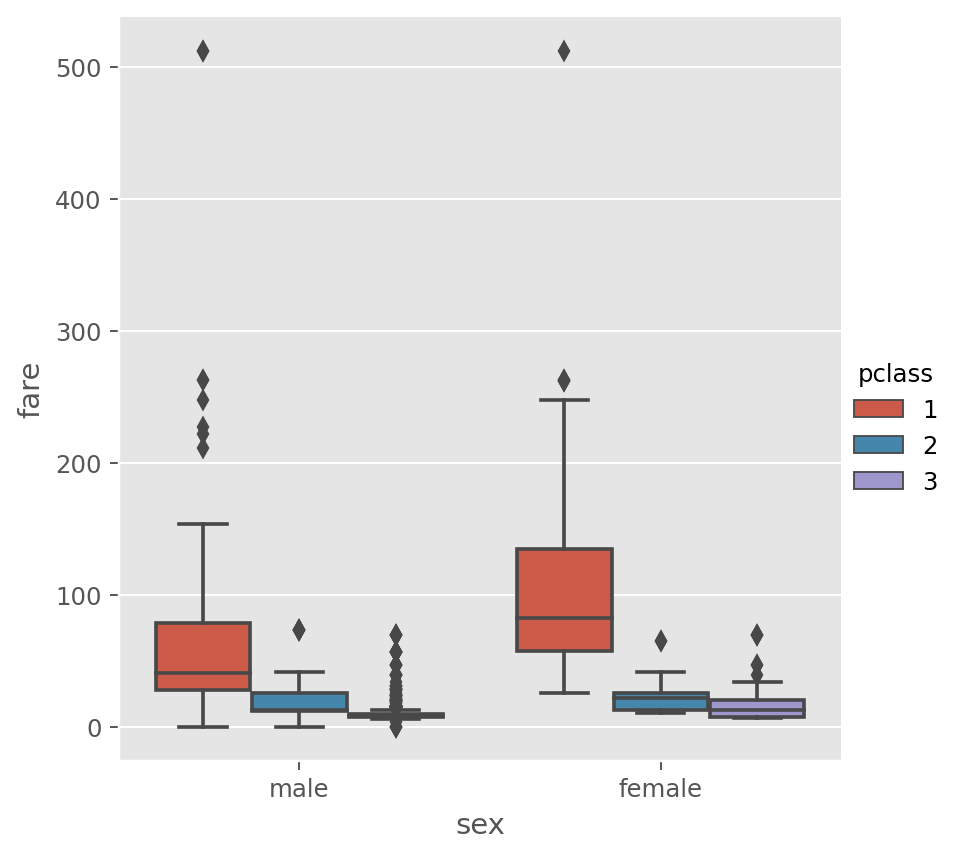

In [110]:
sns.catplot(x='sex', y='fare',data= titanic, kind= 'box', hue='pclass')

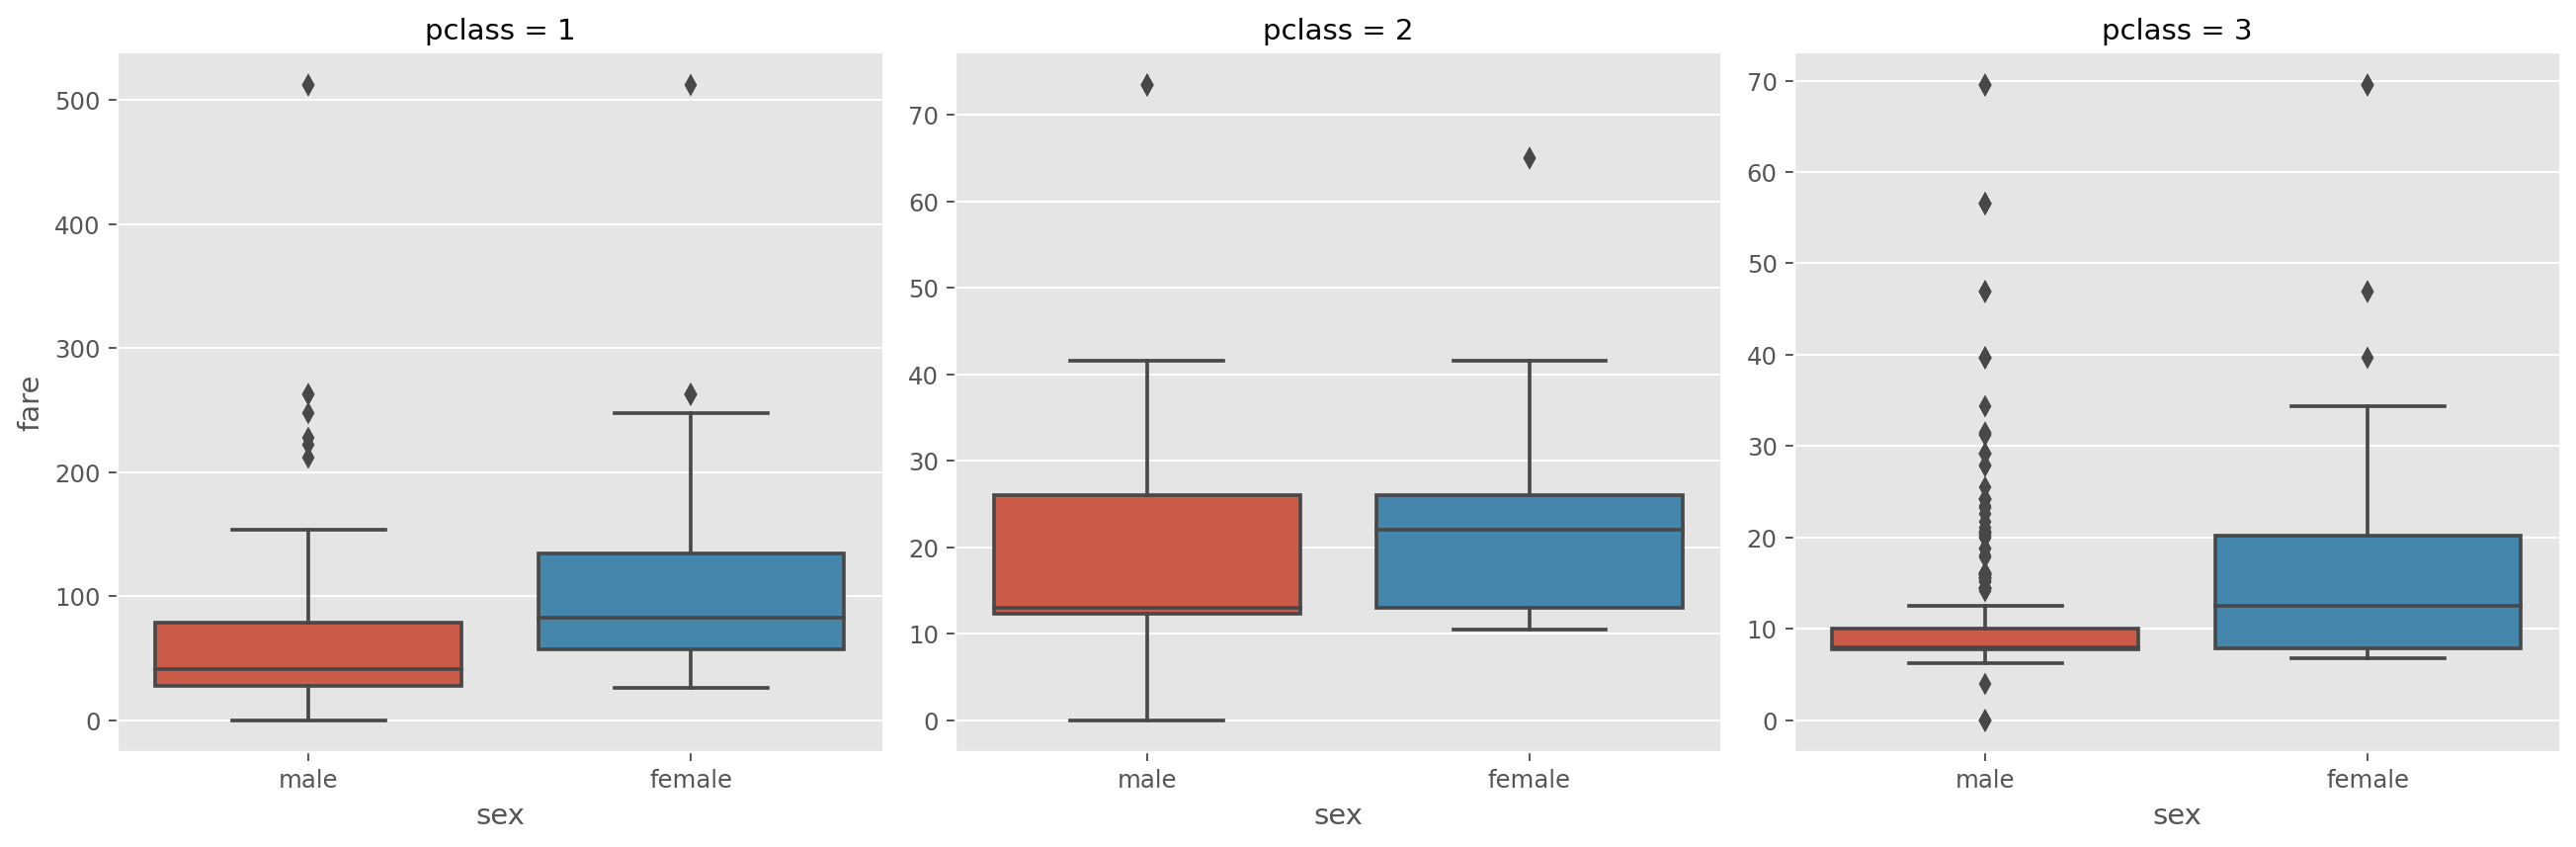

In [112]:
sns.catplot(x='sex', y='fare',data= titanic, kind= 'box', col= 'pclass',sharey=False)

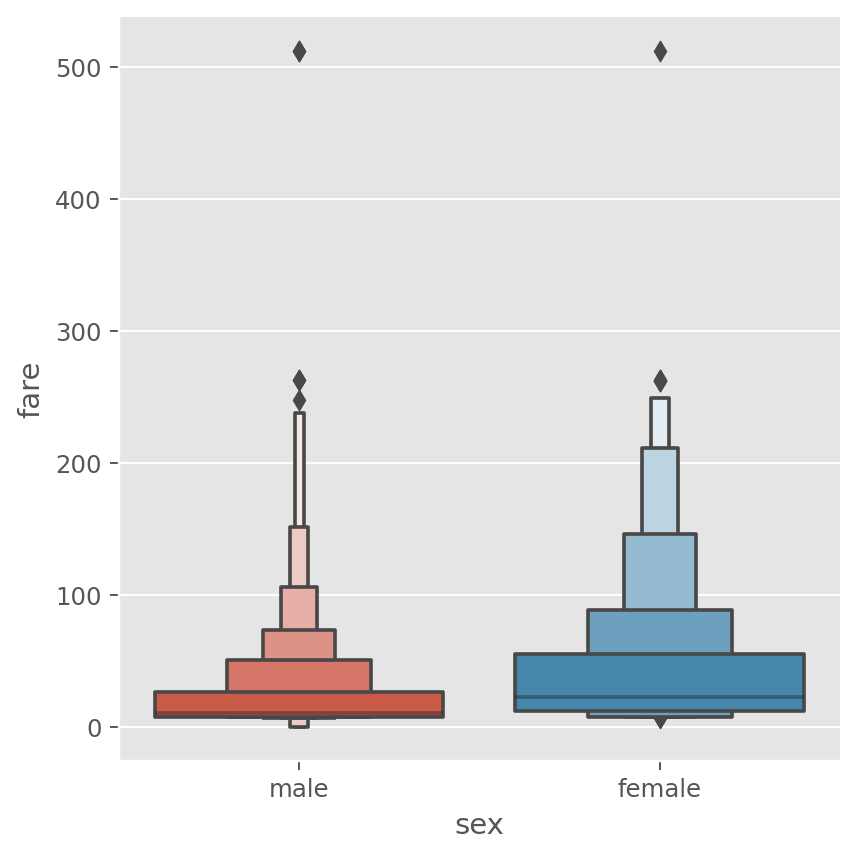

In [113]:
sns.catplot(x='sex', y='fare',data= titanic, kind= 'boxen')

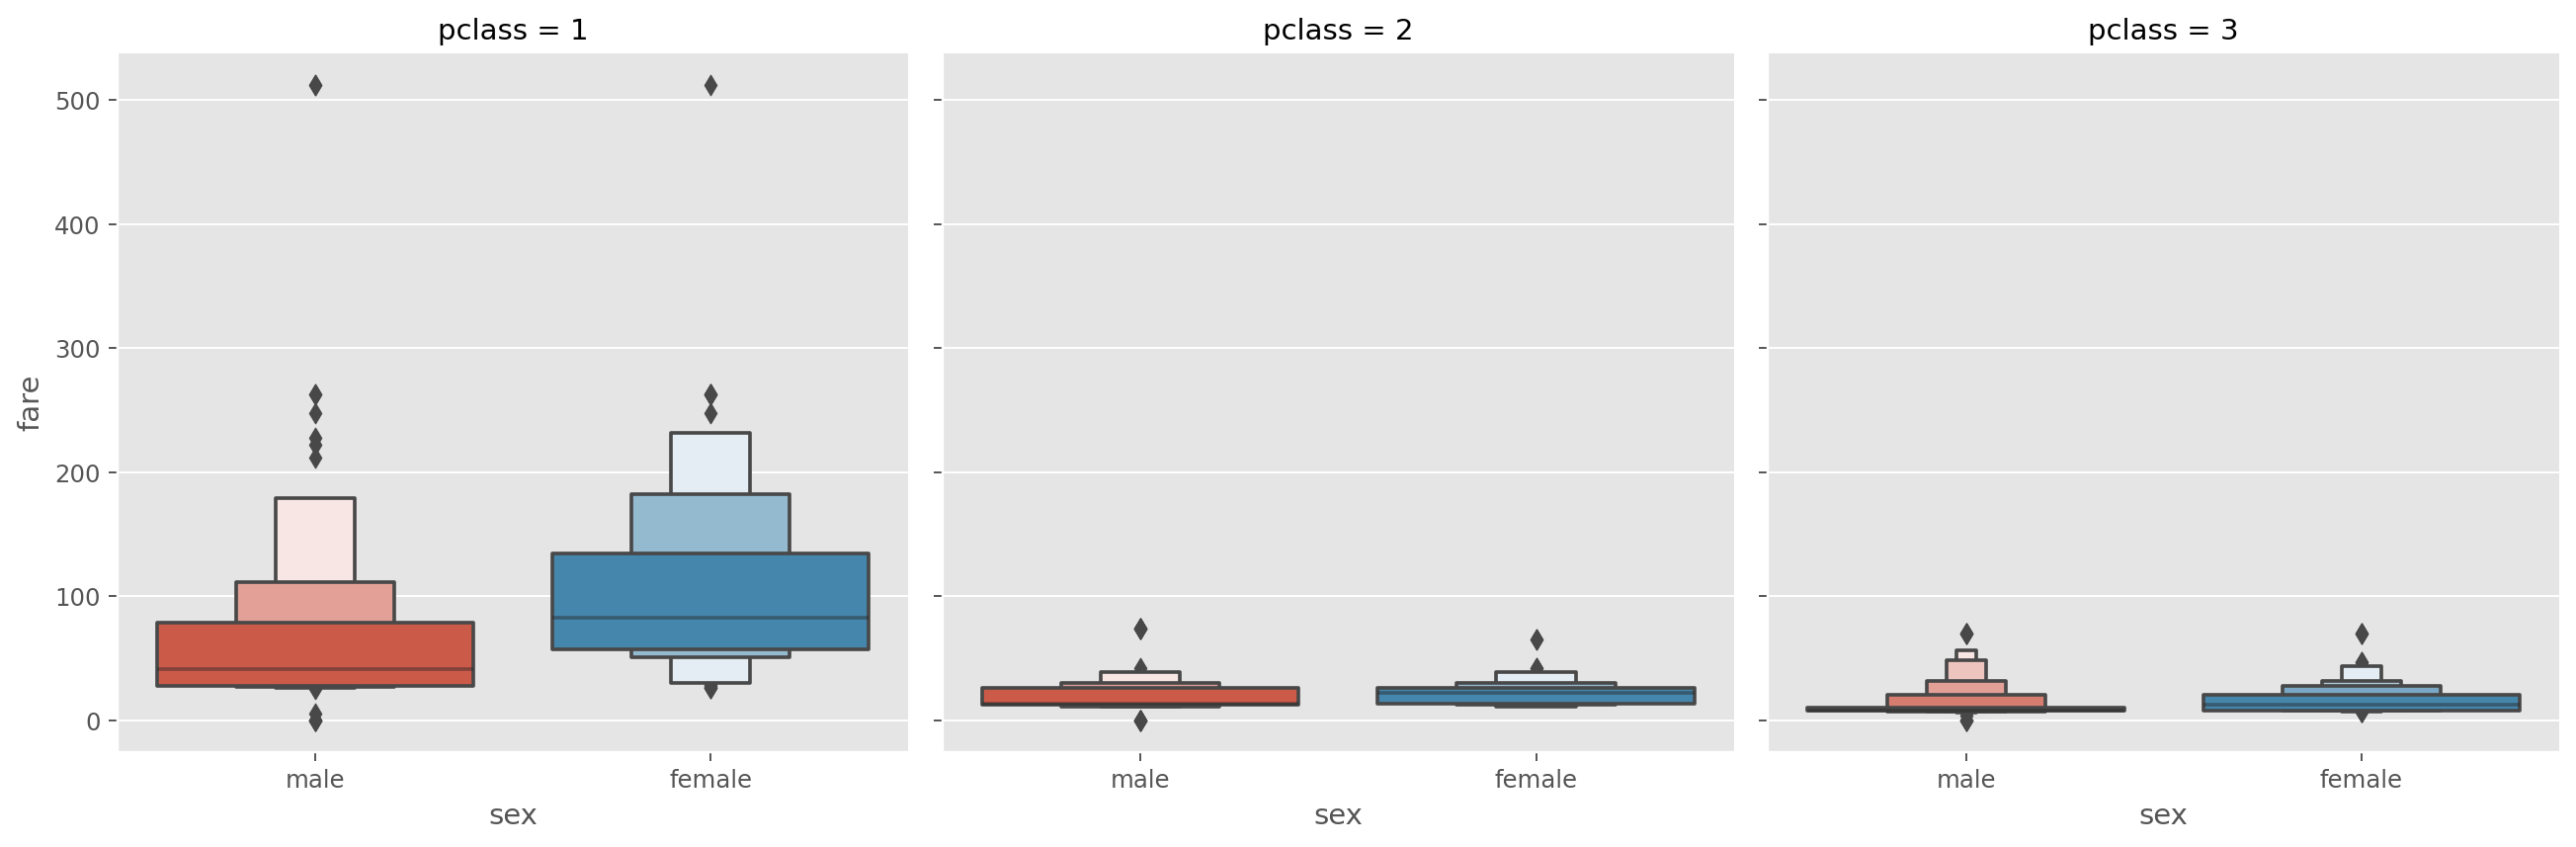

In [114]:
sns.catplot(x='sex', y='fare',data= titanic, kind= 'boxen',col= 'pclass')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 78.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.3% of the points

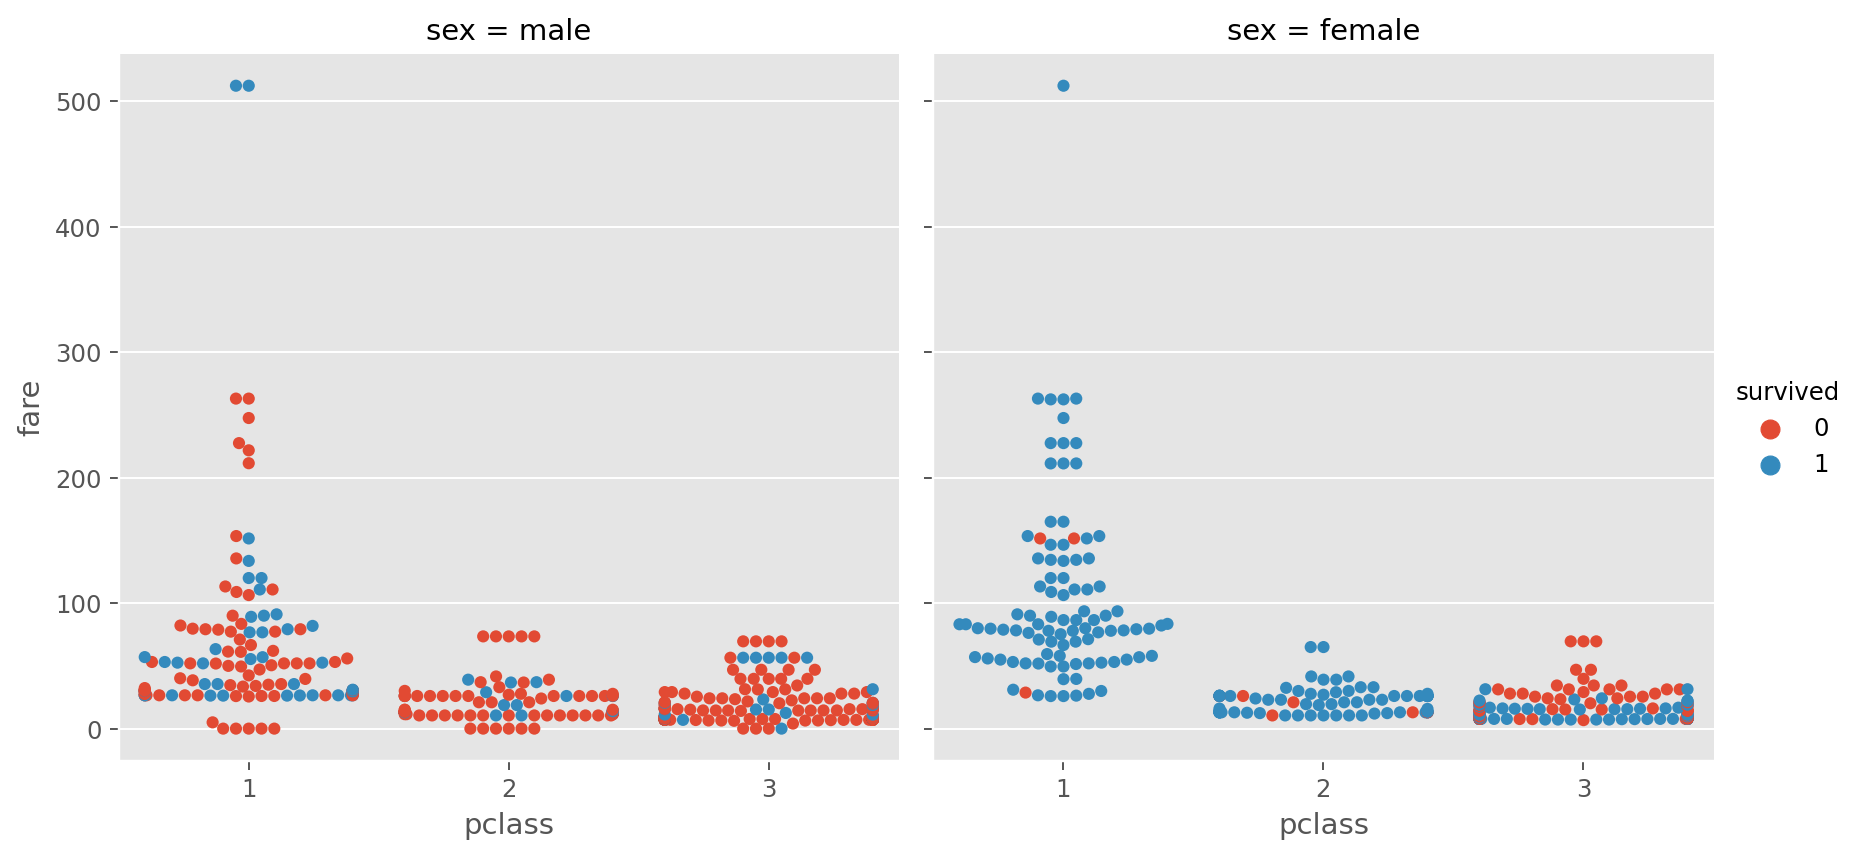

In [116]:
sns.catplot(x= 'pclass', y= 'fare', data= titanic, kind='swarm', hue= 'survived', col= 'sex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


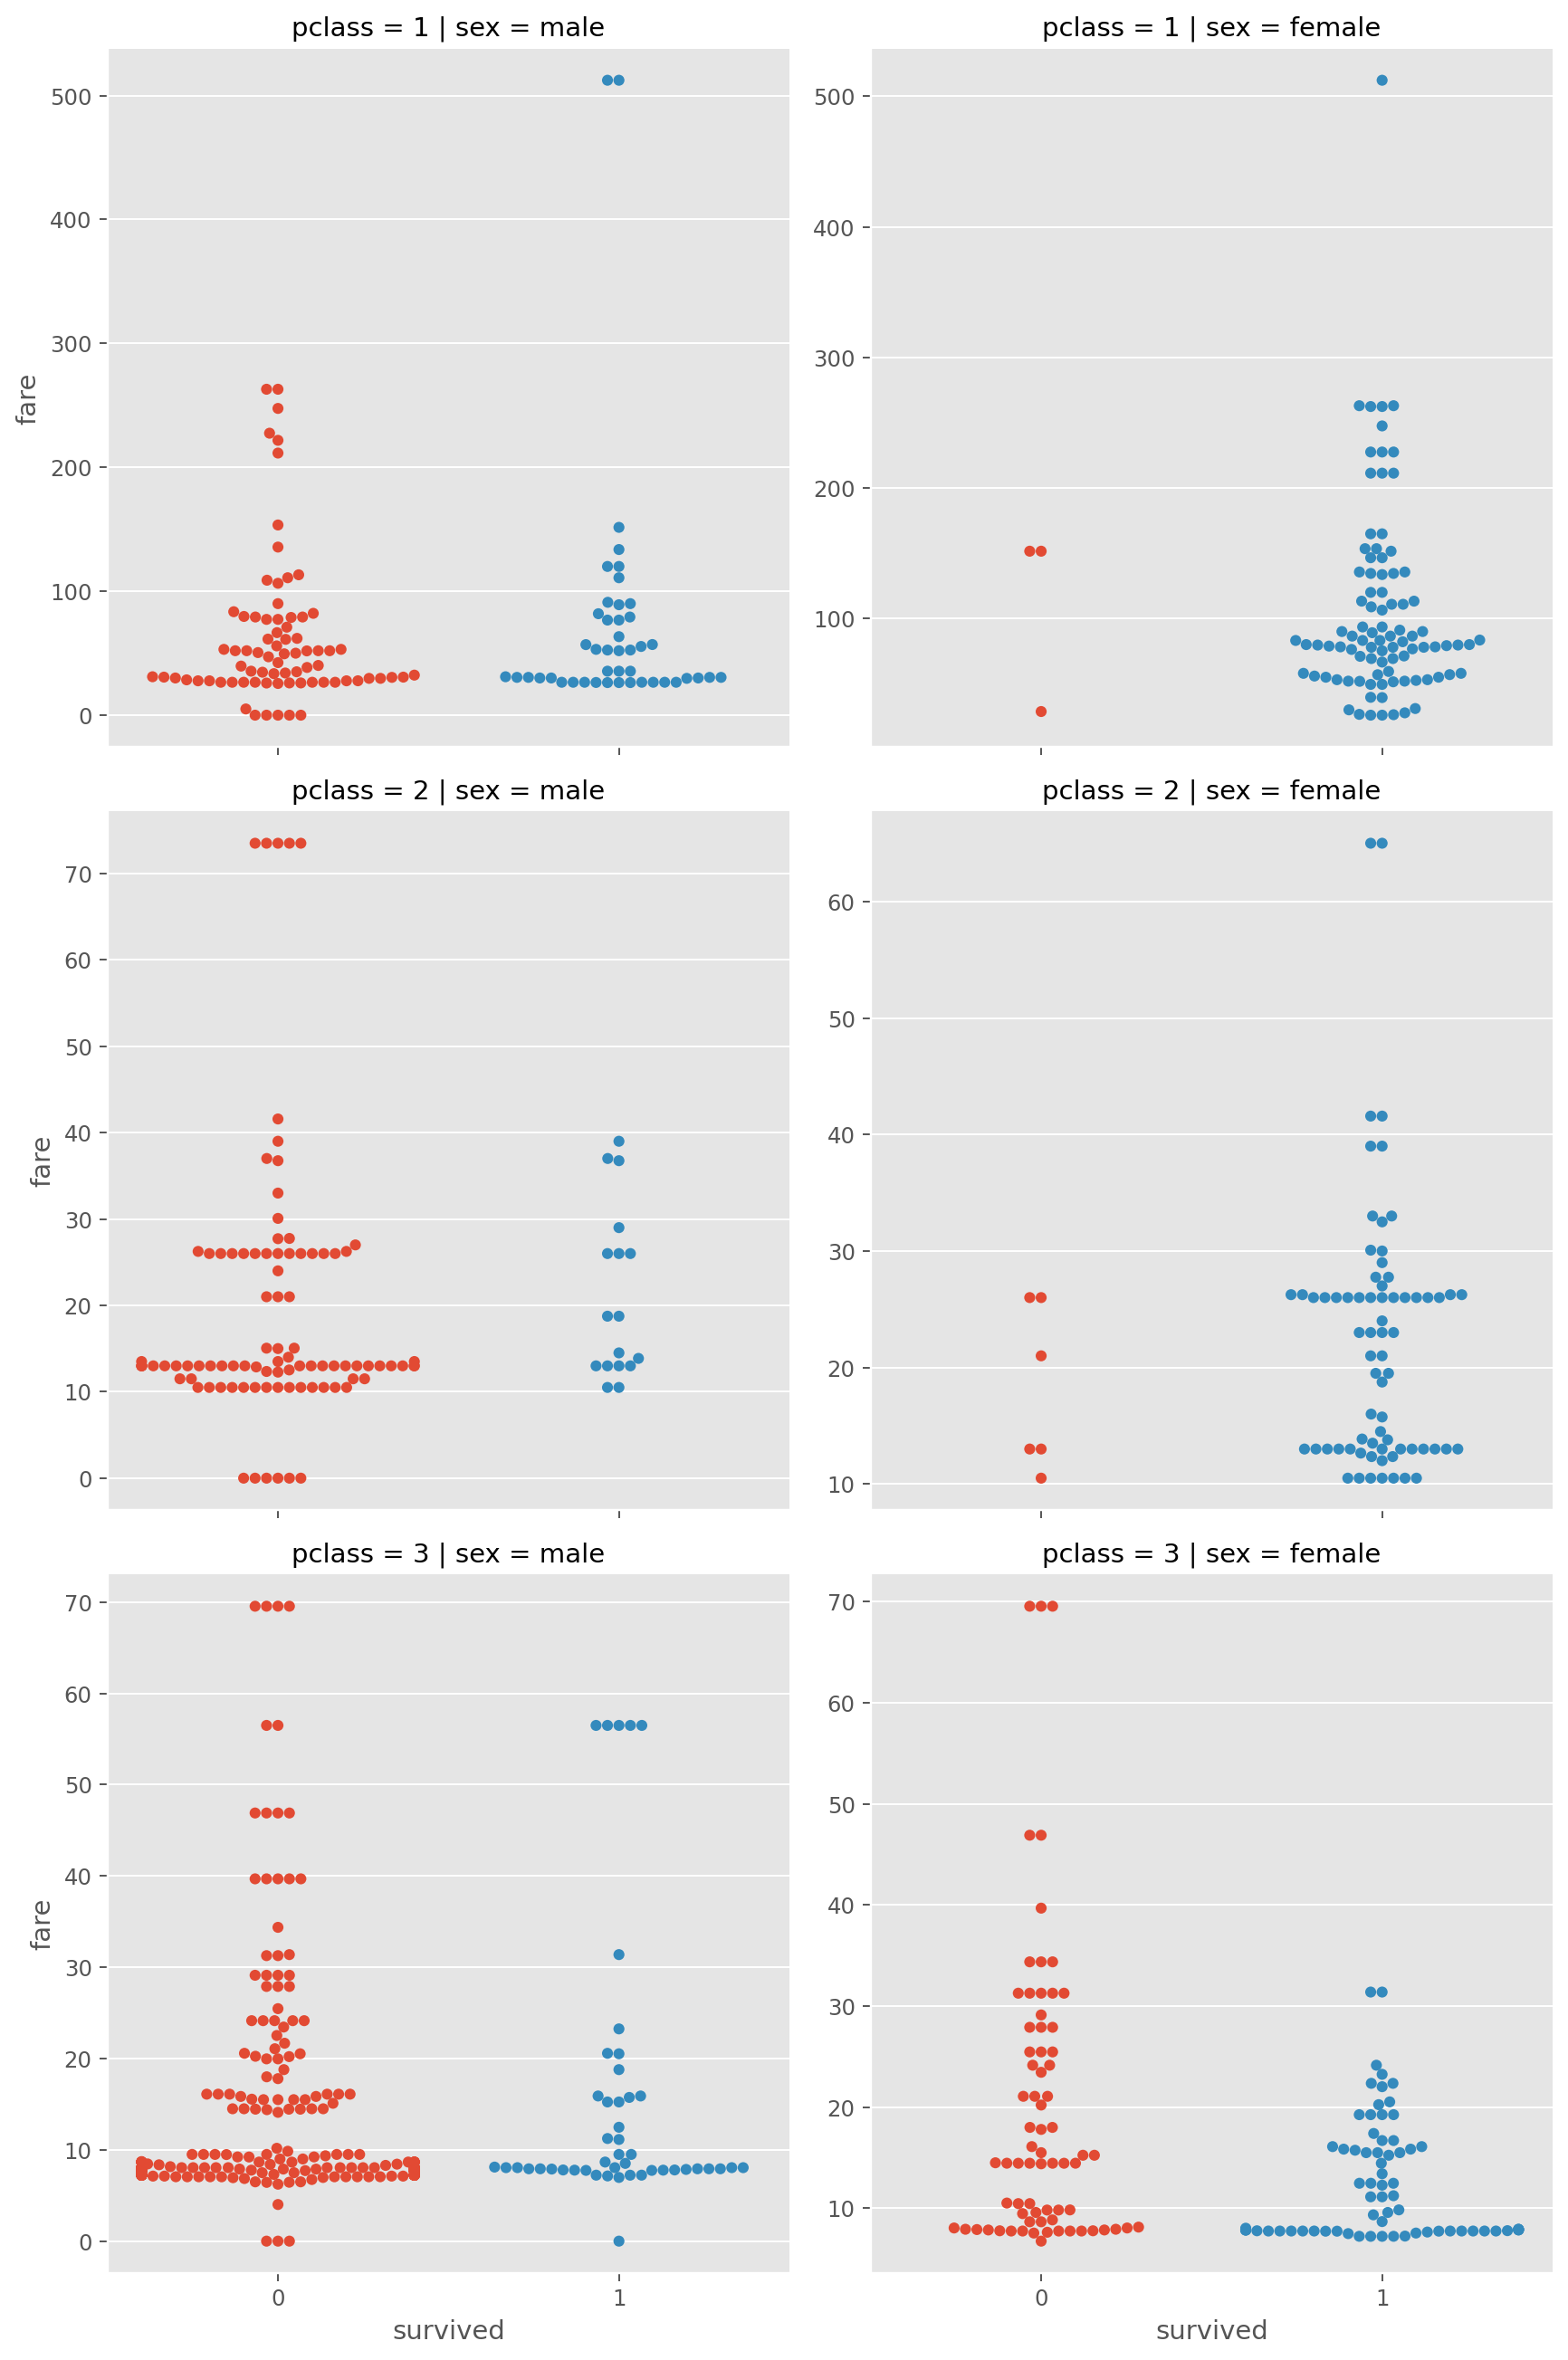

In [118]:
sns.catplot(x= 'survived', y= 'fare', data= titanic, kind='swarm', col= 'sex', row= 'pclass', sharey= False)

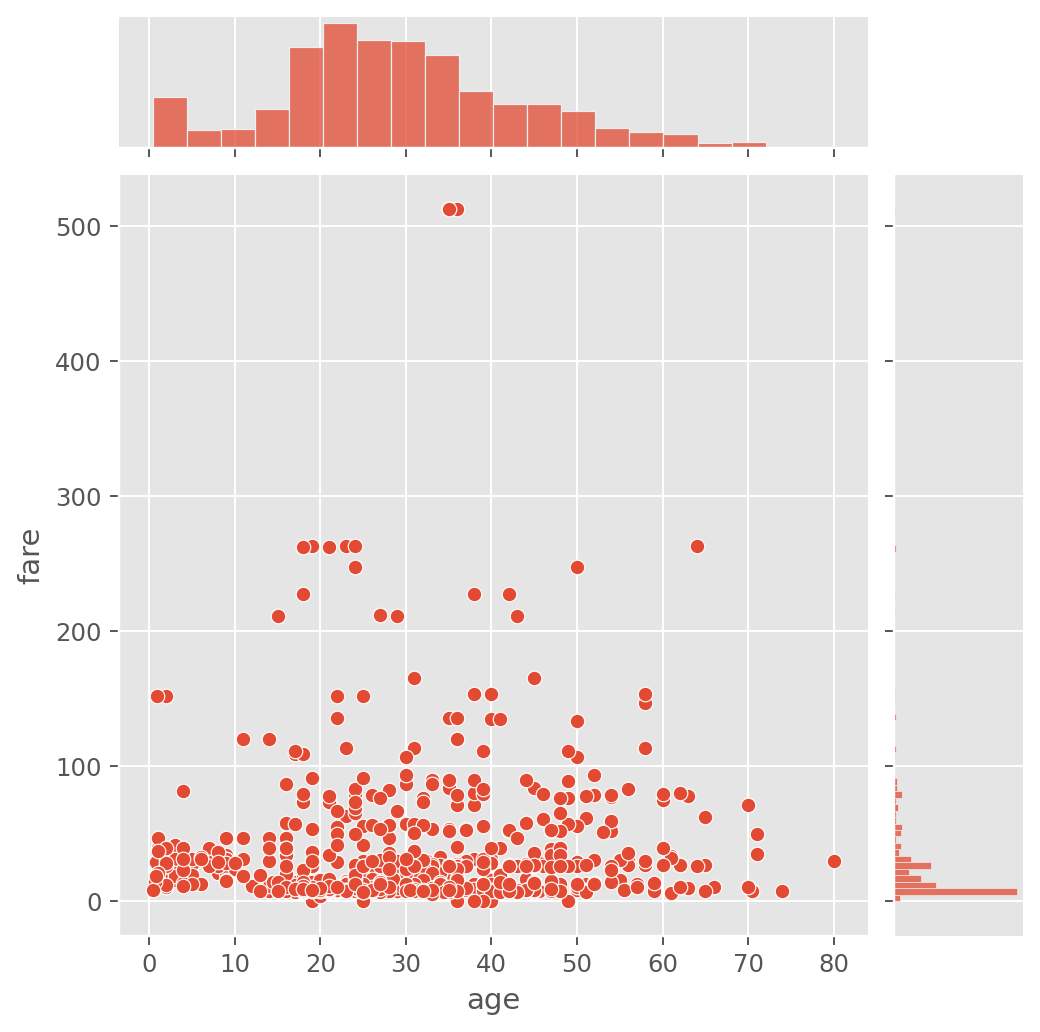

In [121]:
sns.jointplot(x='age', y='fare', data=titanic)

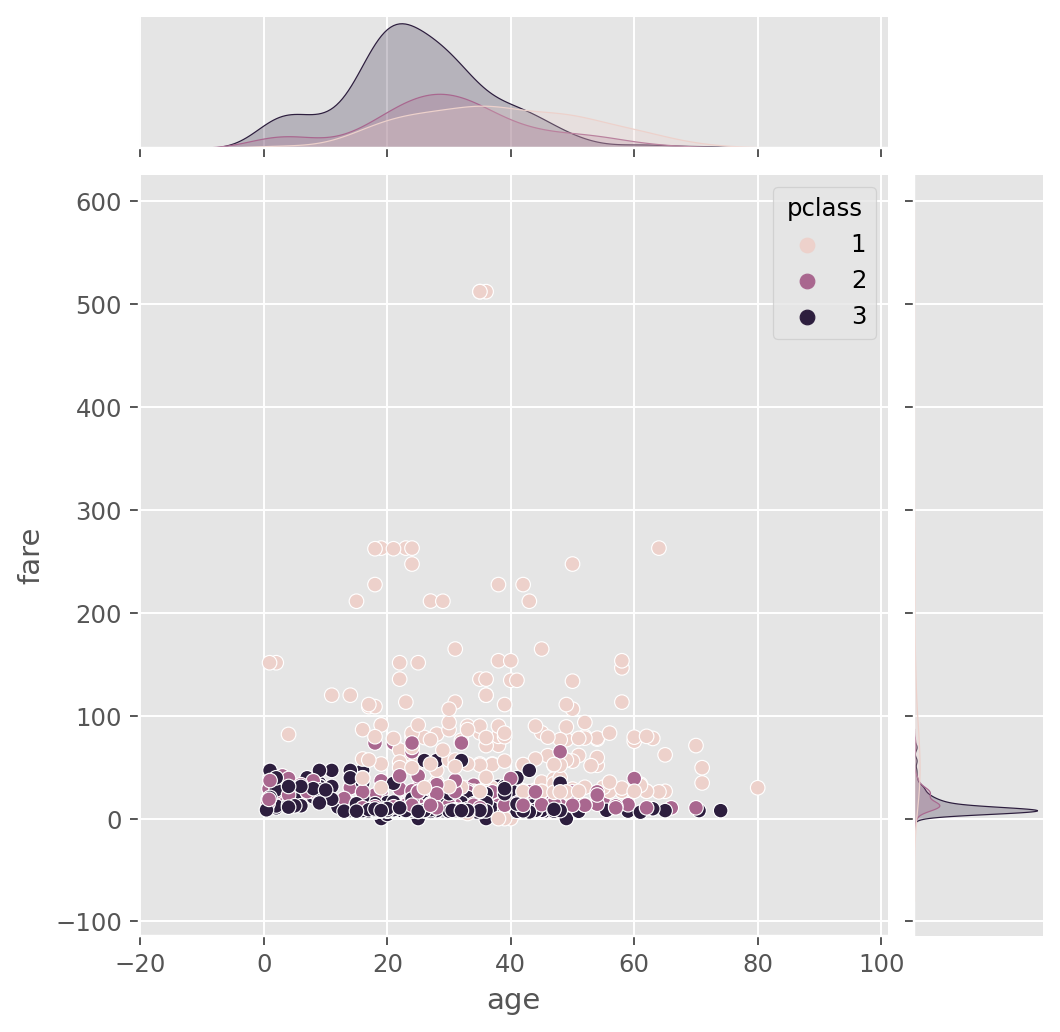

In [120]:
sns.jointplot(x='age', y='fare', data=titanic, hue= 'pclass')

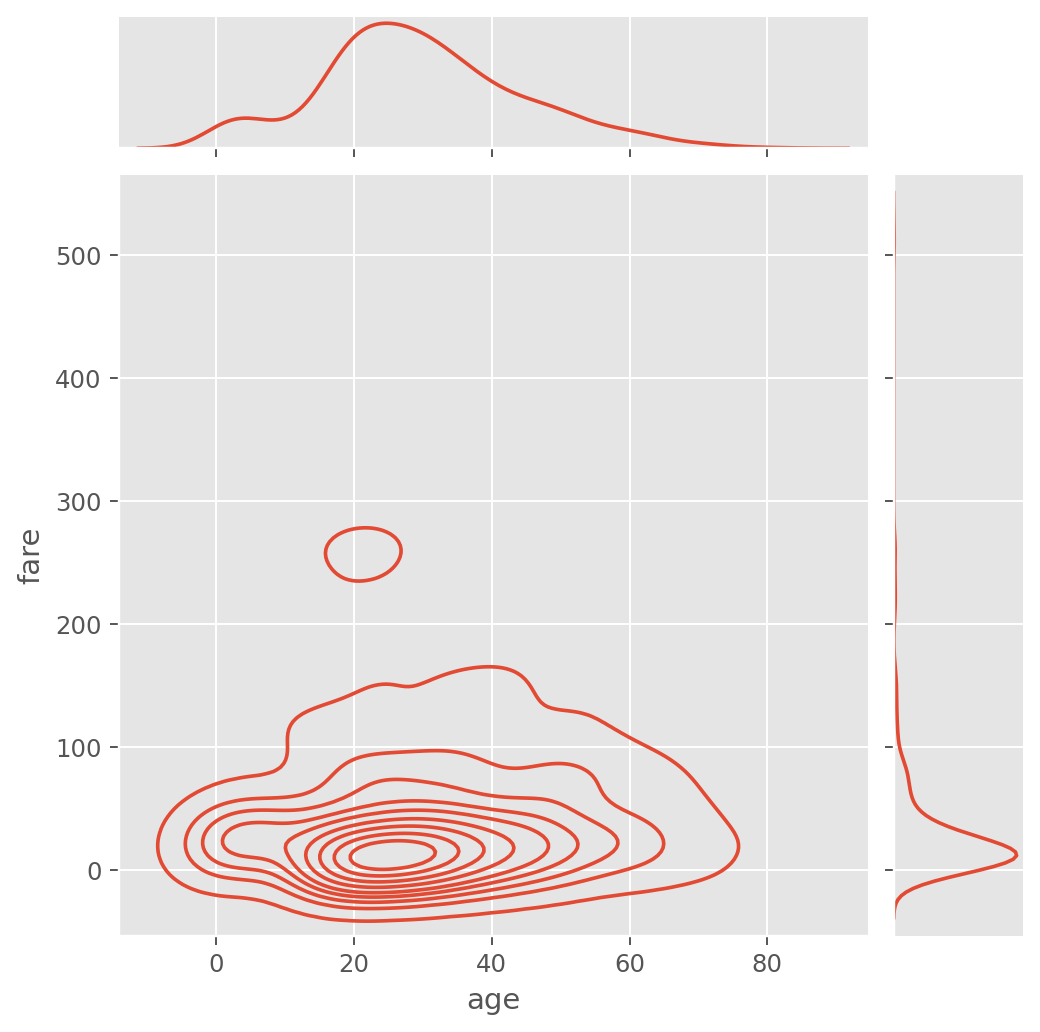

In [122]:
sns.jointplot(x='age', y='fare', data=titanic, kind='kde')

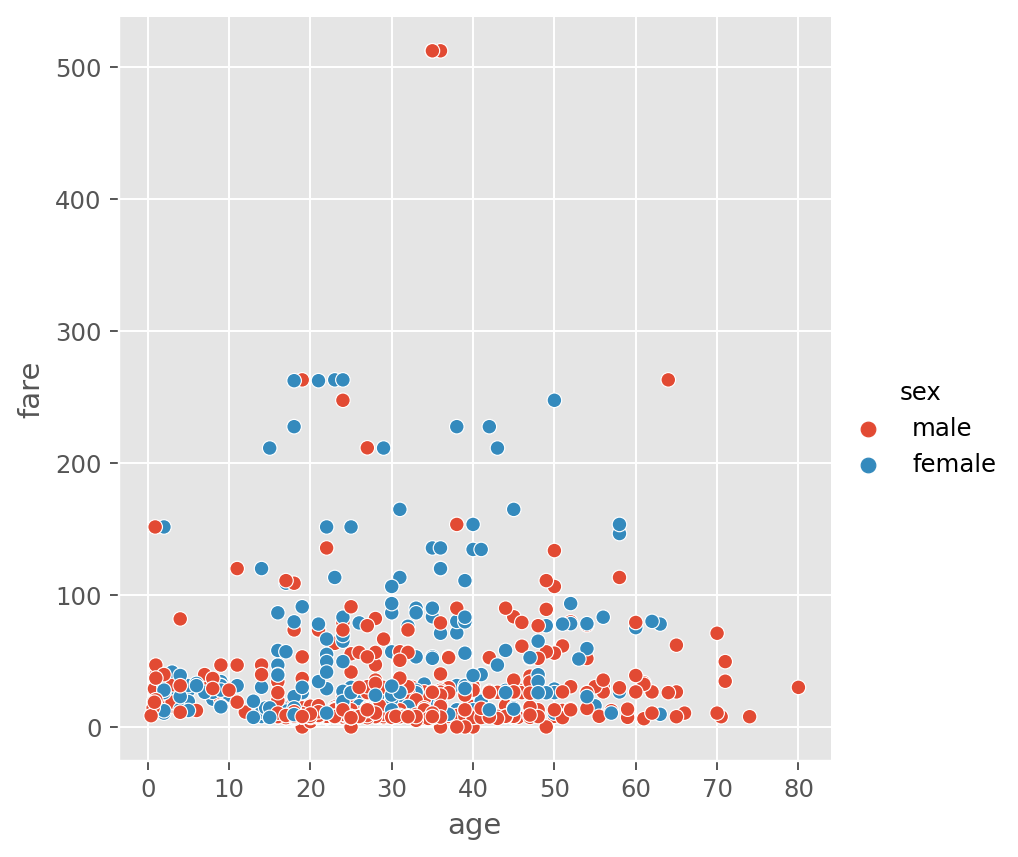

In [123]:
sns.relplot(x='age', y='fare', data= titanic, hue= 'sex')

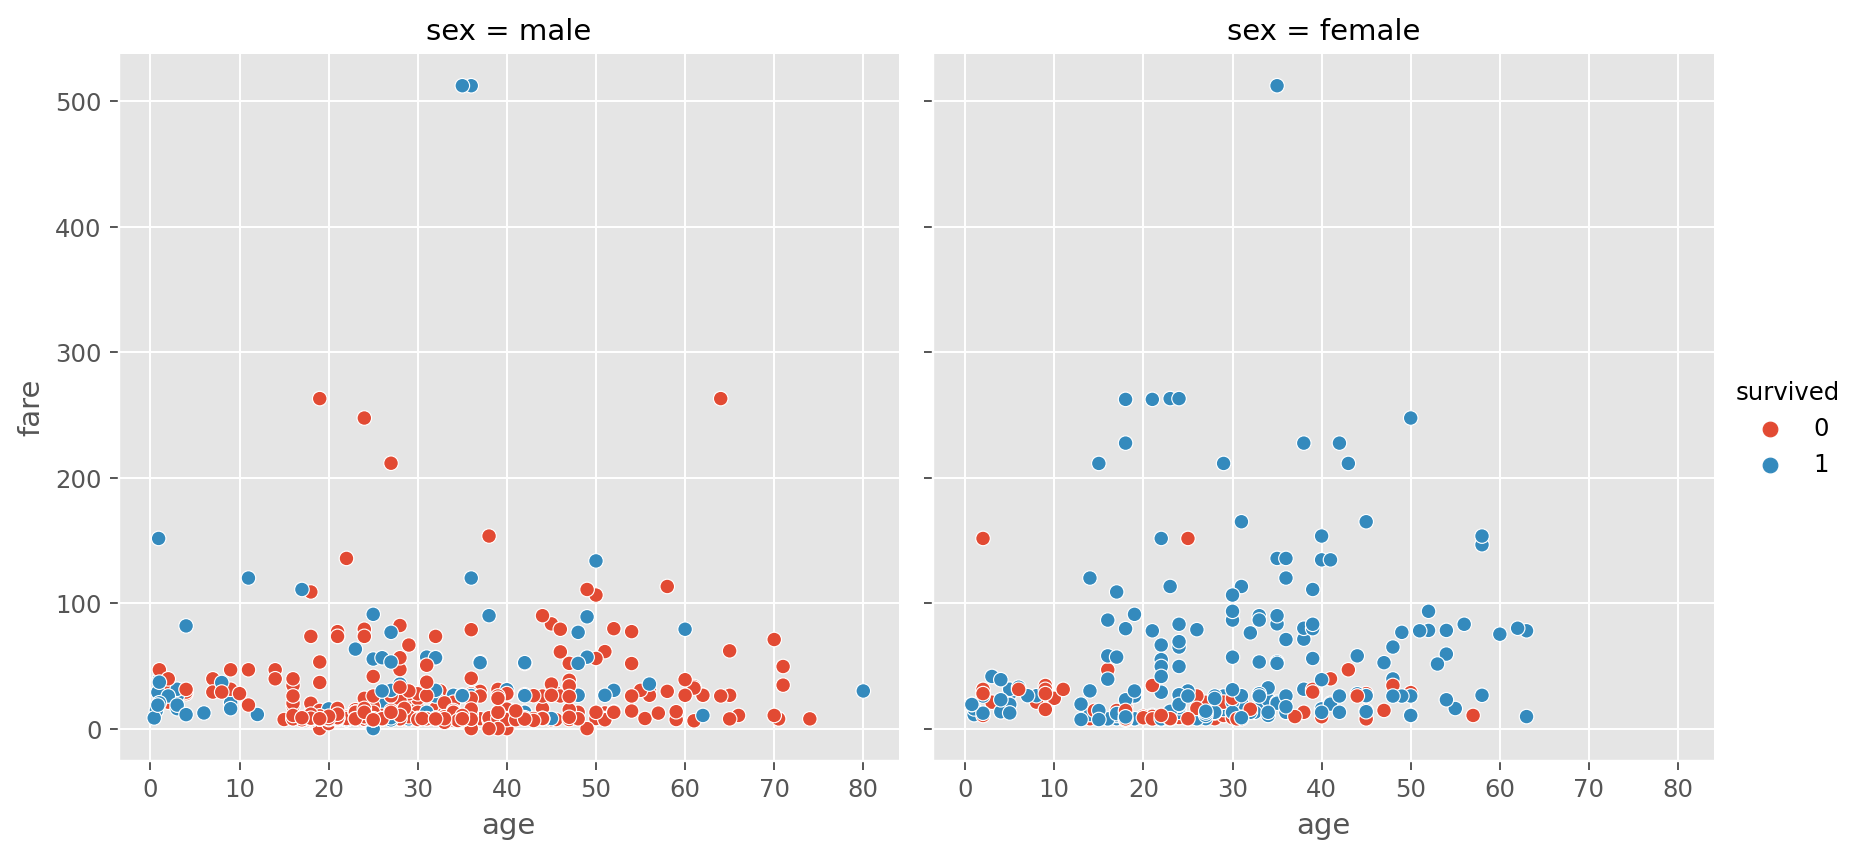

In [124]:
sns.relplot(x='age', y='fare', data= titanic, col= 'sex', hue= 'survived')

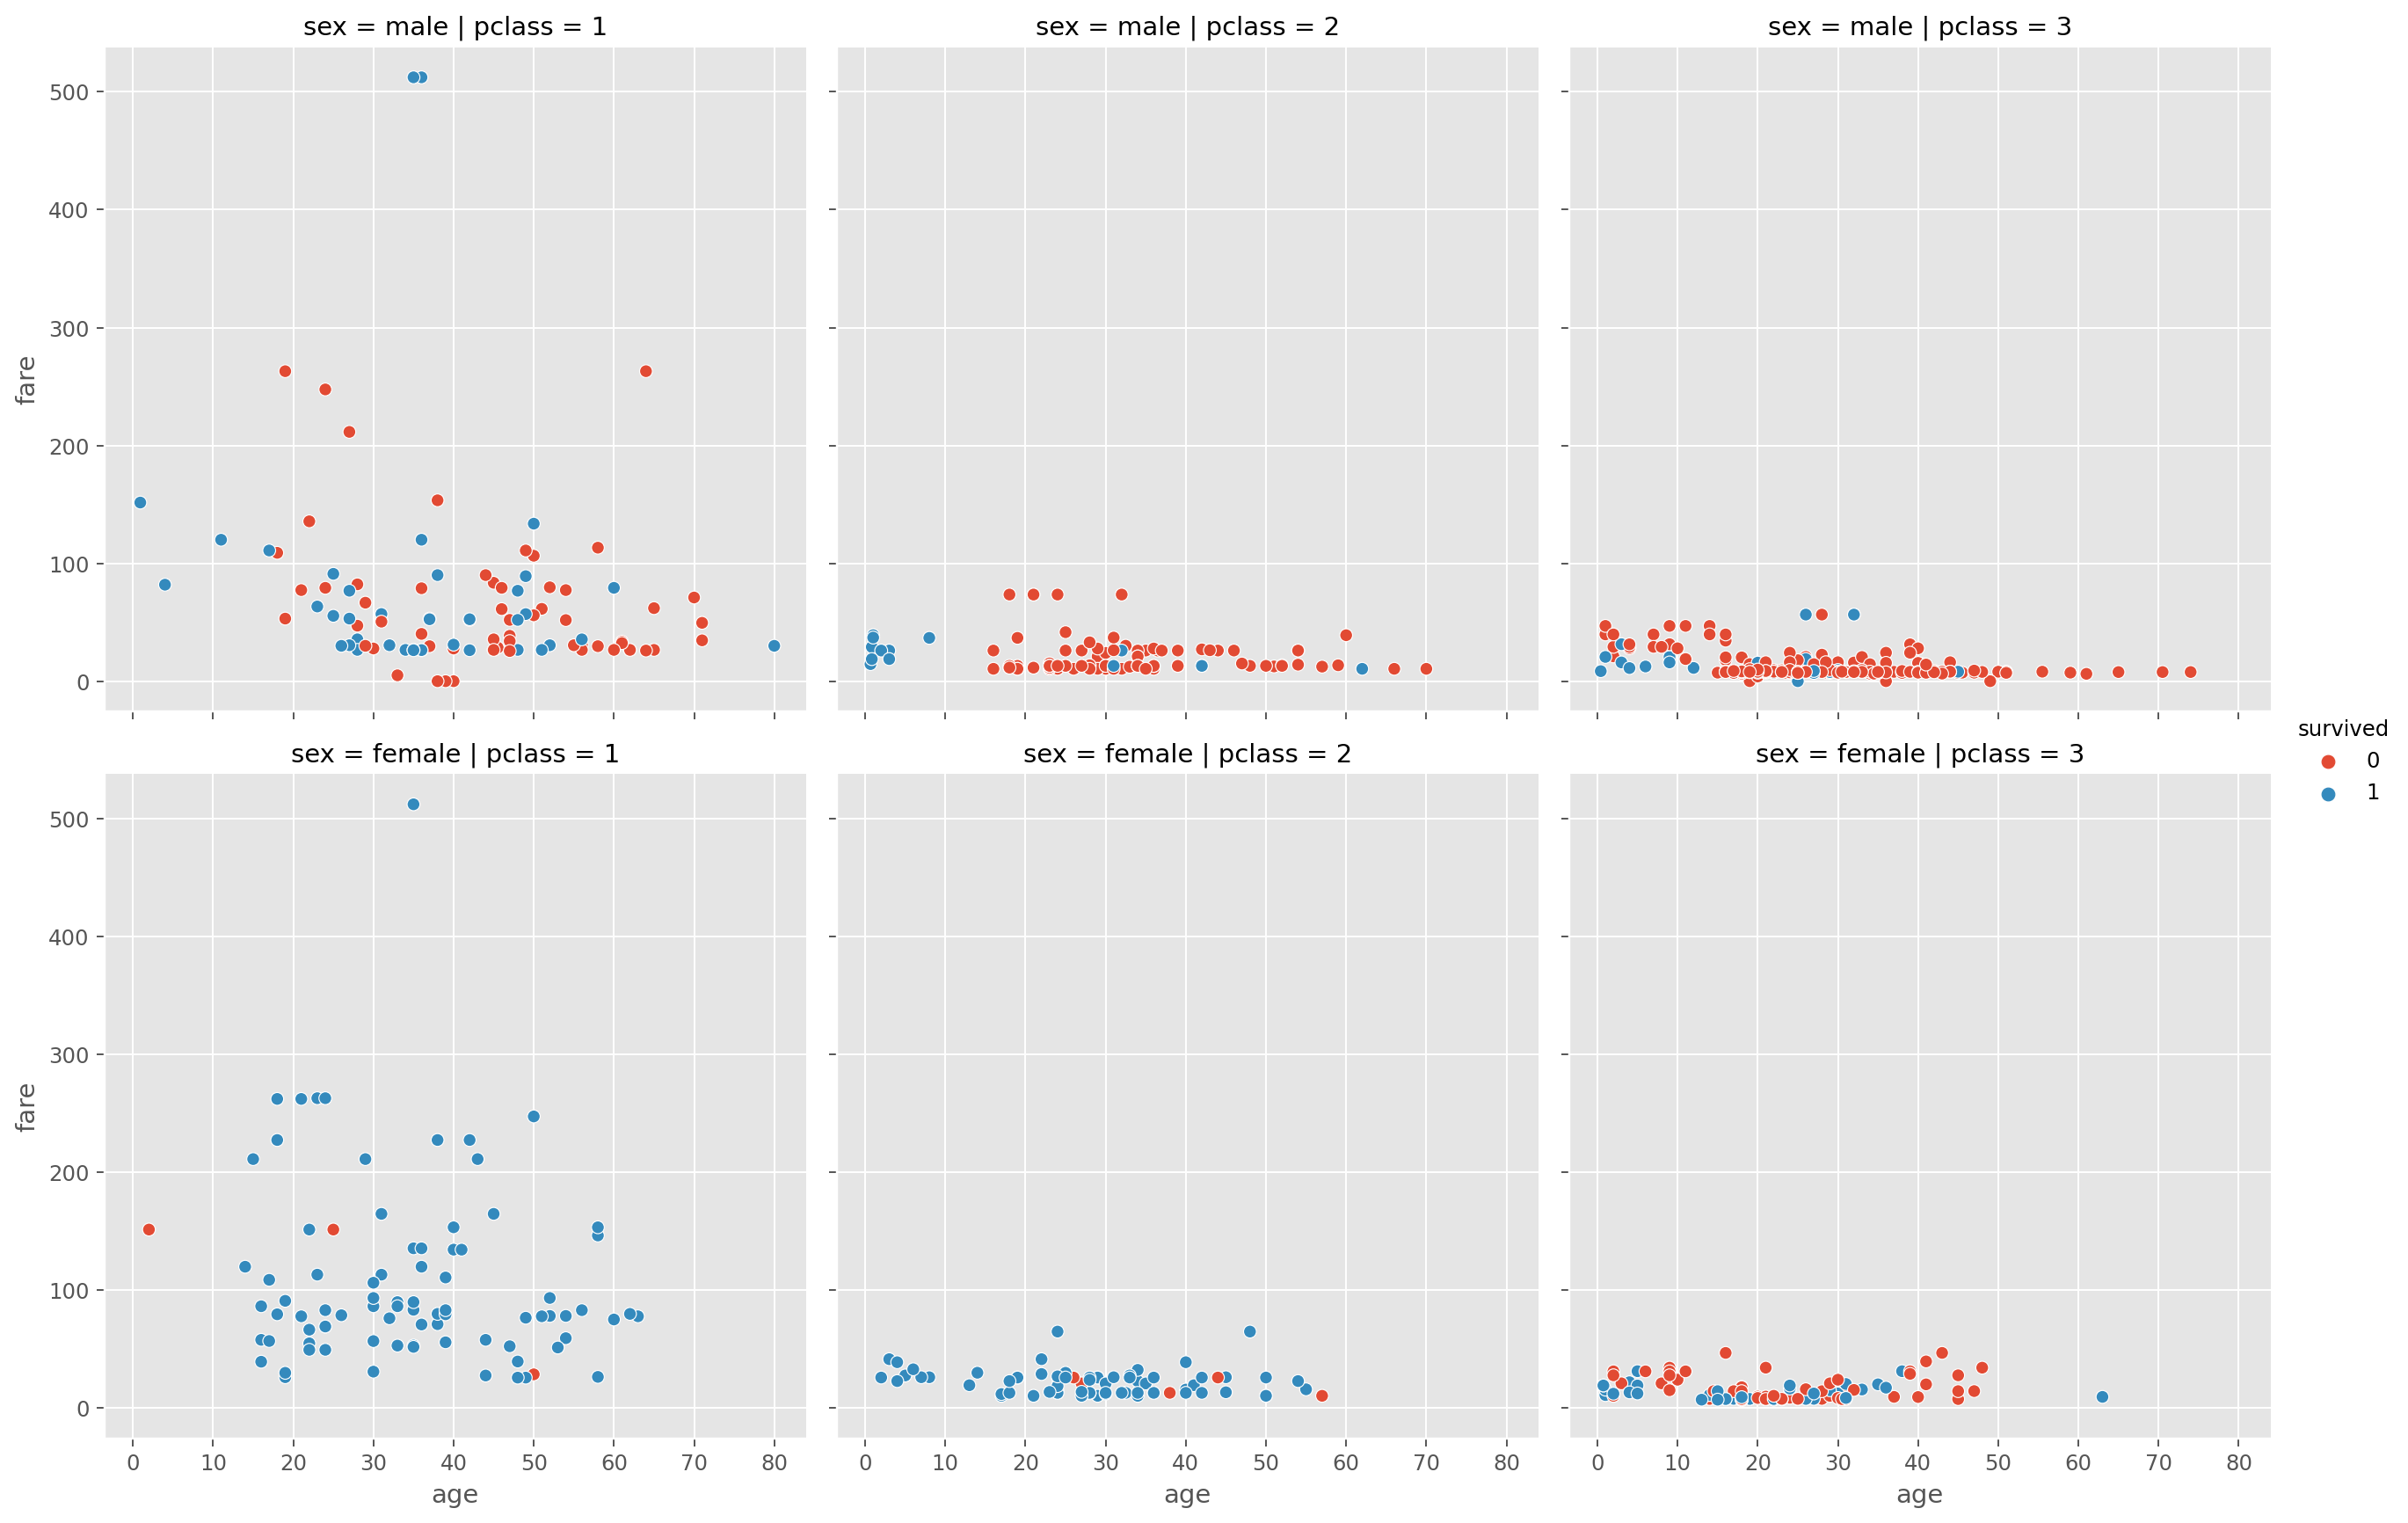

In [125]:
sns.relplot(x='age', y='fare', data= titanic, row= 'sex', hue= 'survived', col= 'pclass')

---
## Sibsp
___

<AxesSubplot:>

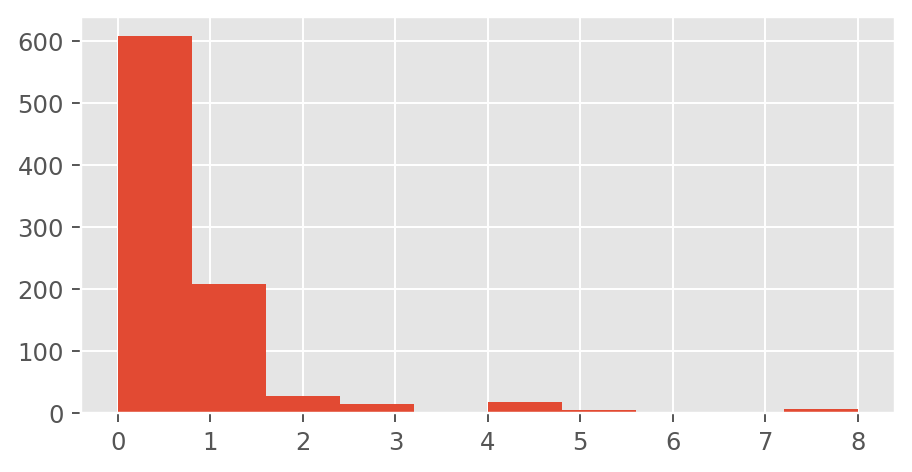

In [127]:
titanic['sibsp'].hist()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sibsp', ylabel='count'>

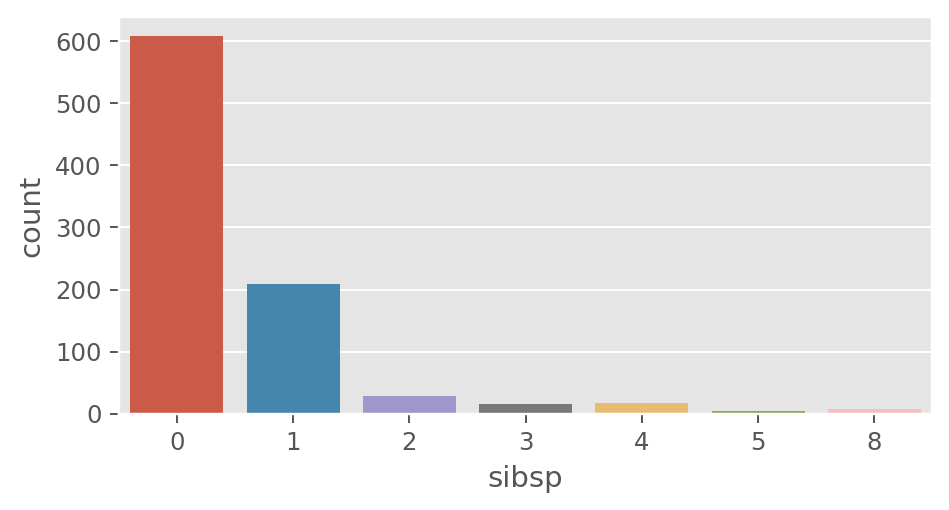

In [128]:
sns.countplot('sibsp', data= titanic)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

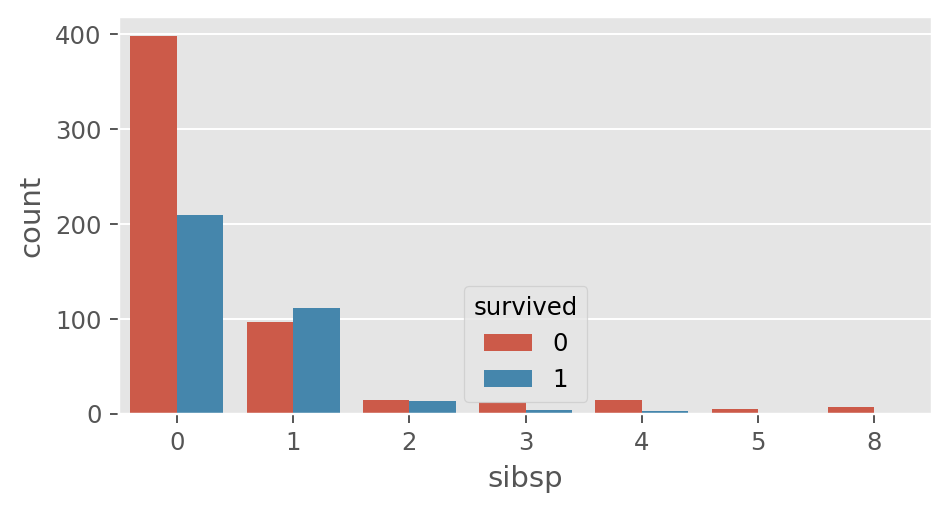

In [129]:
sns.countplot(x= 'sibsp', data= titanic, hue='survived')

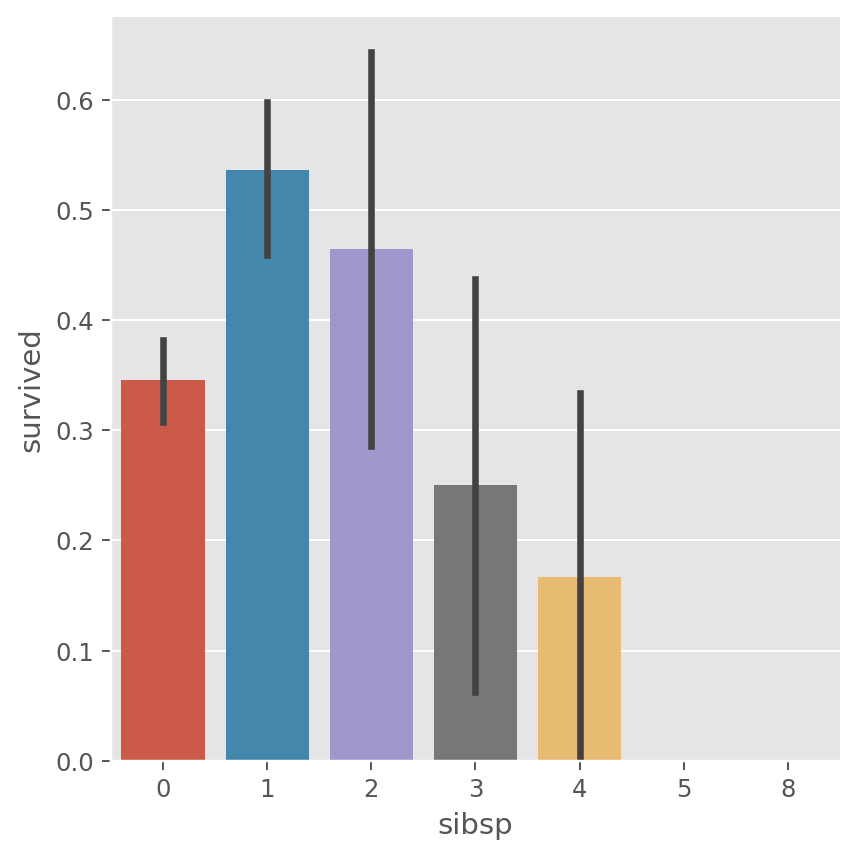

In [130]:
sns.catplot(x= 'sibsp', y= 'survived', kind= 'bar', data= titanic)

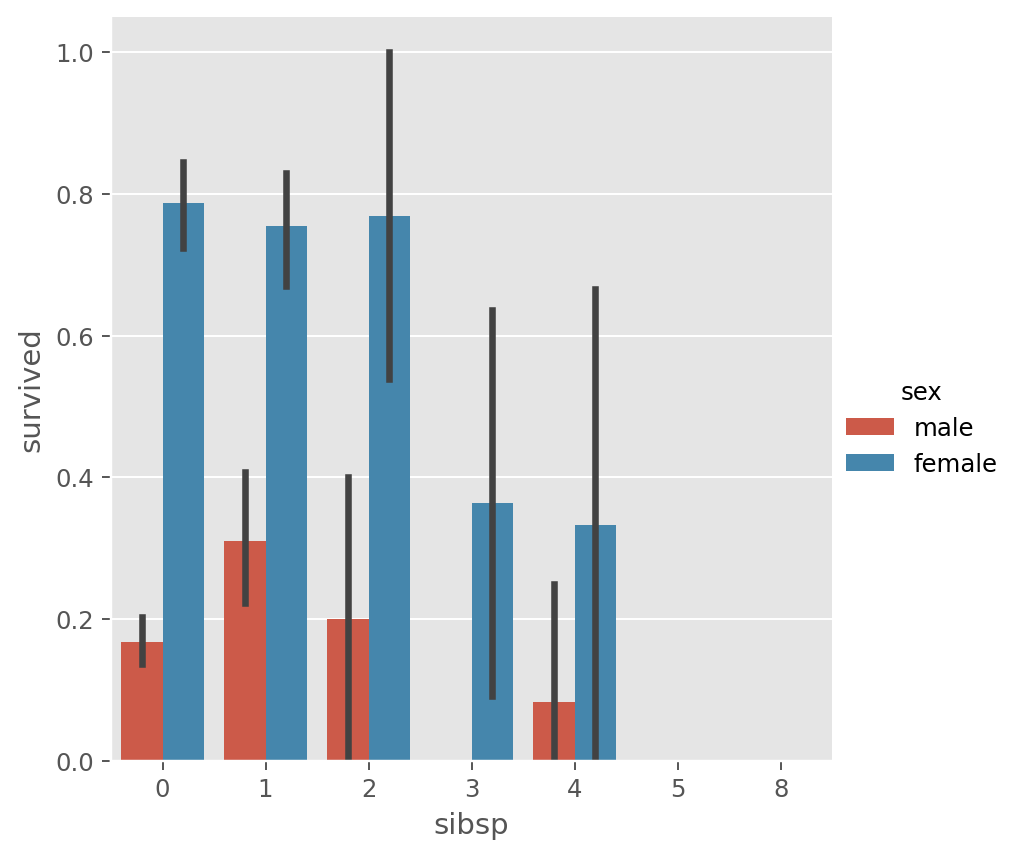

In [131]:
sns.catplot(x= 'sibsp', y= 'survived', kind= 'bar', data= titanic, hue= 'sex')

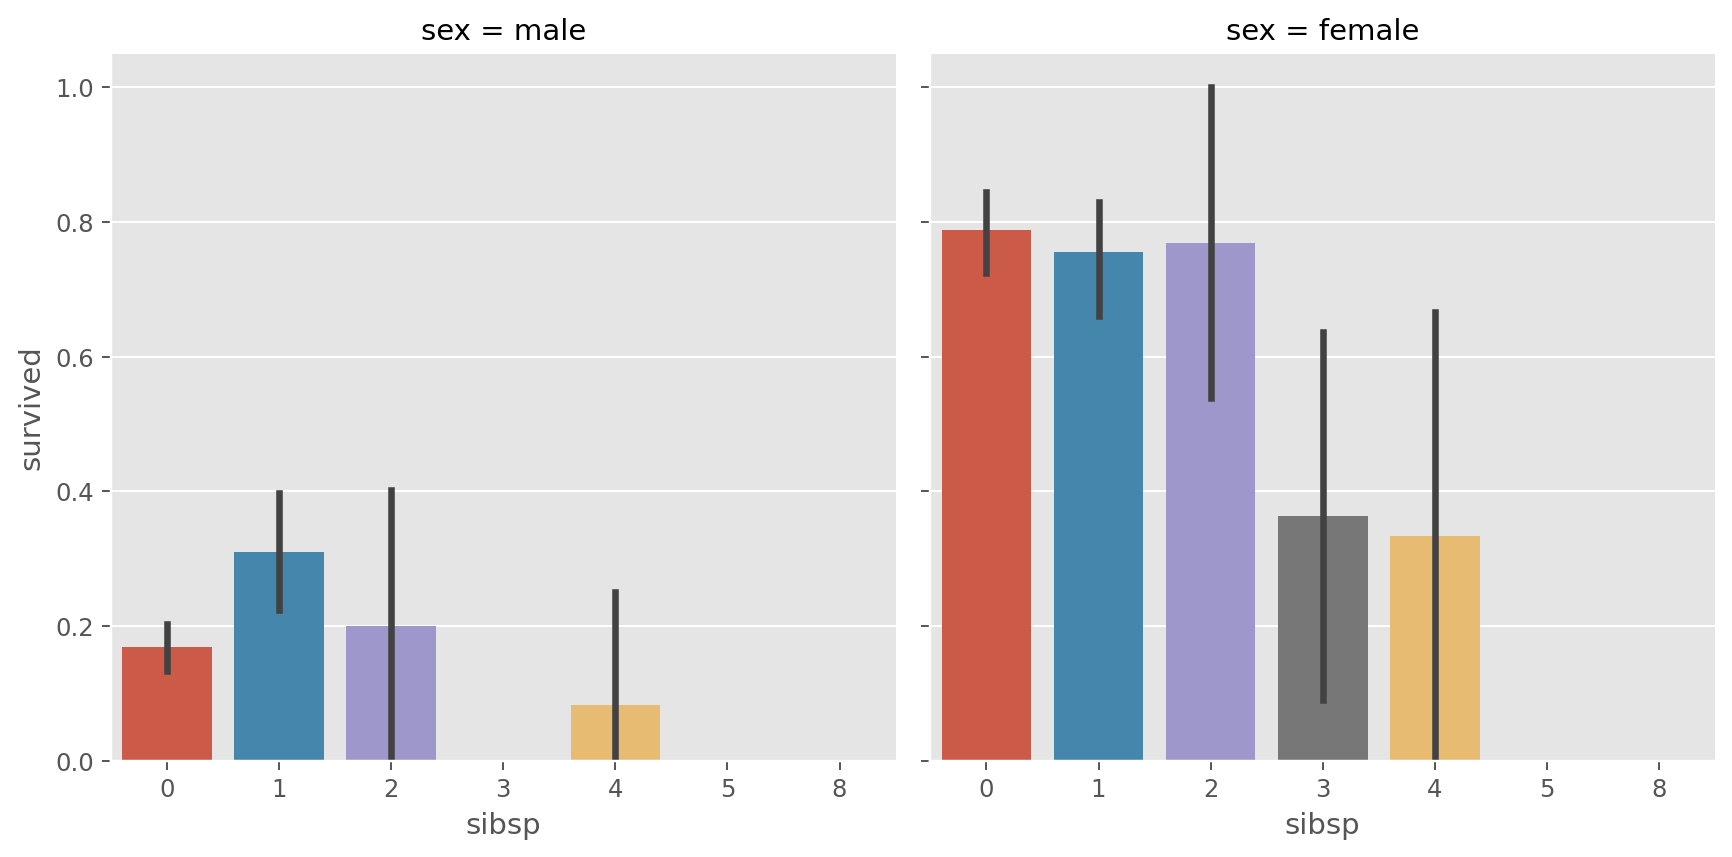

In [132]:
sns.catplot(x= 'sibsp', y= 'survived', kind= 'bar', data= titanic, col='sex')

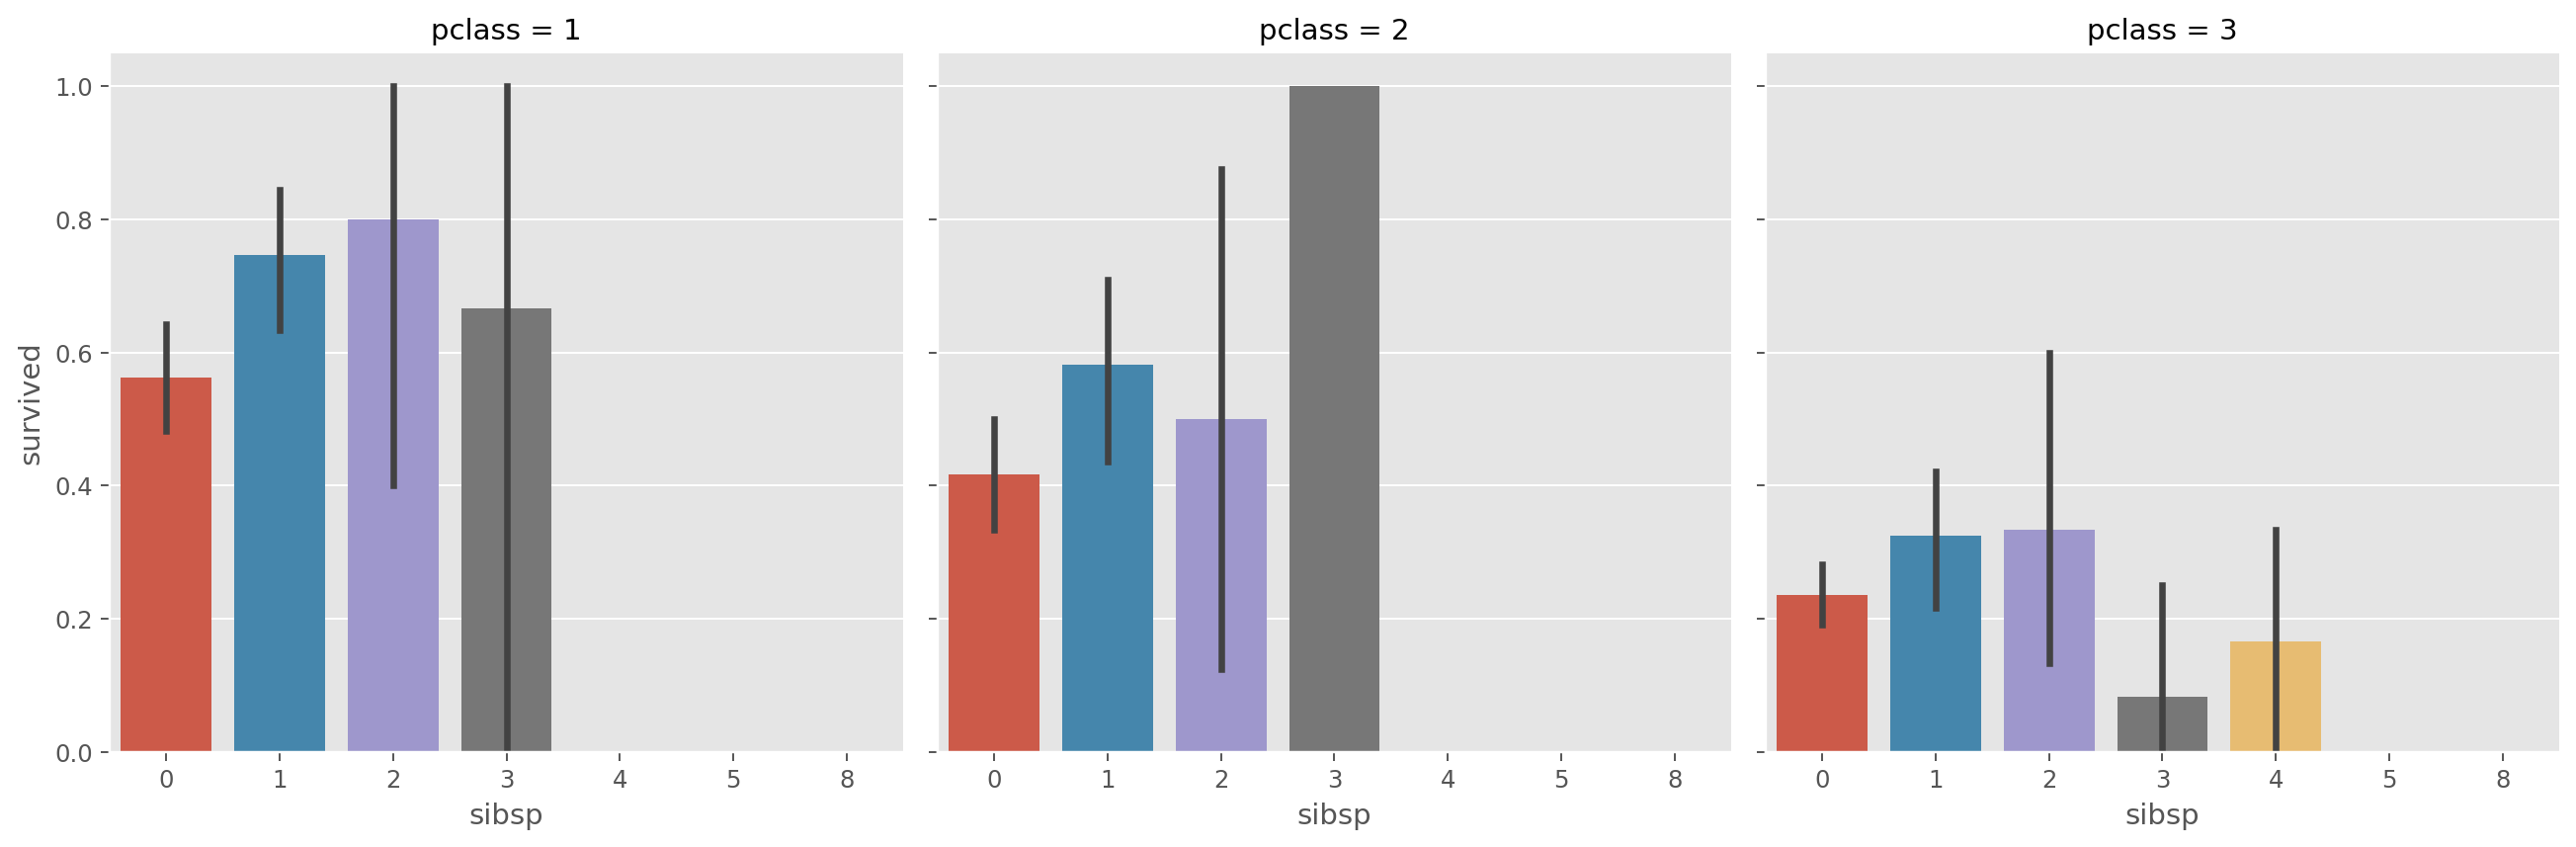

In [133]:
sns.catplot(x= 'sibsp', y= 'survived', kind= 'bar', data= titanic, col='pclass')

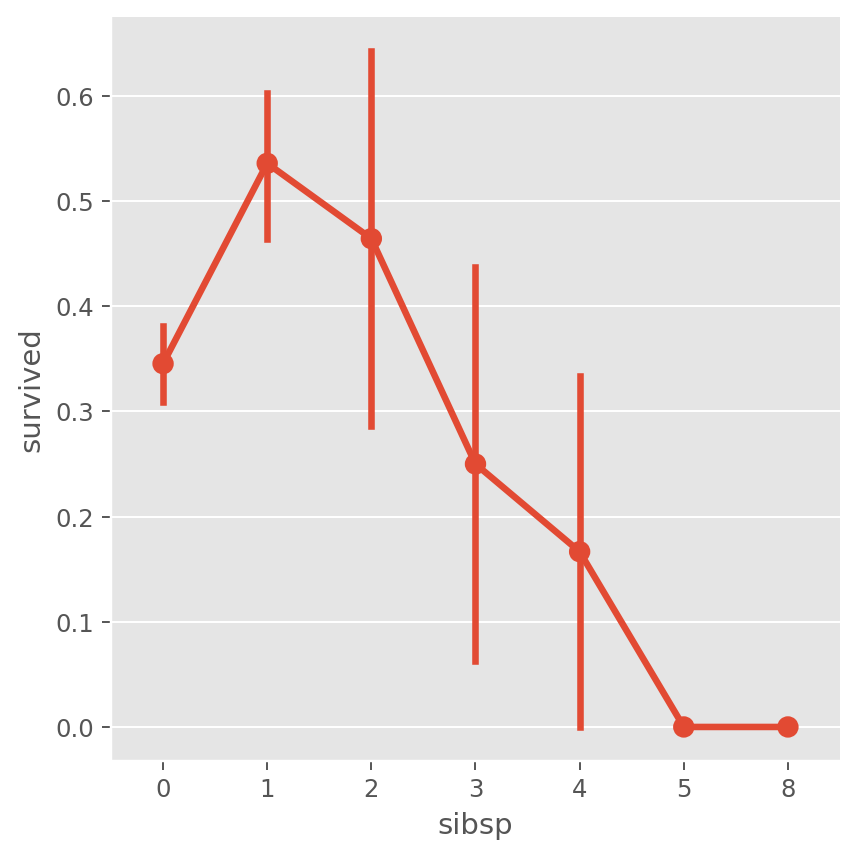

In [135]:
sns.catplot(x= 'sibsp', y= 'survived', kind= 'point', data= titanic)

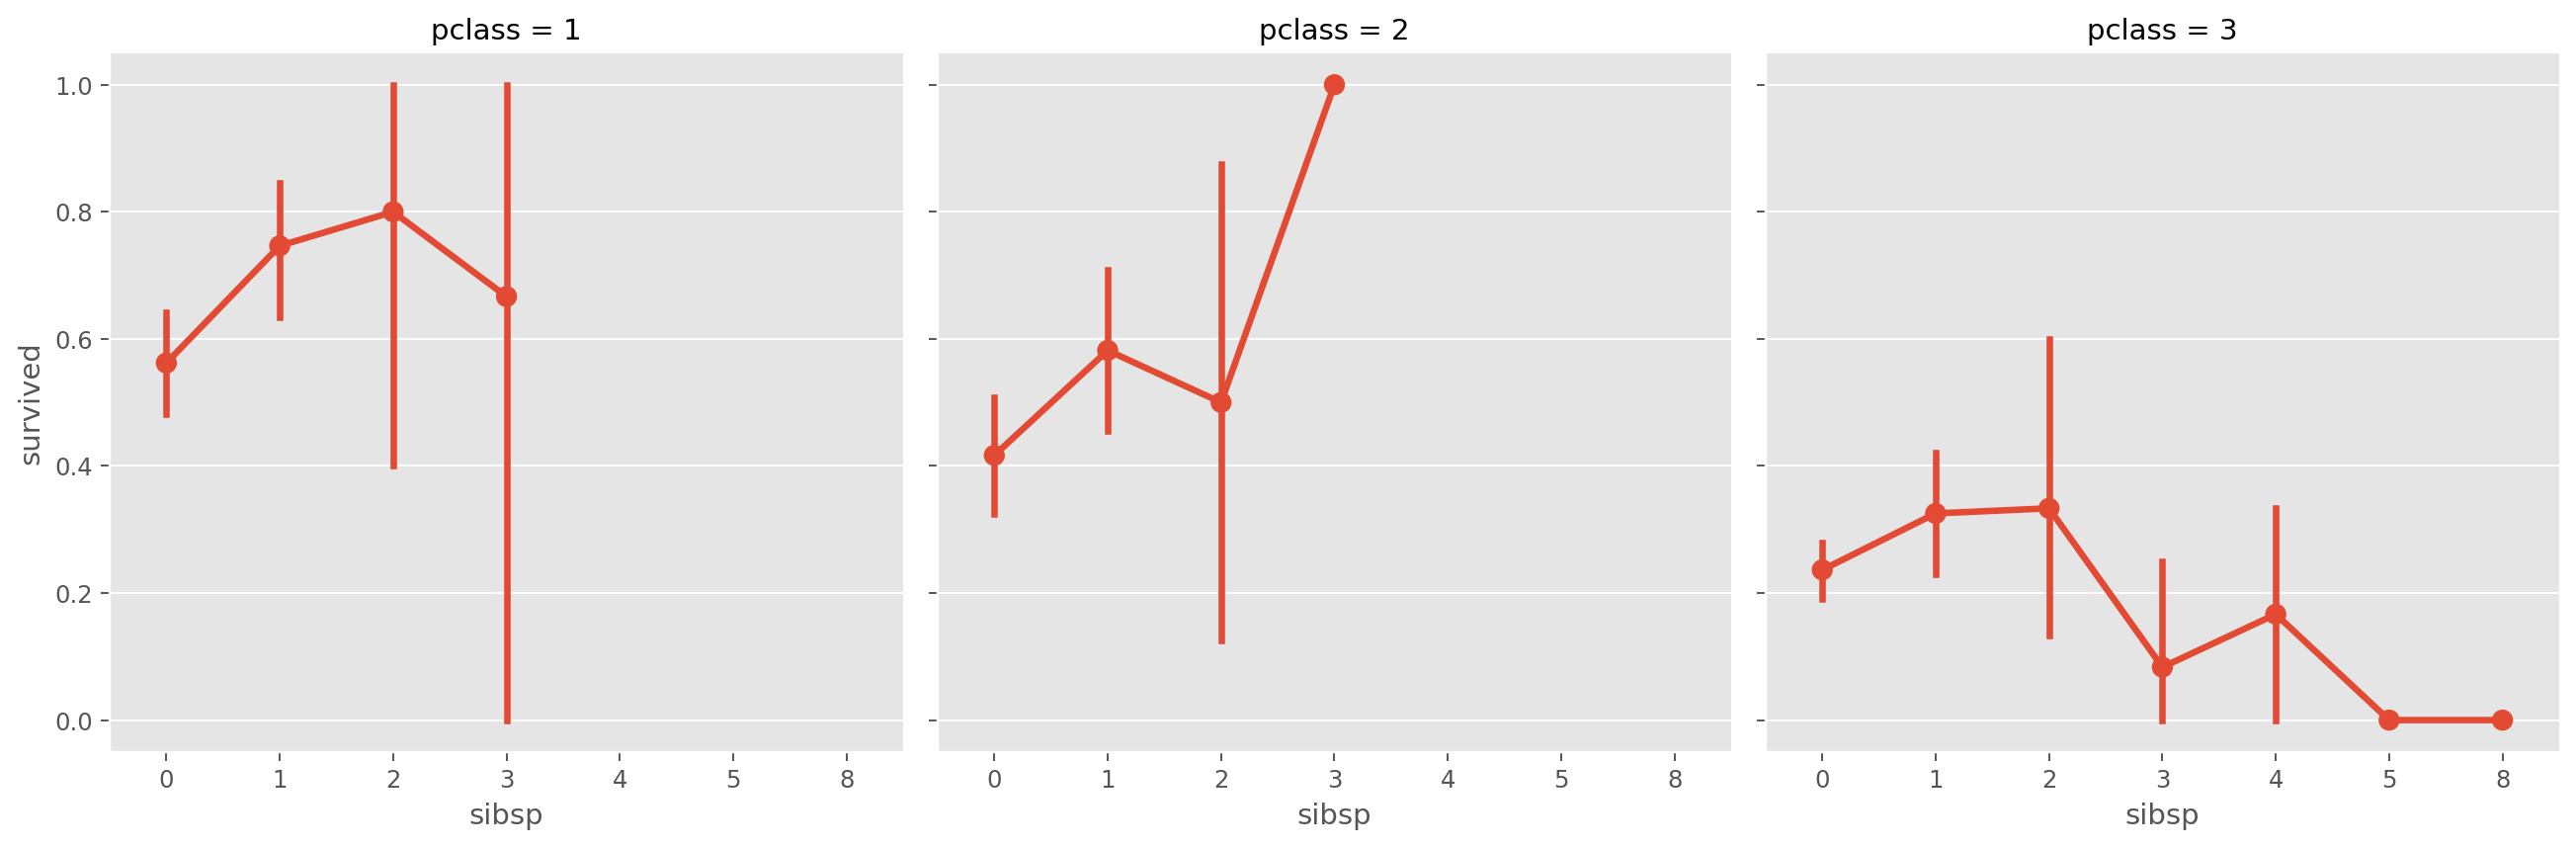

In [134]:
sns.catplot(x= 'sibsp', y= 'survived', kind= 'point', data= titanic, col='pclass')

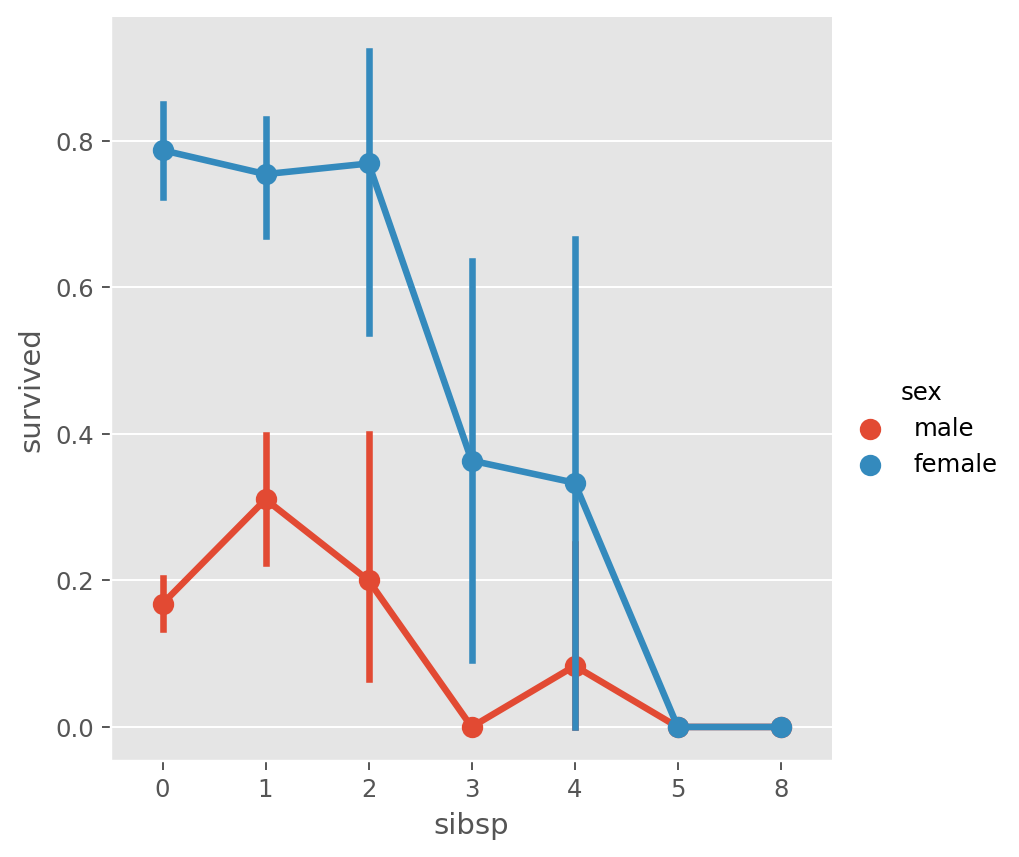

In [137]:
sns.catplot(x= 'sibsp', y= 'survived', kind= 'point', data= titanic, hue='sex')

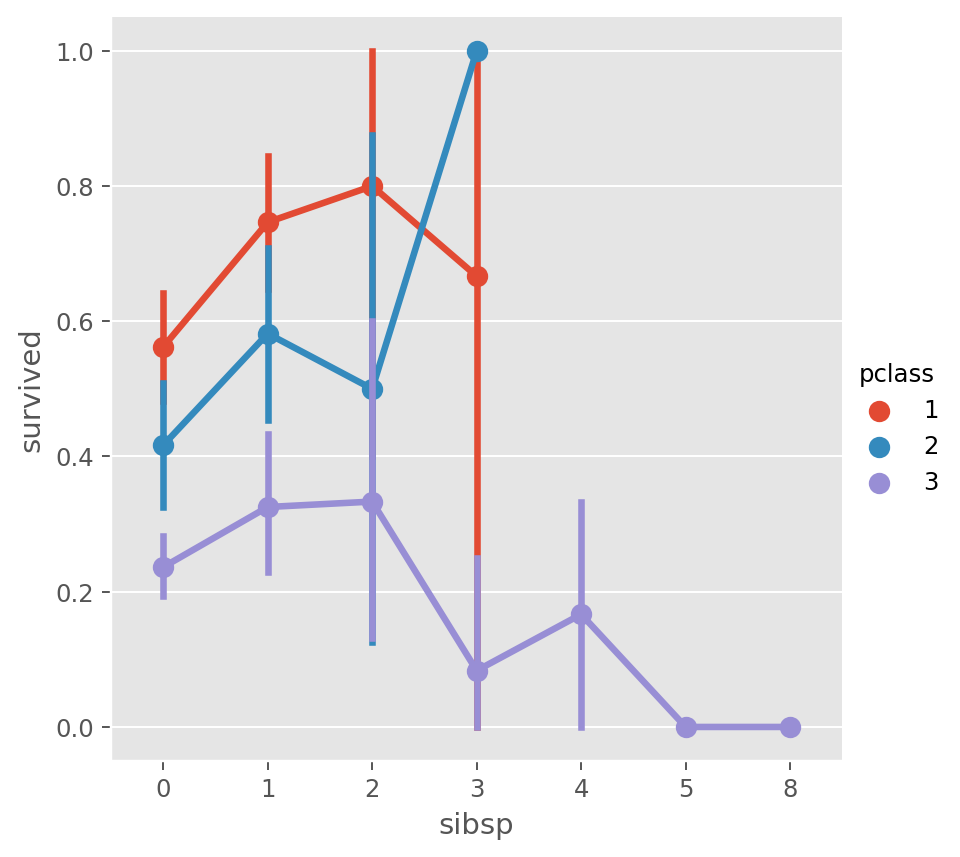

In [138]:
sns.catplot(x= 'sibsp', y= 'survived', kind= 'point', data= titanic, hue='pclass')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.1% of the points 

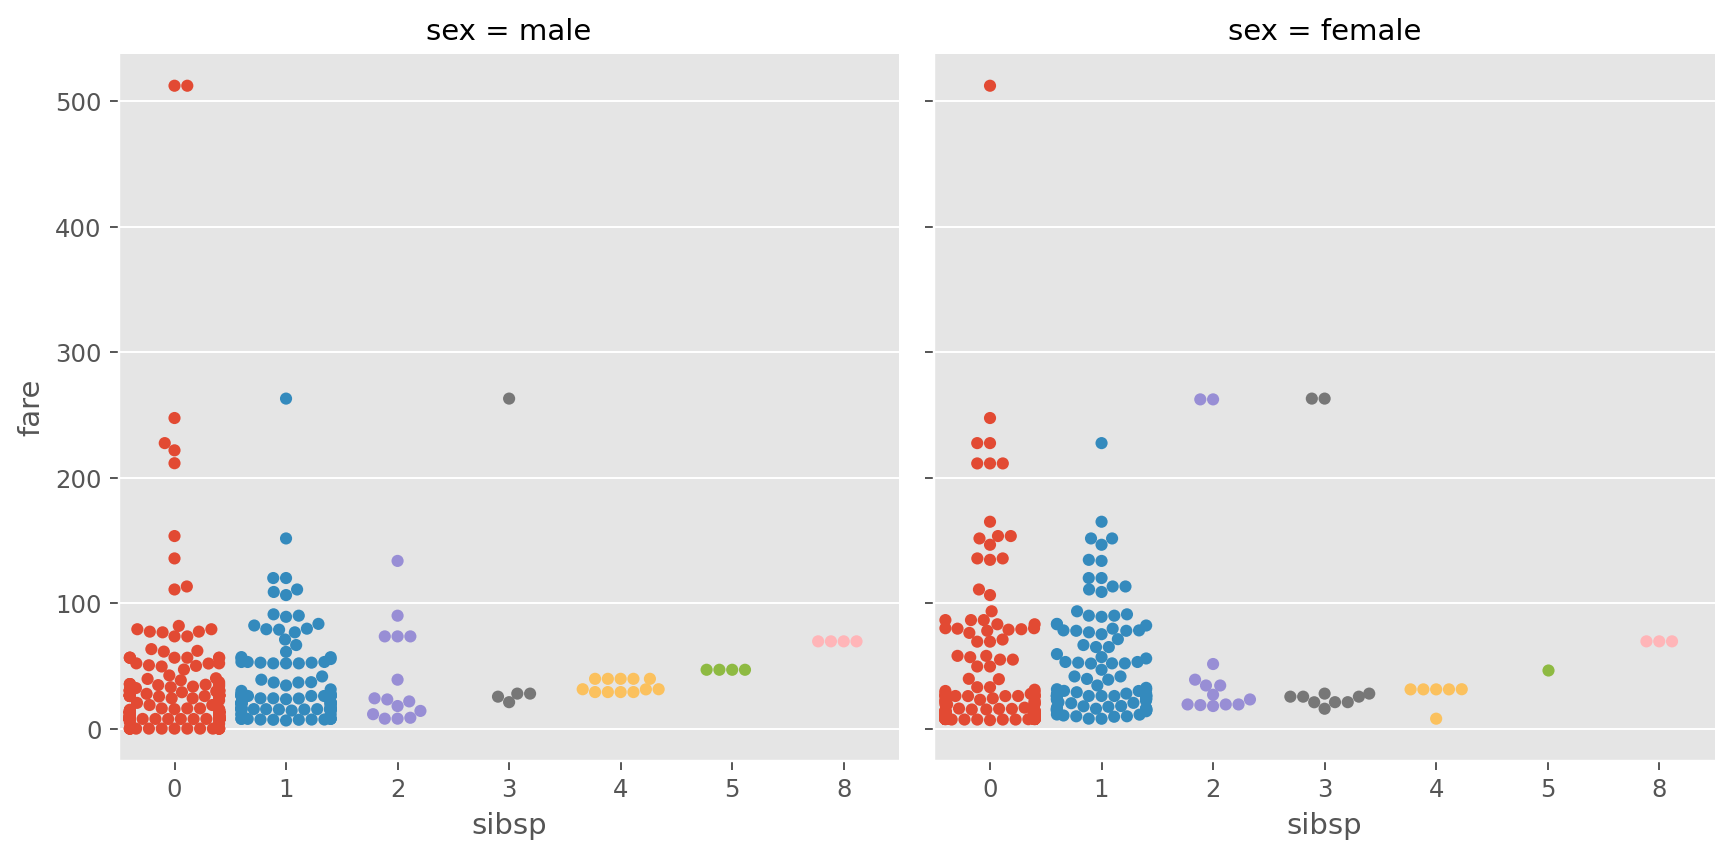

In [140]:
sns.catplot(x= 'sibsp', y= 'fare', kind= 'swarm', data= titanic,col='sex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.9% of the points

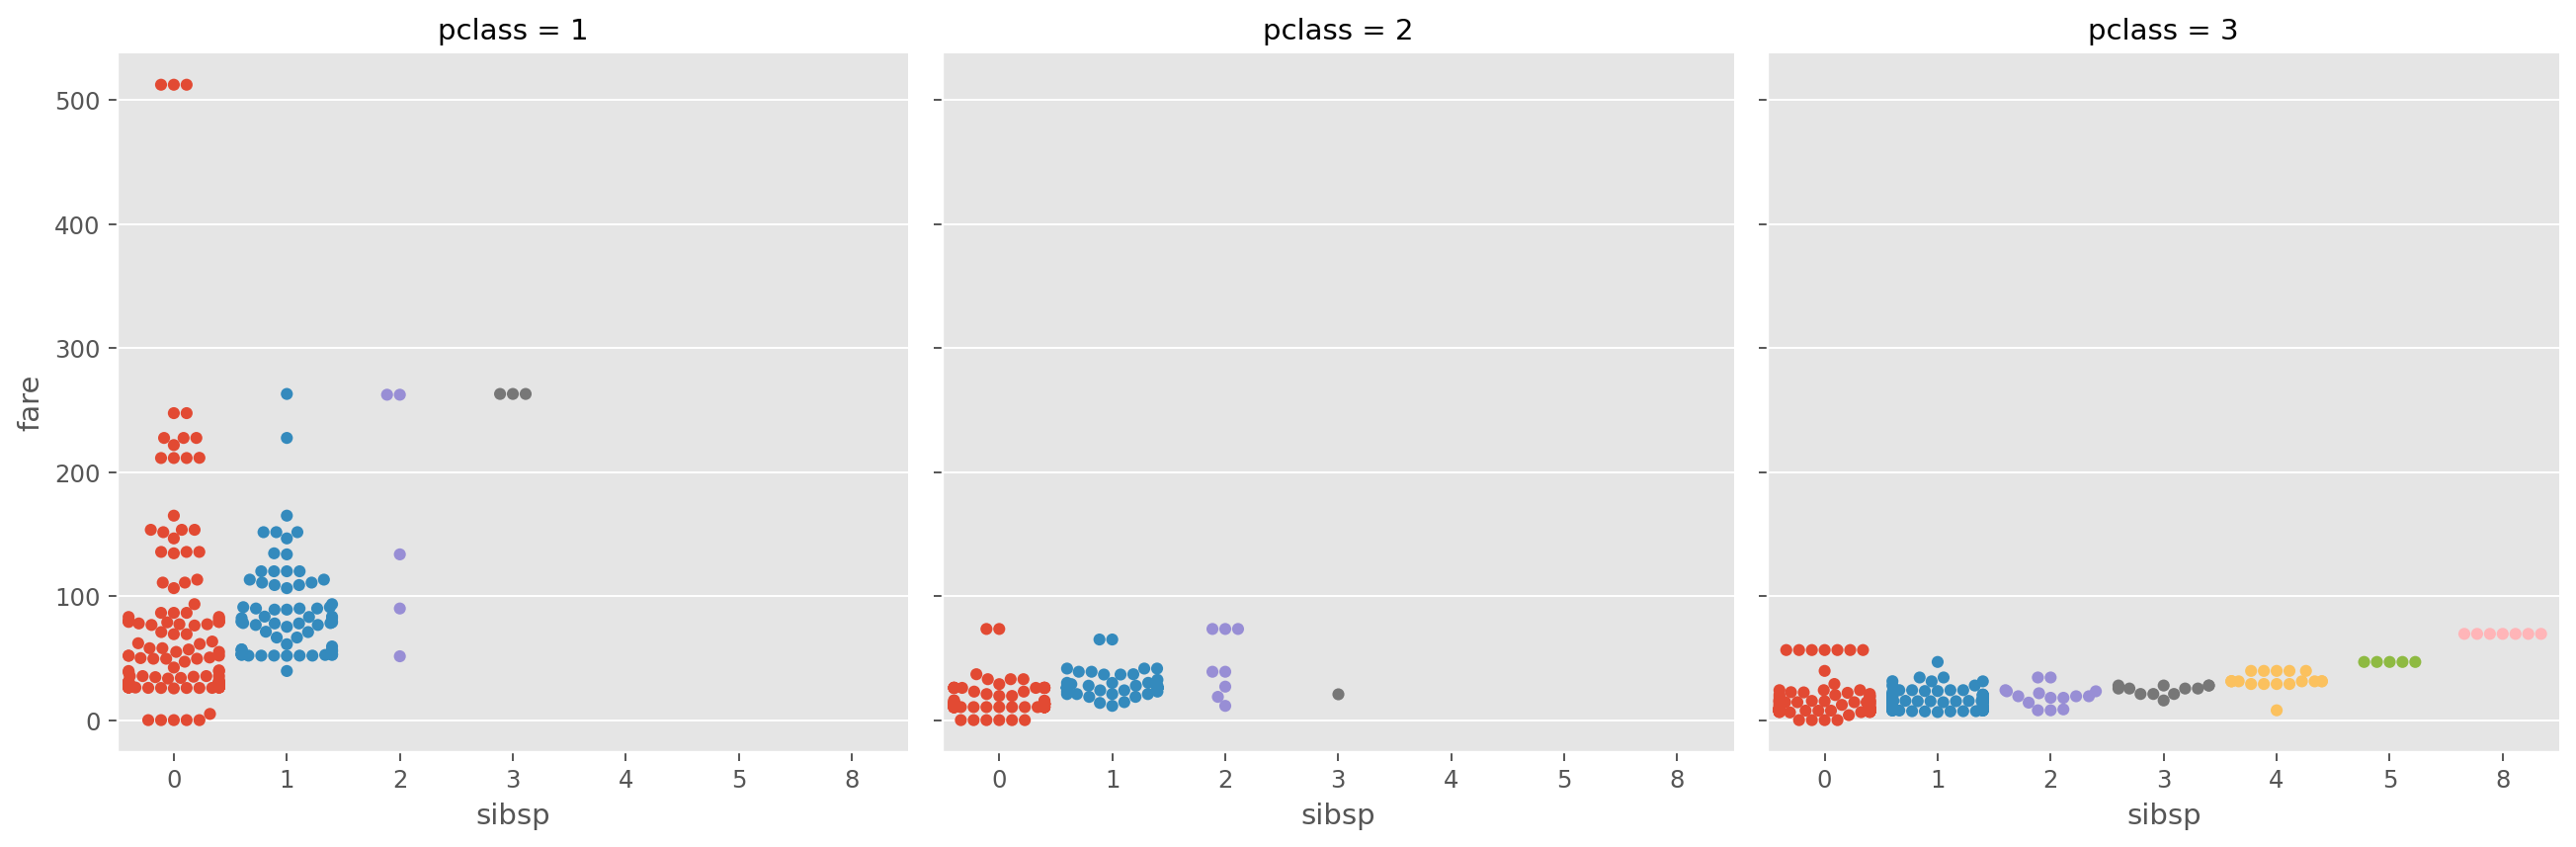

In [141]:
sns.catplot(x= 'sibsp', y= 'fare', kind= 'swarm', data= titanic, col='pclass')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.6% of the points

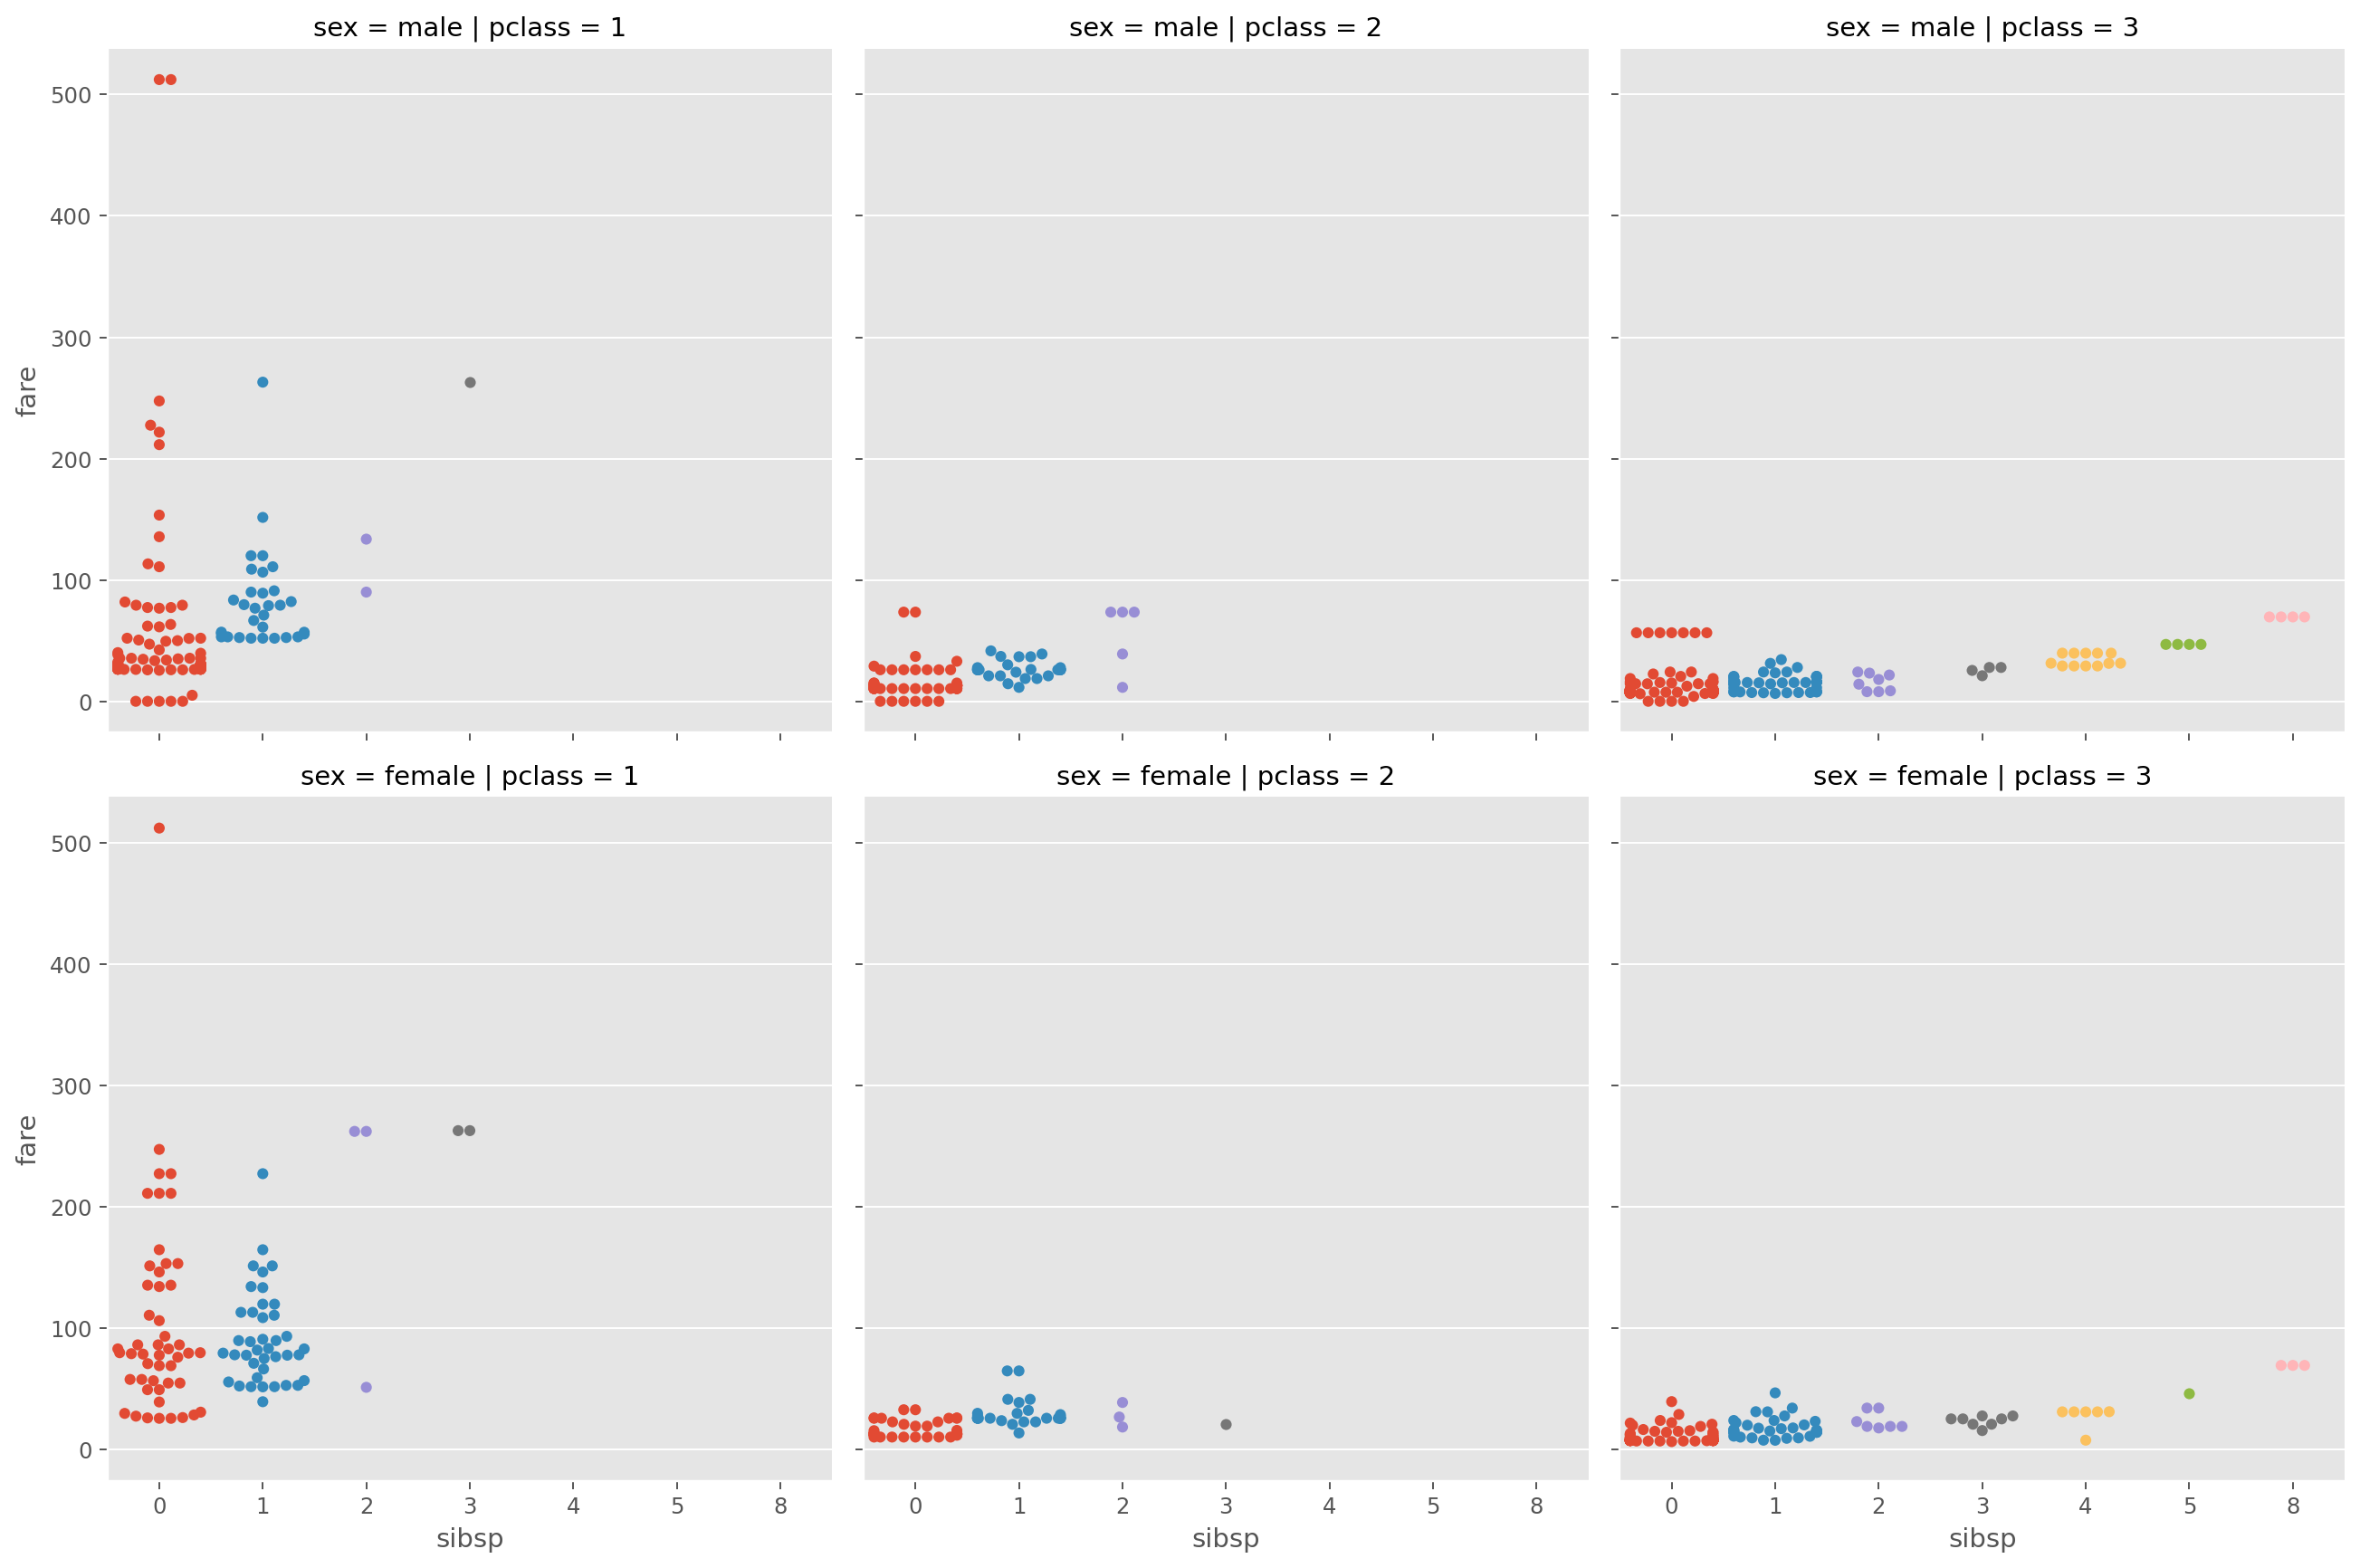

In [142]:
sns.catplot(x= 'sibsp', y= 'fare', kind= 'swarm', data= titanic, row='sex', col= 'pclass')

<AxesSubplot:xlabel='parch', ylabel='count'>

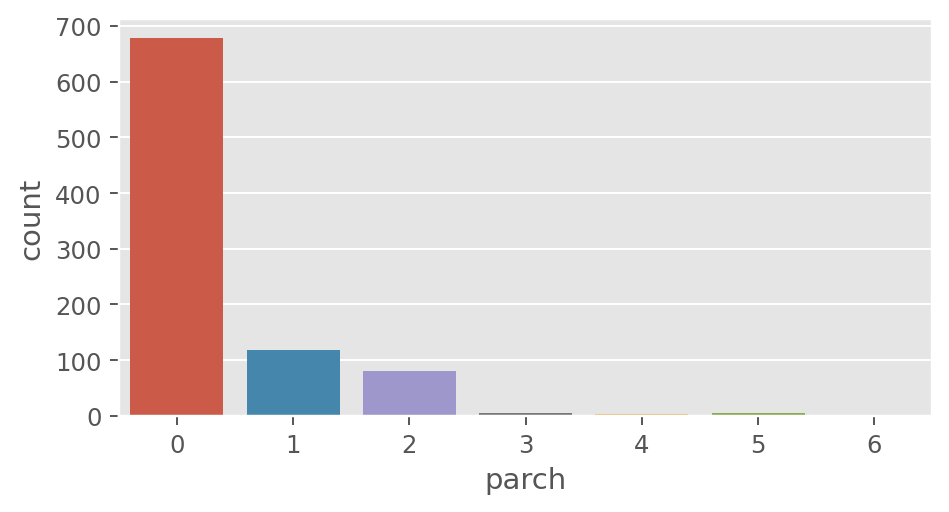

In [143]:
sns.countplot(x= 'parch', data= titanic)

<AxesSubplot:xlabel='parch', ylabel='count'>

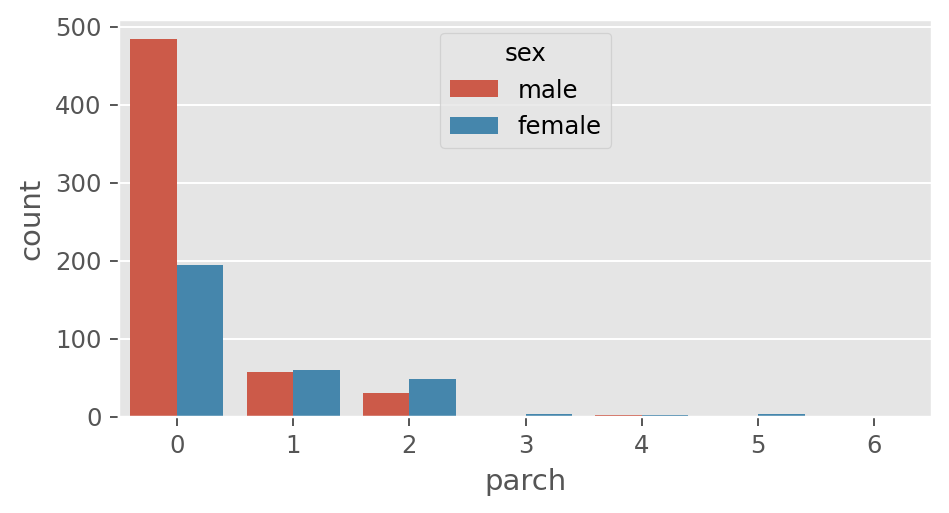

In [144]:
sns.countplot(x= 'parch', data= titanic, hue='sex')

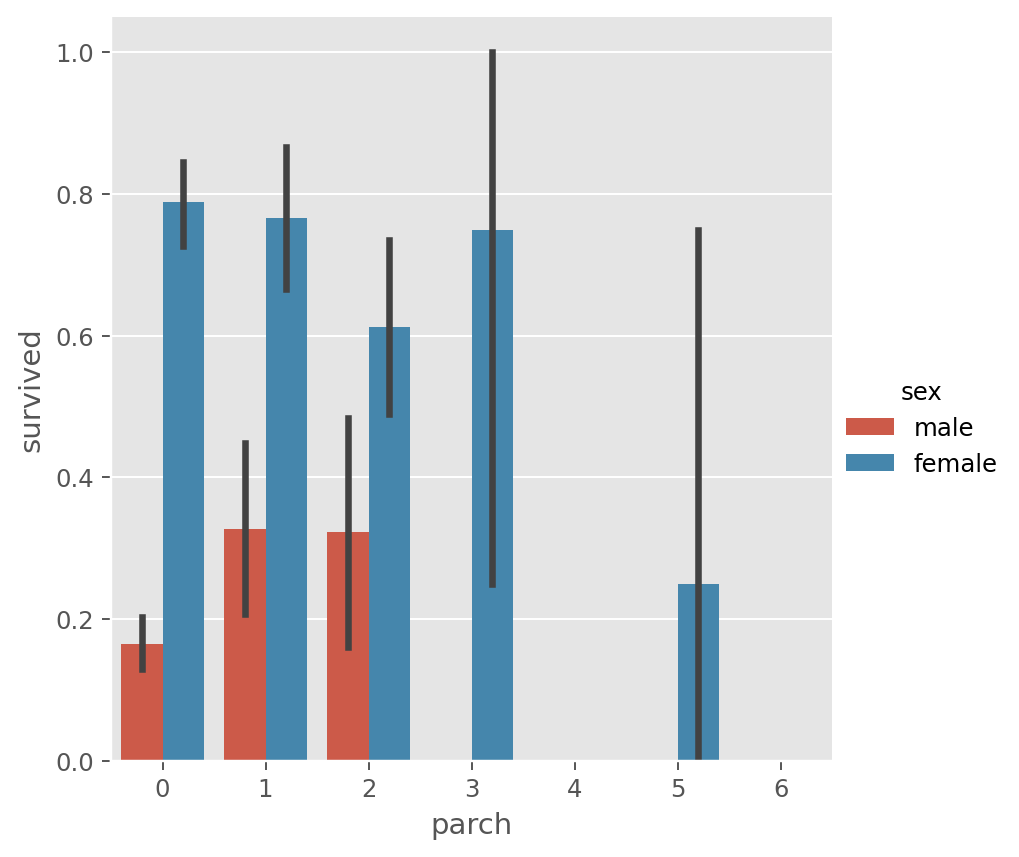

In [146]:
sns.catplot(x= 'parch', y='survived', data= titanic, kind='bar', hue='sex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


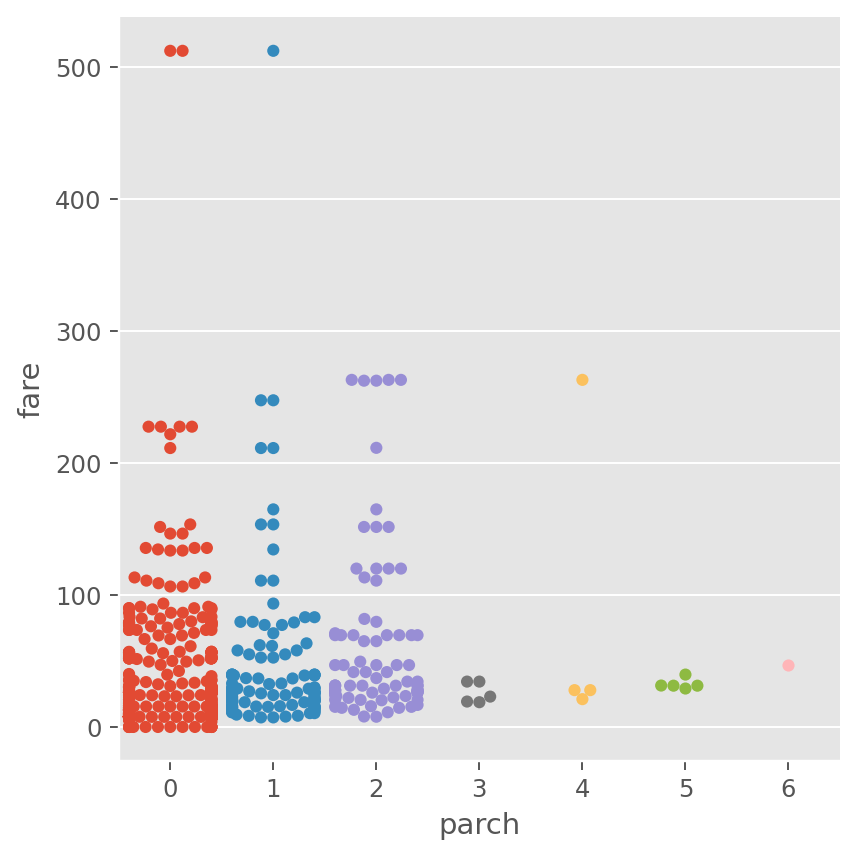

In [147]:
sns.catplot(x= 'parch', y= 'fare', data= titanic, kind='swarm')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 36.7% of the points 

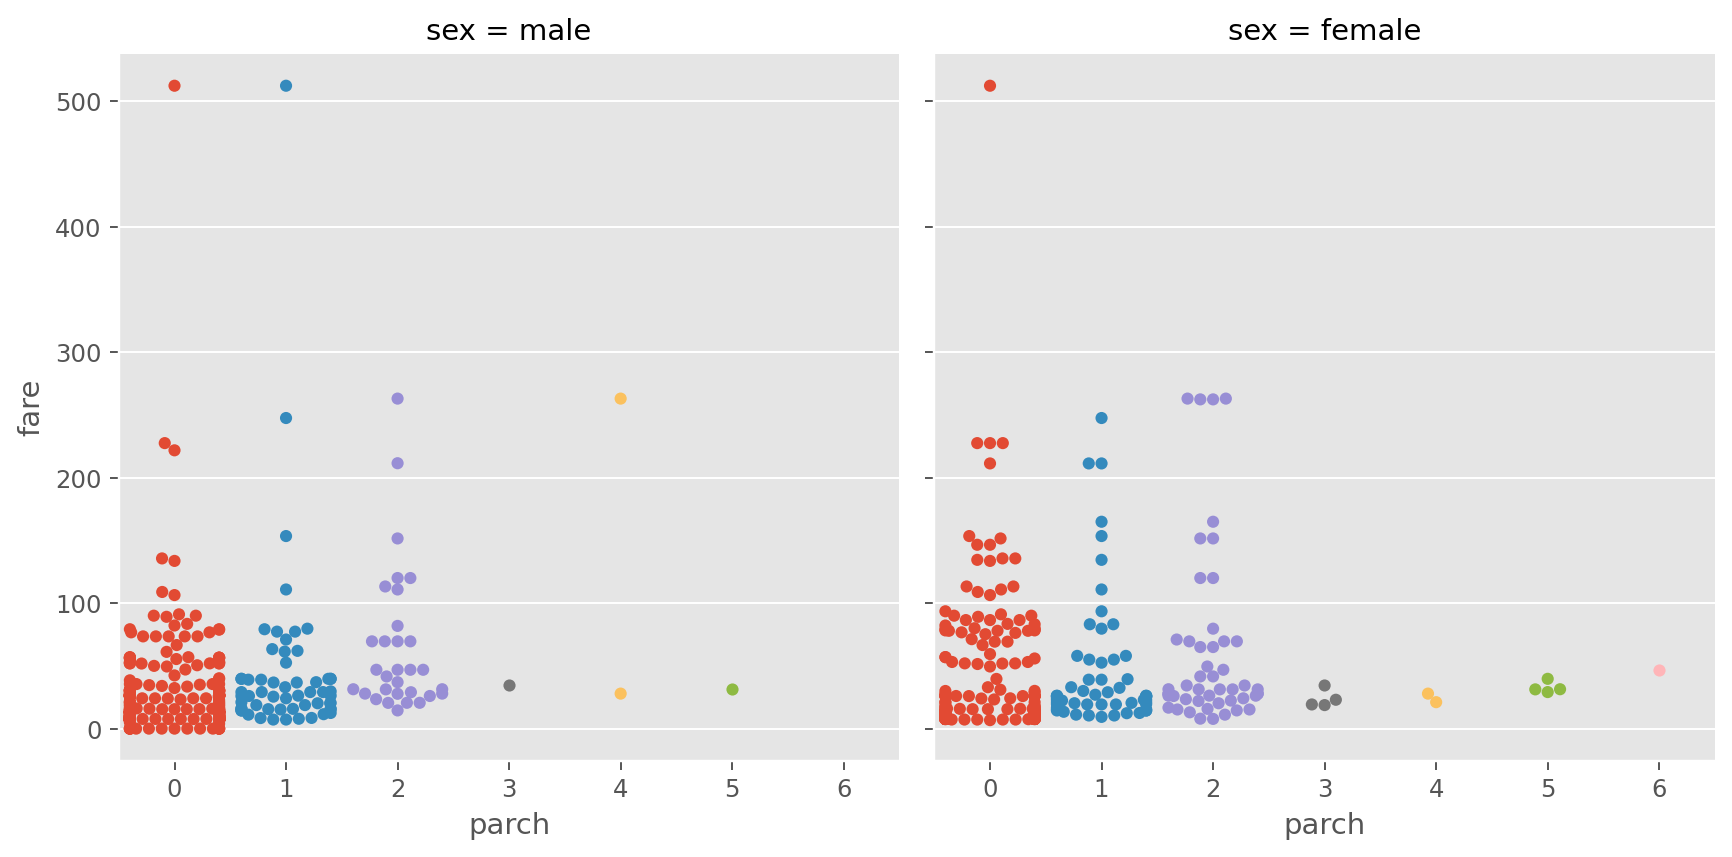

In [148]:
sns.catplot(x= 'parch', y= 'fare', data= titanic, kind='swarm', col='sex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 55.6% of the points

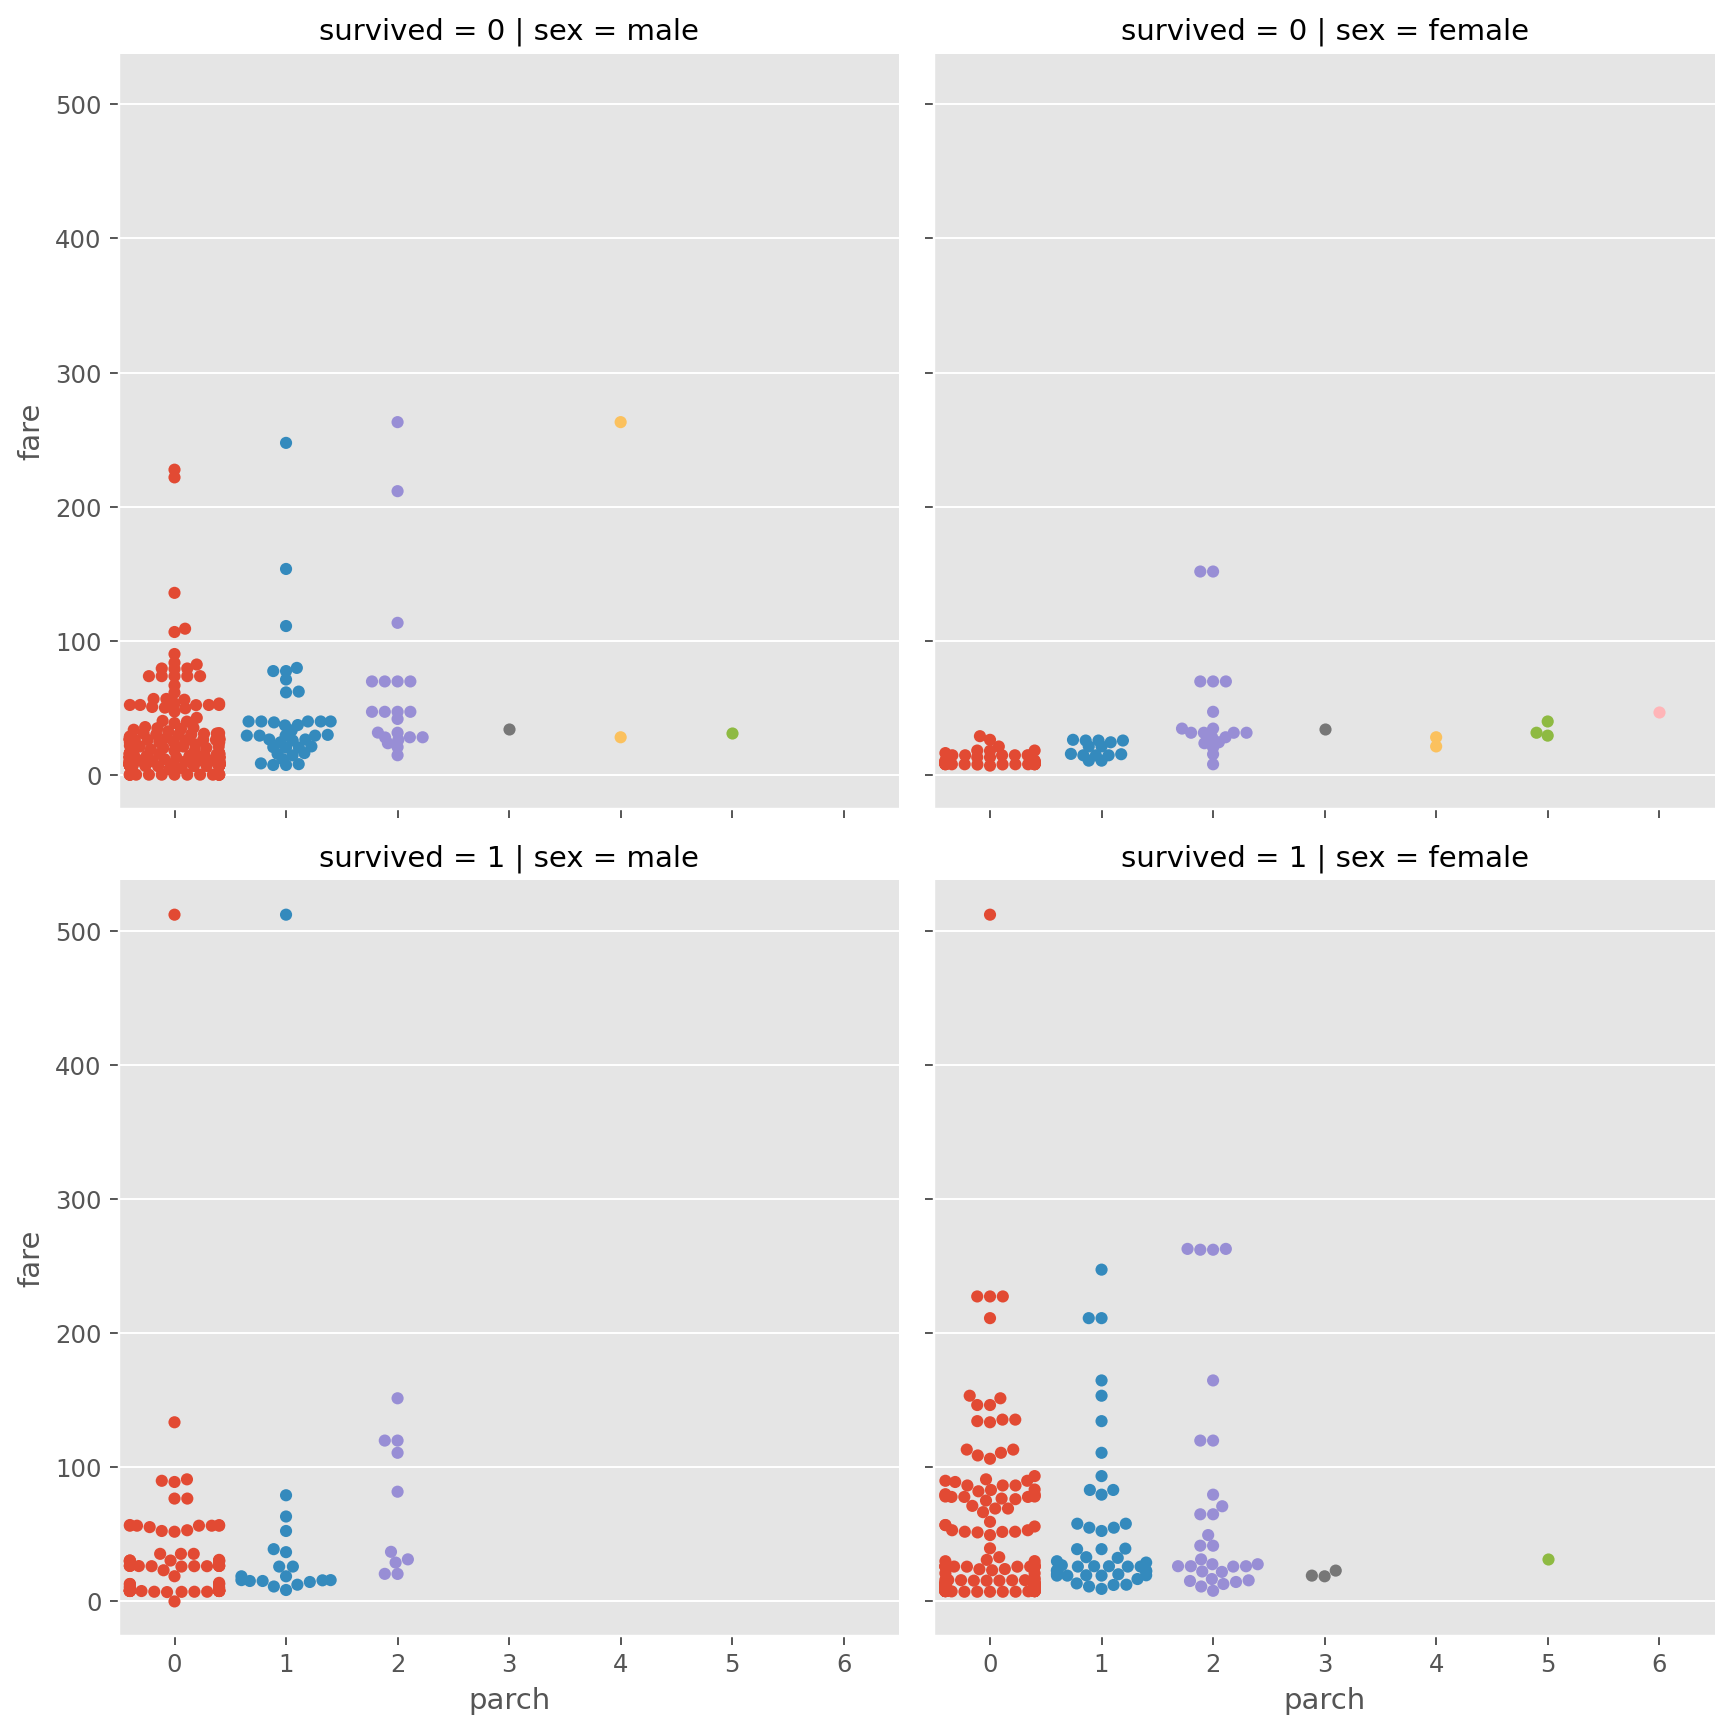

In [149]:
sns.catplot(x= 'parch', y= 'fare', data= titanic, kind='swarm', col='sex', row='survived')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.1% of the points 

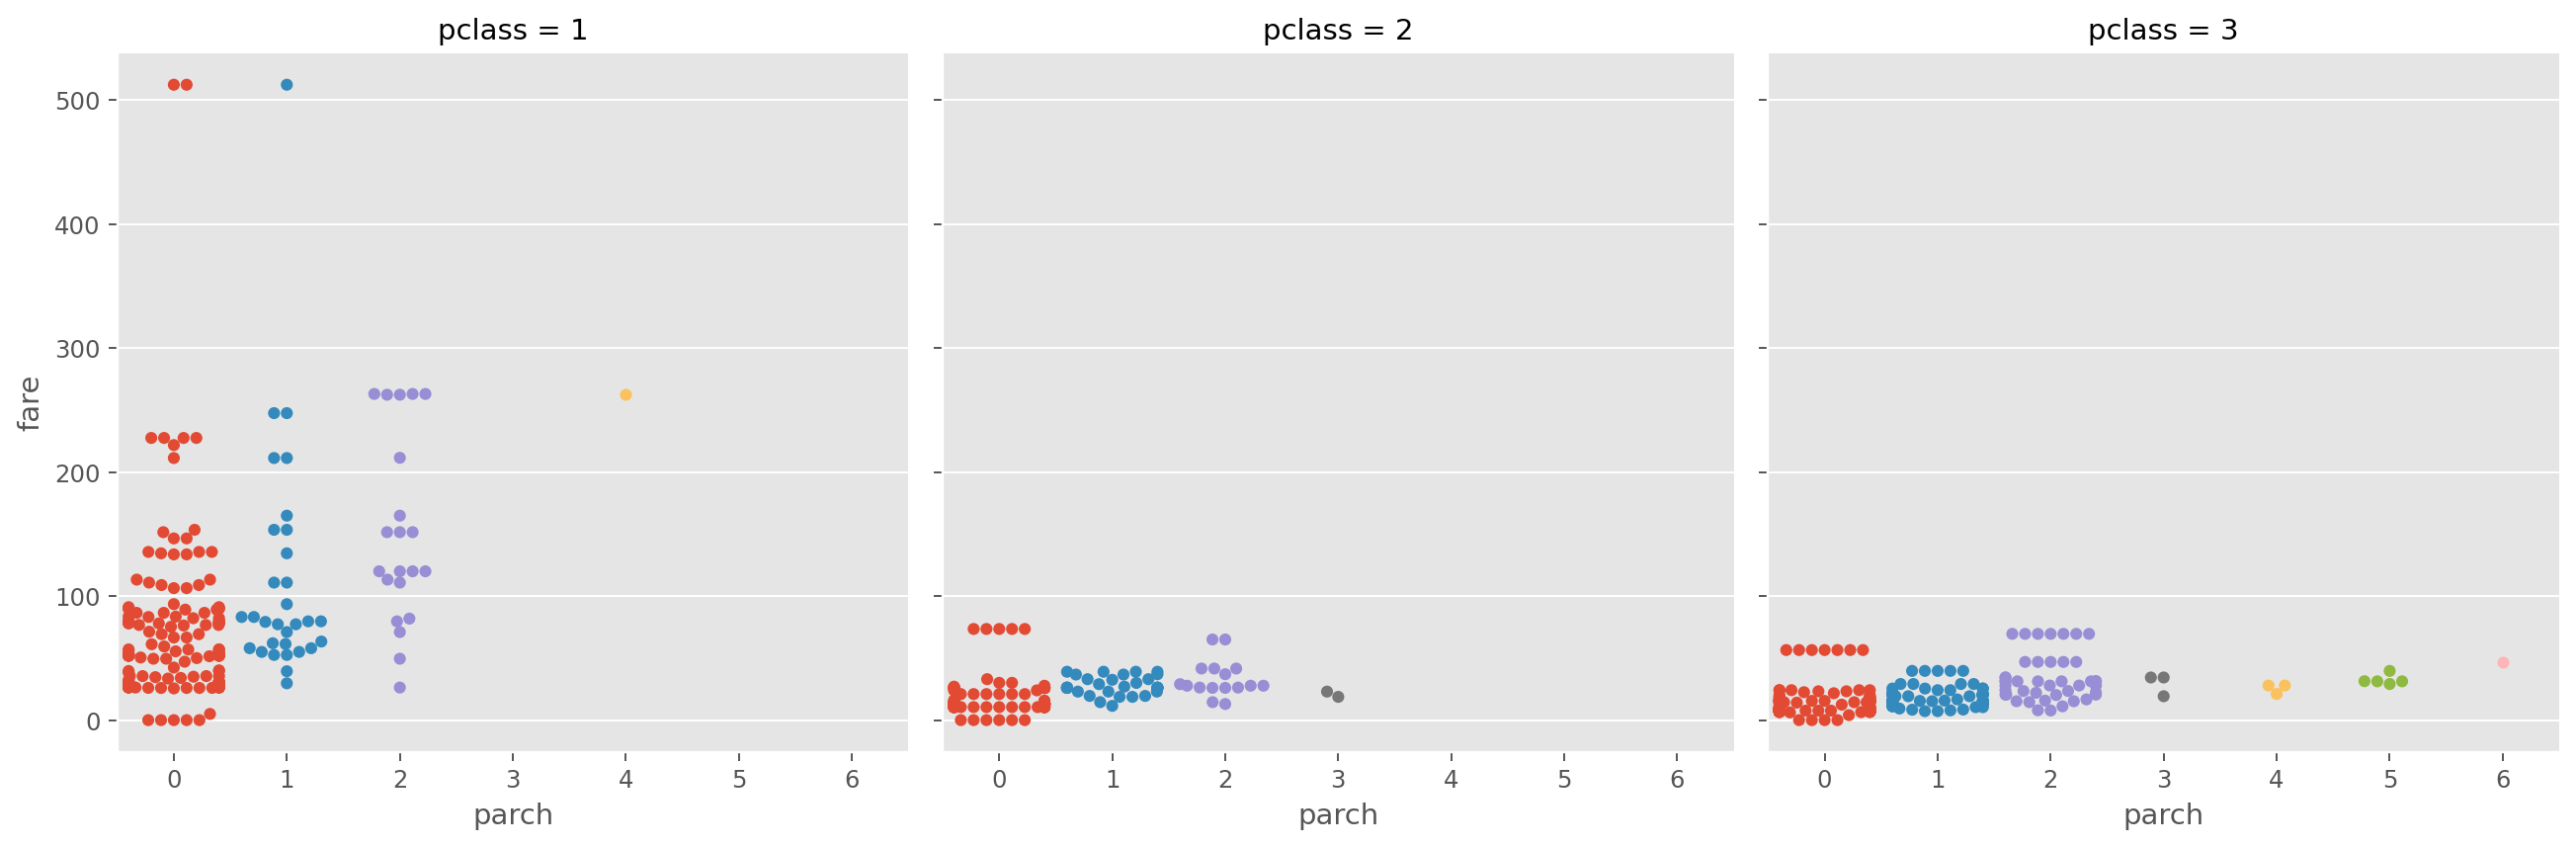

In [150]:
sns.catplot(x= 'parch', y= 'fare', data= titanic, kind='swarm', col='pclass')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 89.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points

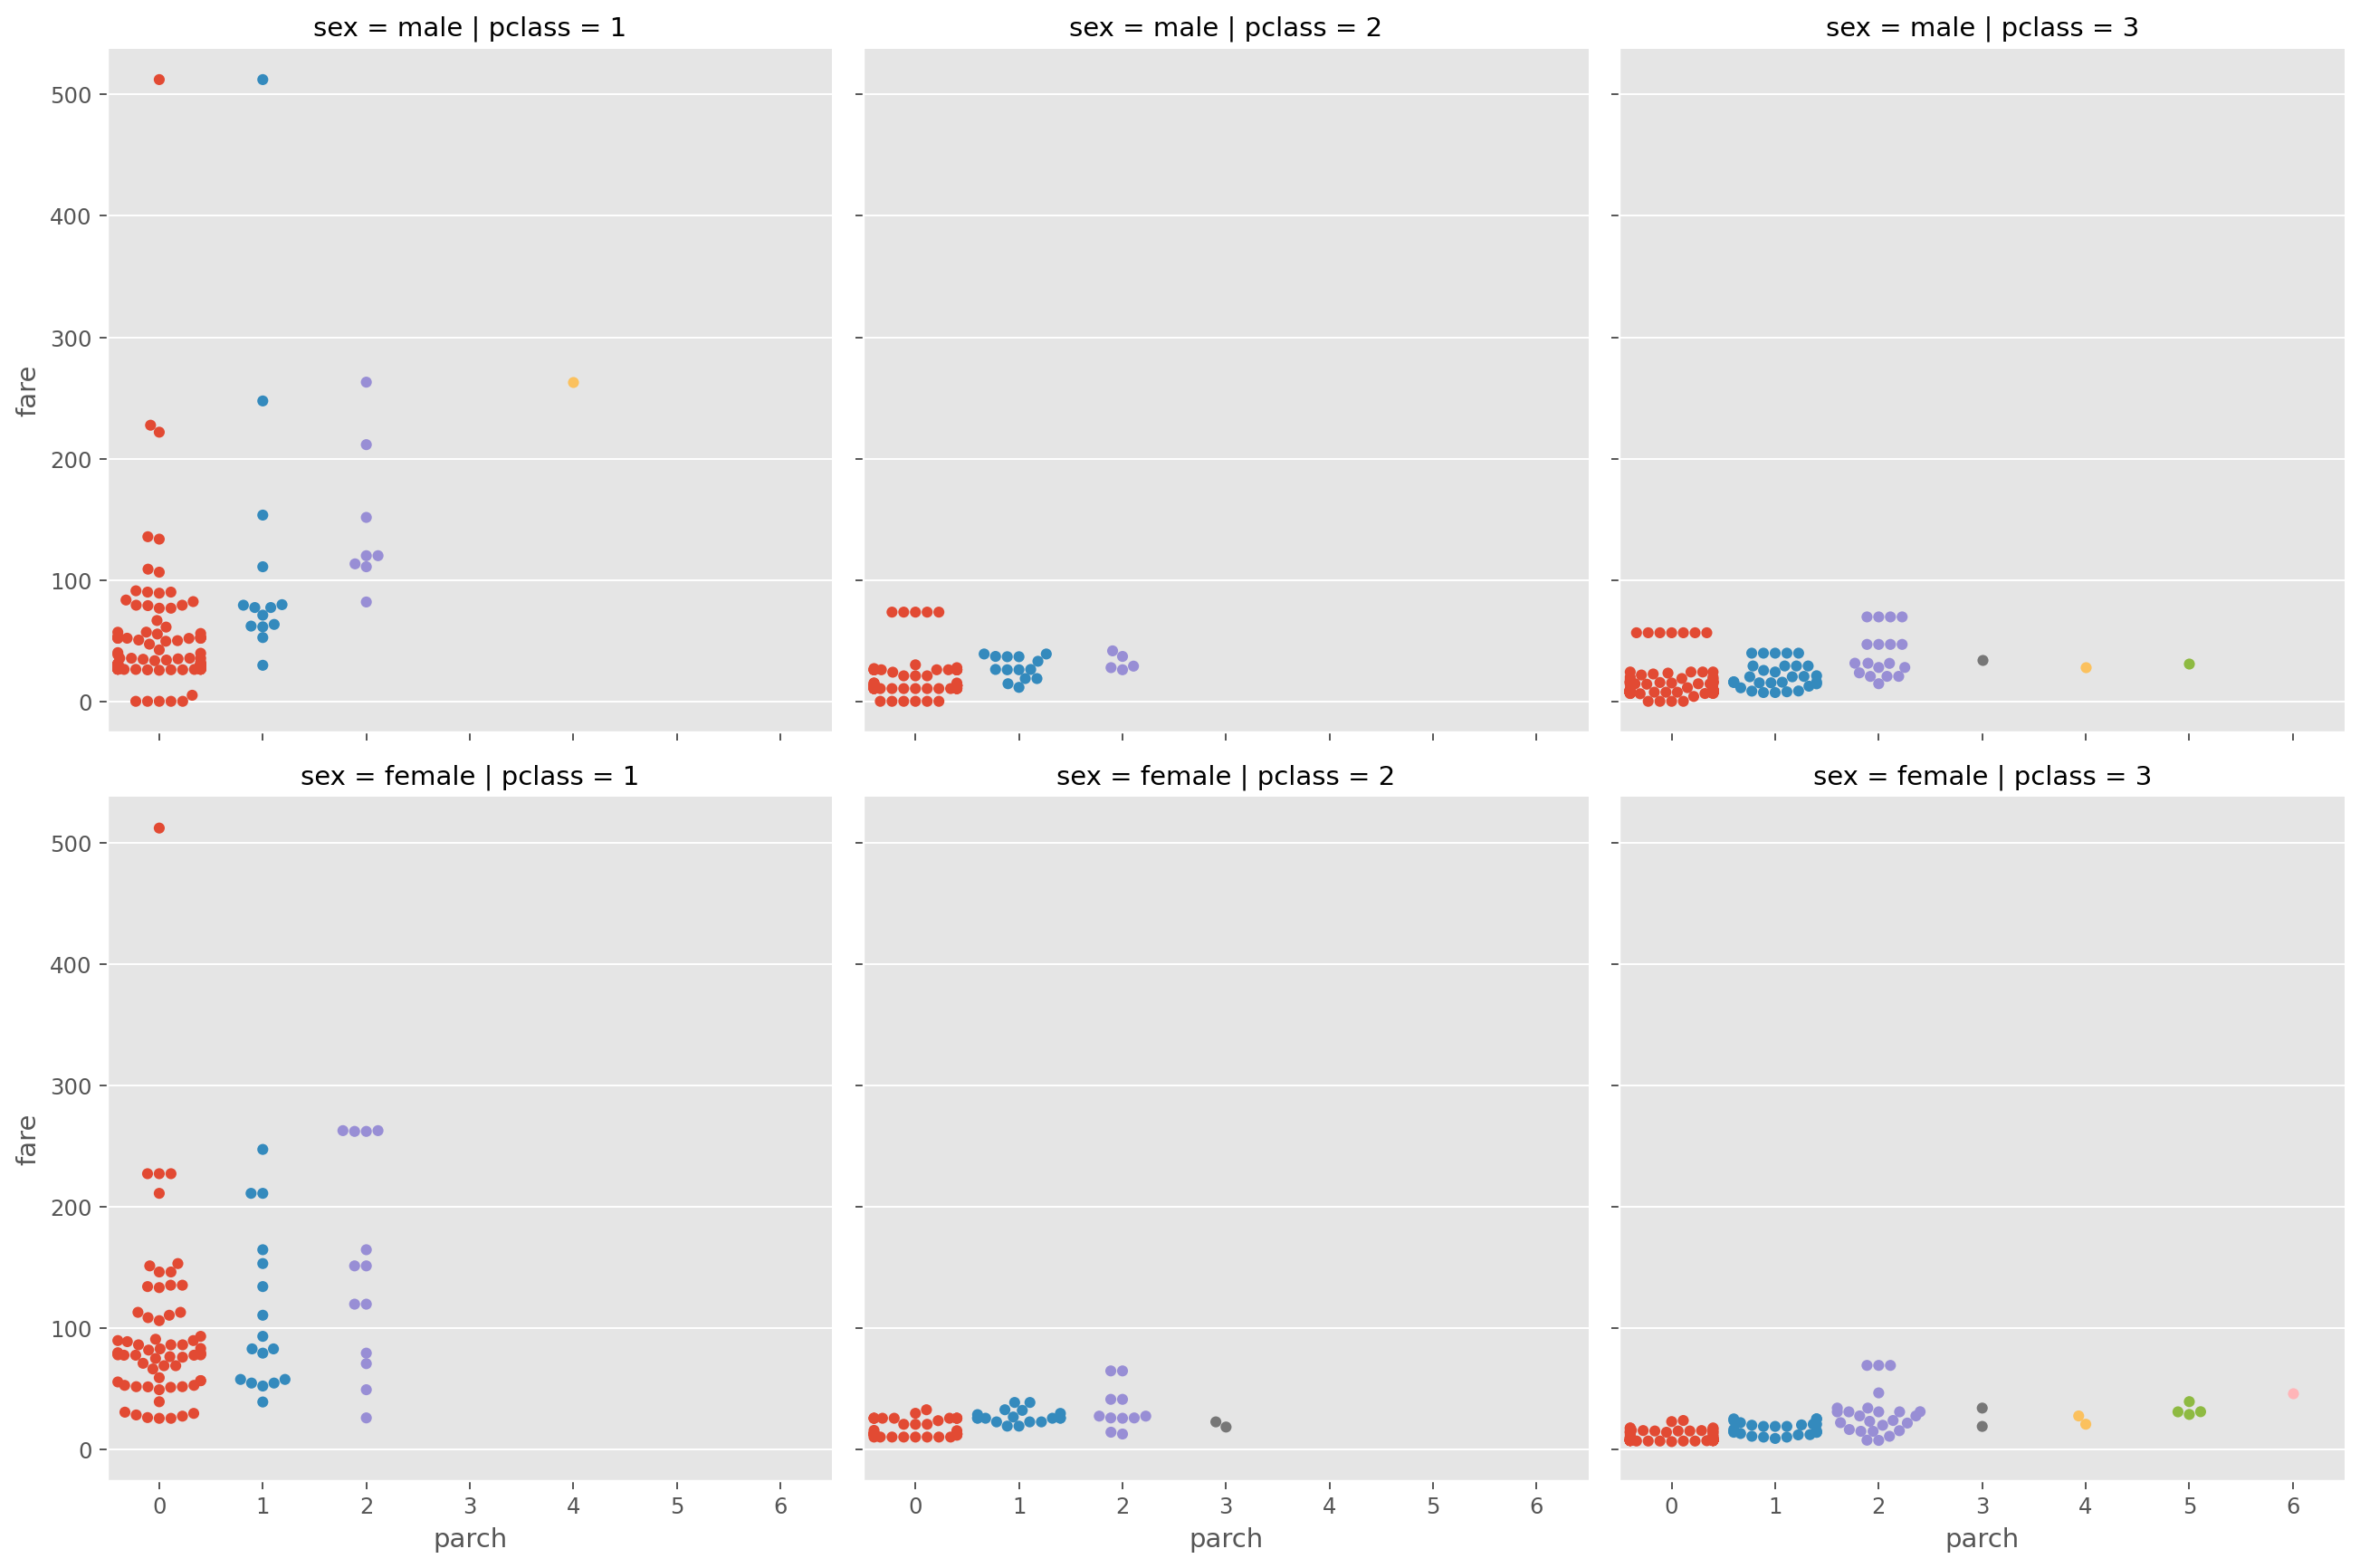

In [151]:
sns.catplot(x= 'parch', y= 'fare', data= titanic, kind='swarm', col='pclass', row='sex')

In [152]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

<AxesSubplot:>

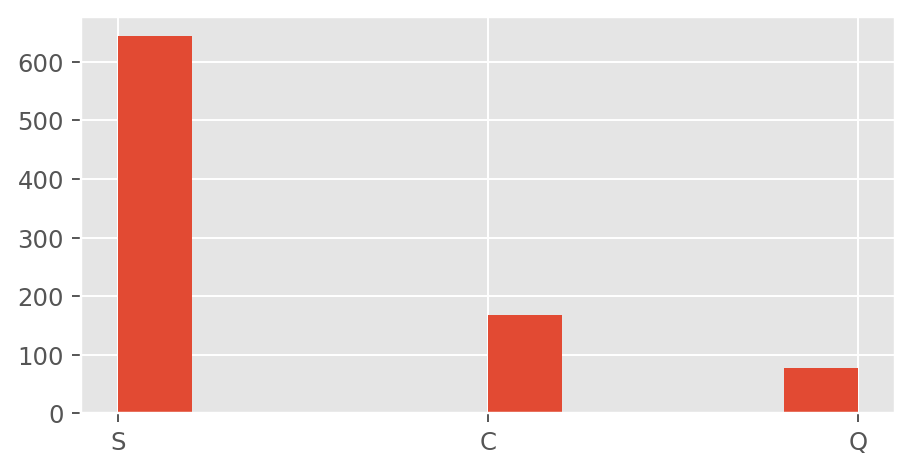

In [153]:
titanic['embarked'].hist()

<AxesSubplot:xlabel='embarked', ylabel='count'>

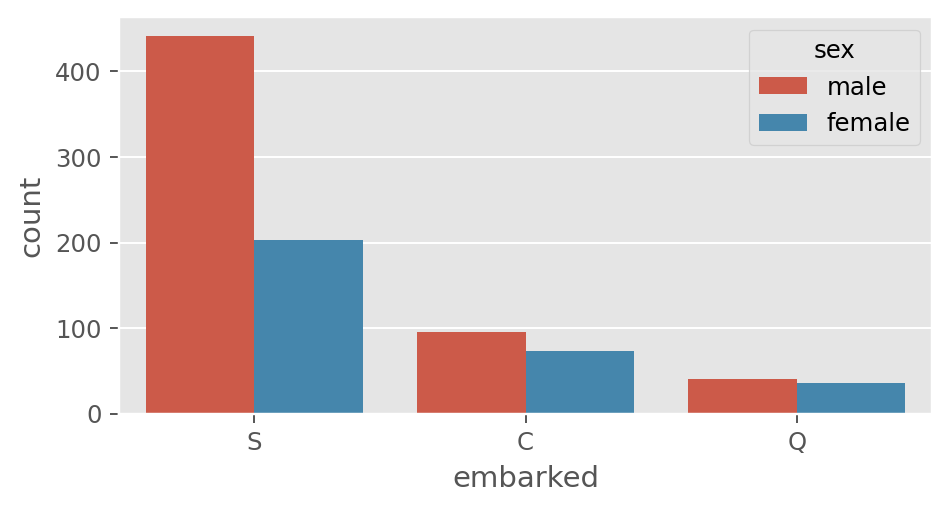

In [154]:
sns.countplot(x='embarked',data=titanic, hue='sex')

<AxesSubplot:xlabel='embarked', ylabel='count'>

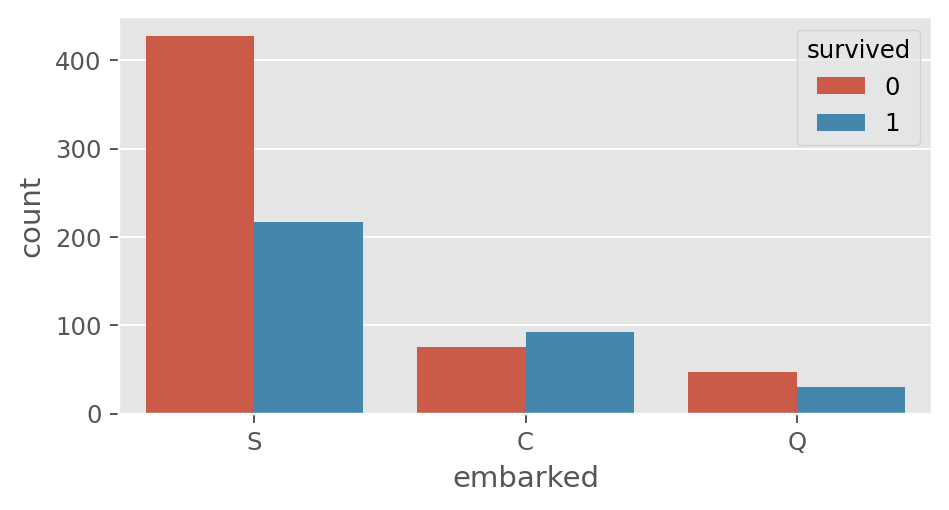

In [155]:
sns.countplot(x='embarked',data=titanic, hue='survived')

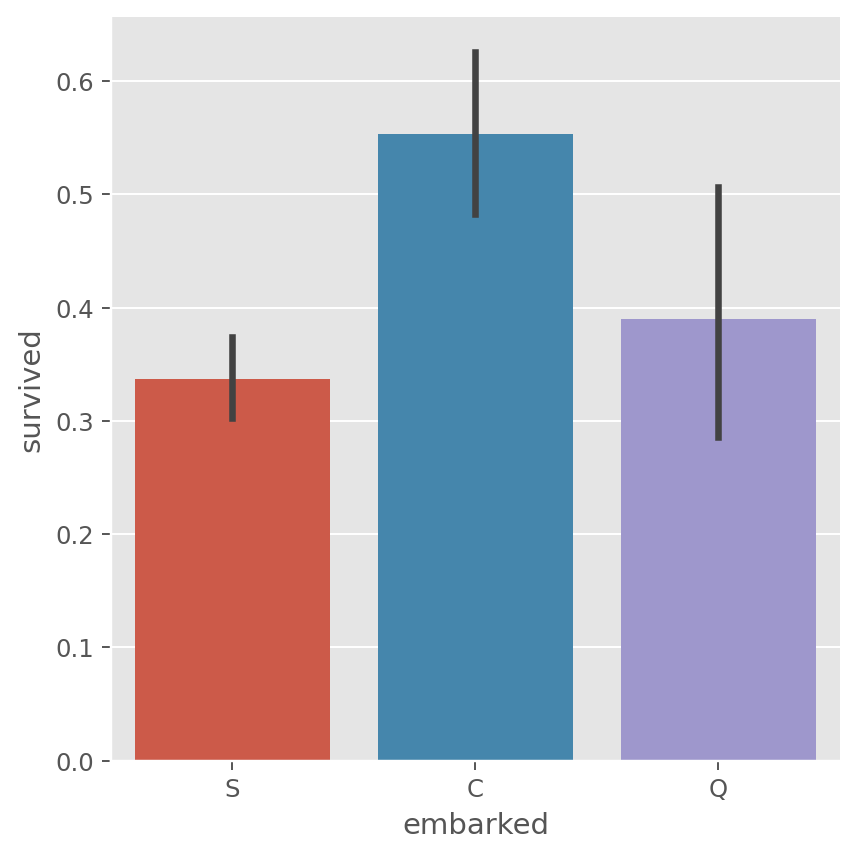

In [157]:
sns.catplot(x='embarked', y='survived', data=titanic, kind='bar')

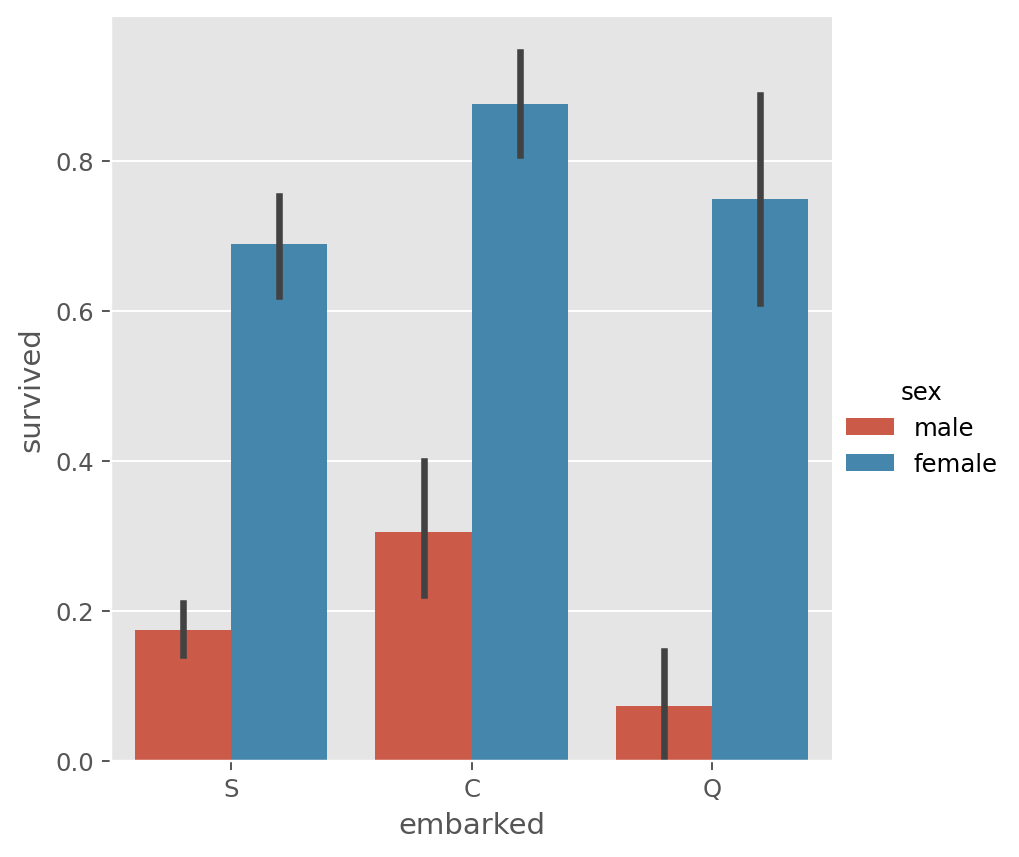

In [158]:
sns.catplot(x='embarked', y='survived', data=titanic, kind='bar', hue='sex')

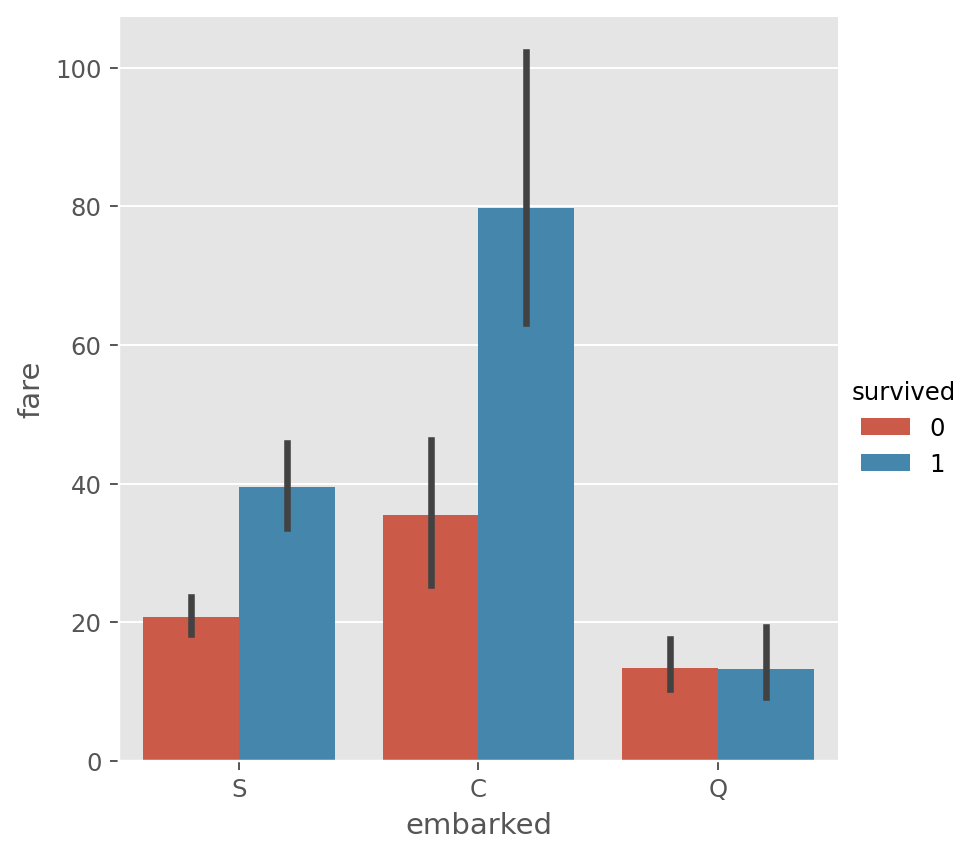

In [159]:
sns.catplot(x='embarked', y='fare', data=titanic, kind='bar', hue='survived')

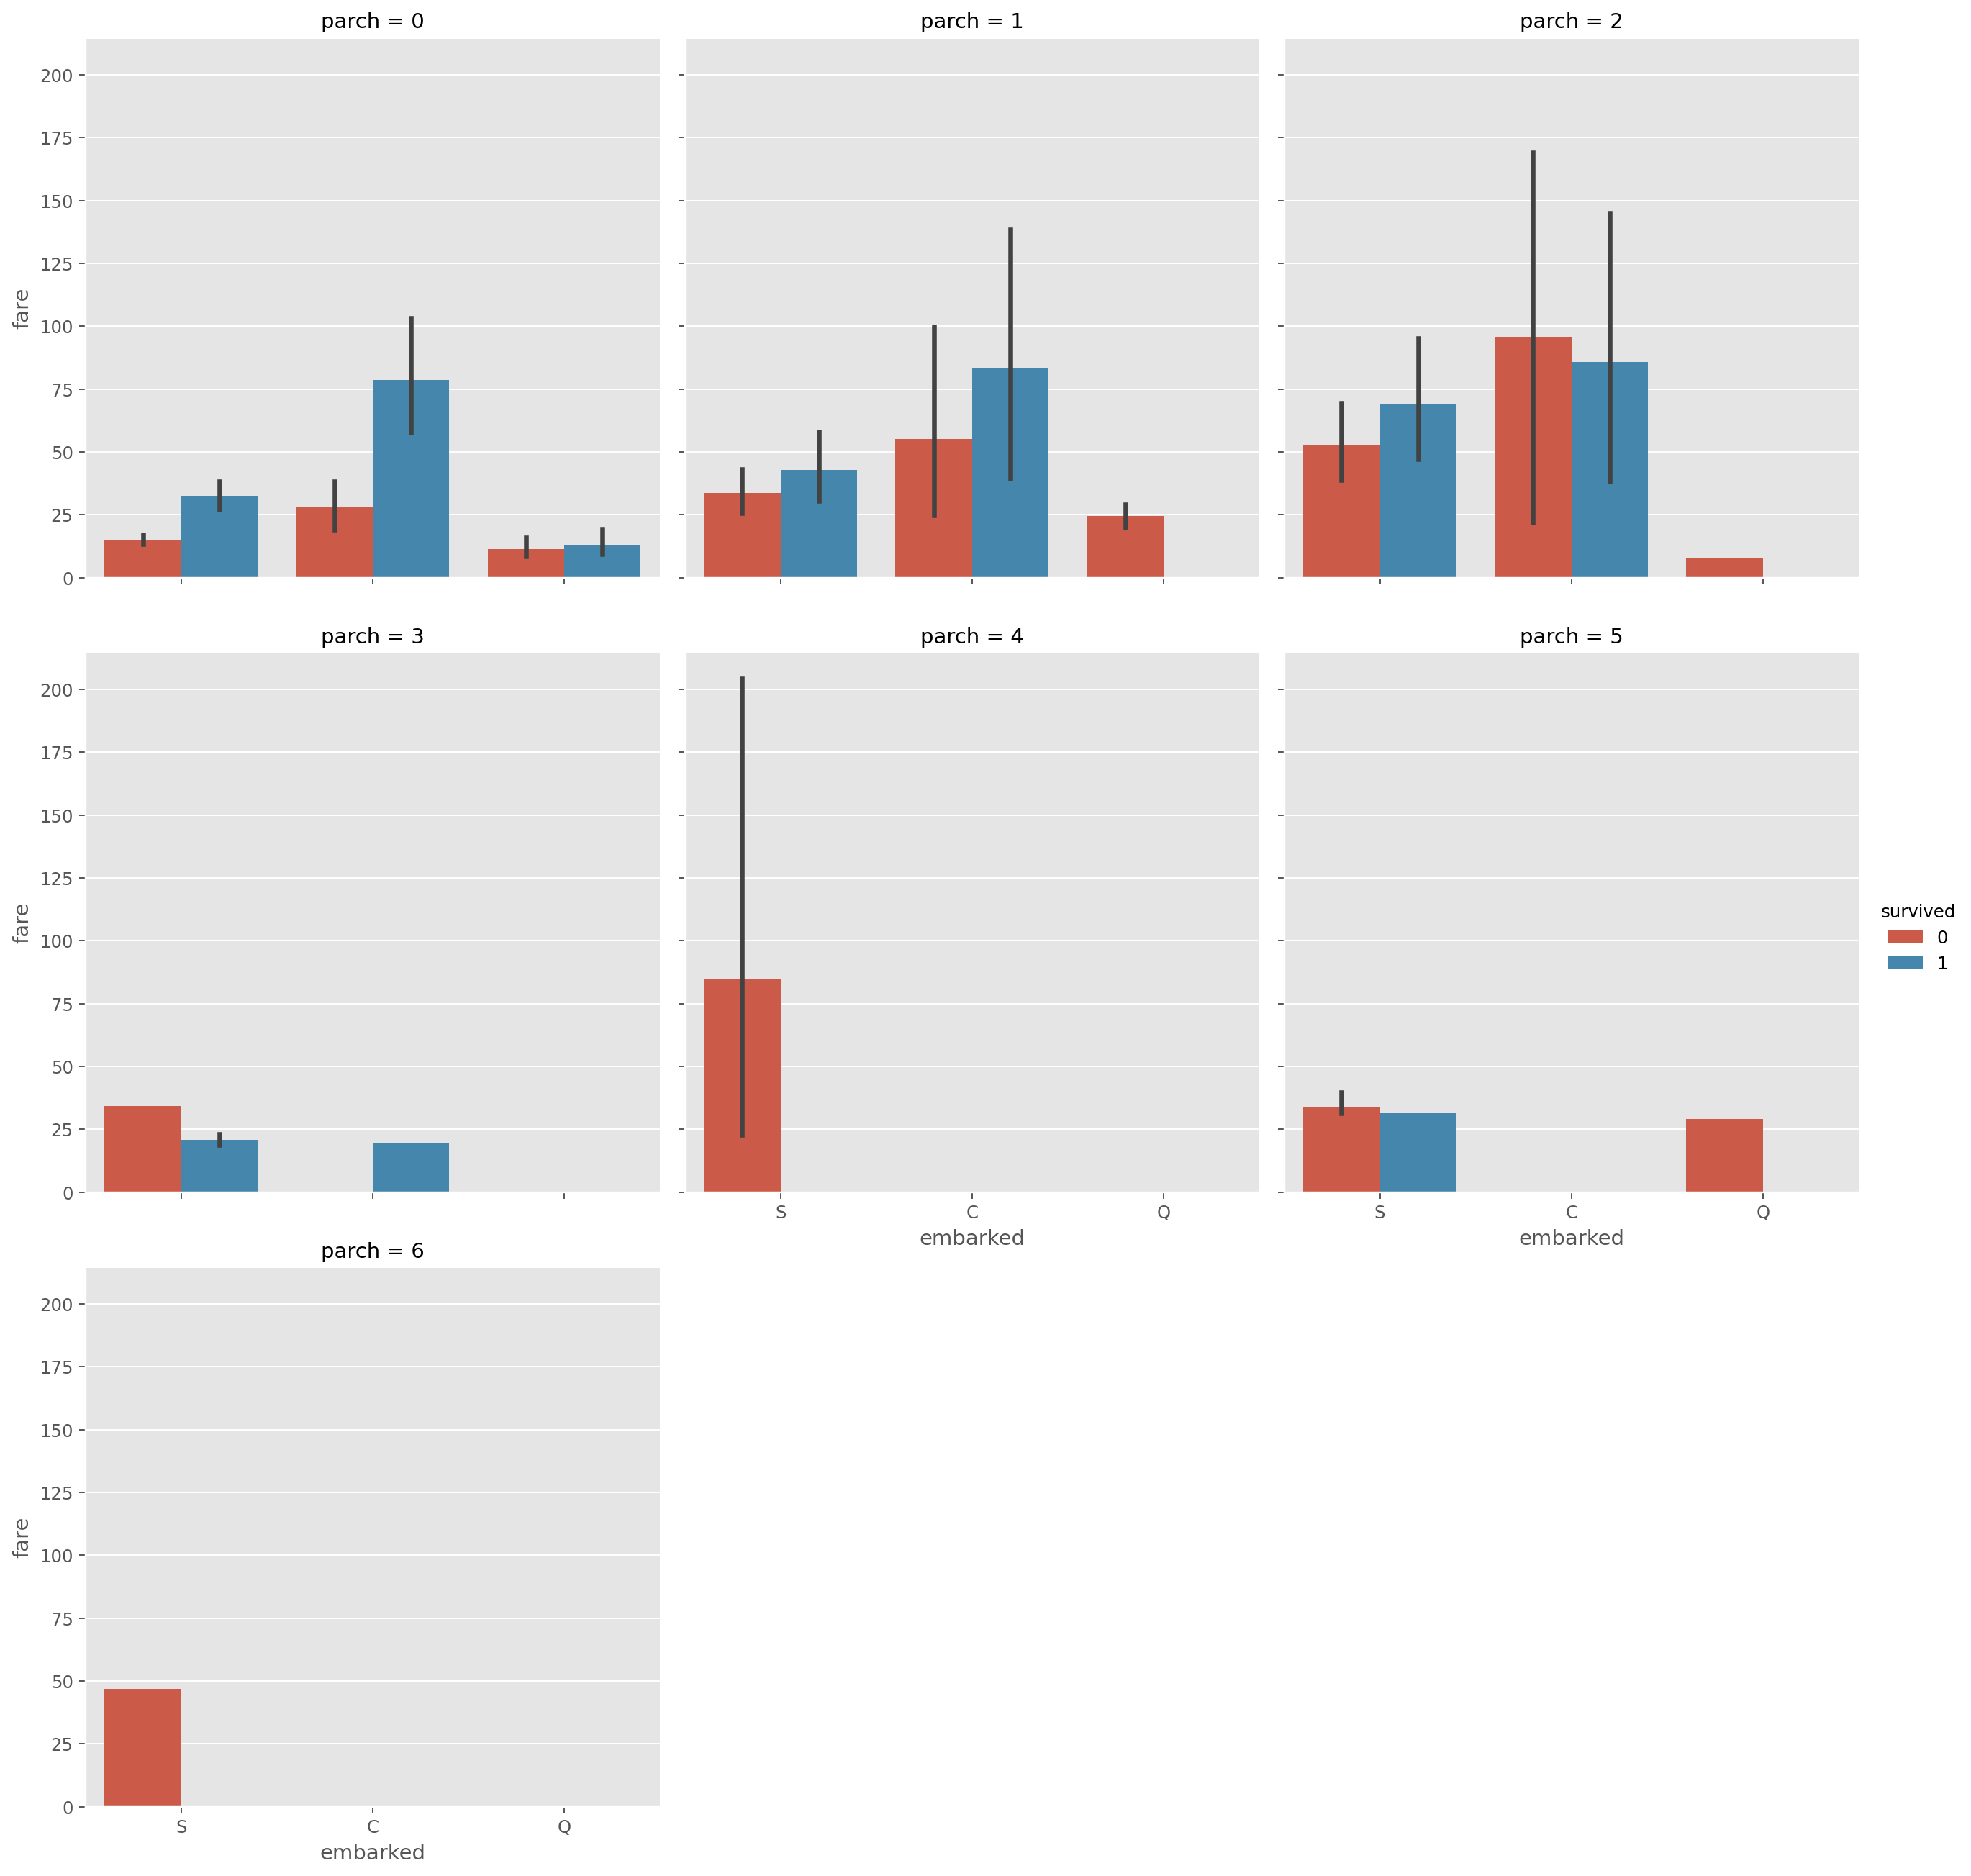

In [170]:
sns.catplot(x='embarked', y='fare', data=titanic, kind='bar', hue='survived', col='parch', col_wrap=3)

---
## Who
---

In [161]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

<AxesSubplot:xlabel='who', ylabel='count'>

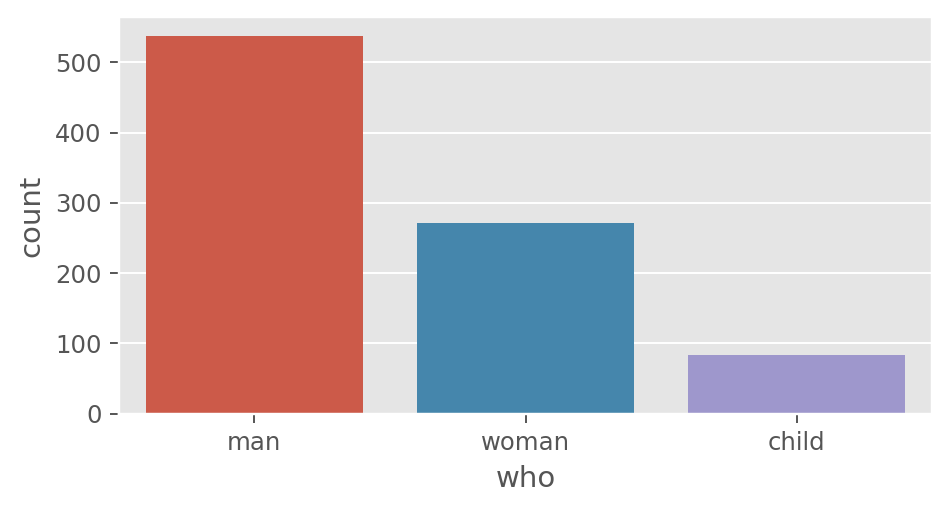

In [163]:
sns.countplot(x='who',data=titanic)

<AxesSubplot:xlabel='who', ylabel='count'>

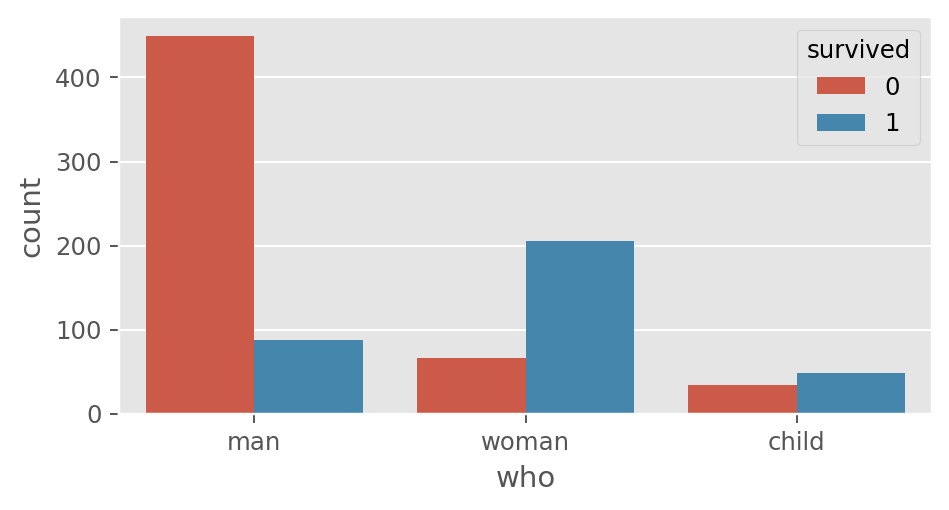

In [165]:
sns.countplot(x='who',data=titanic, hue='survived')

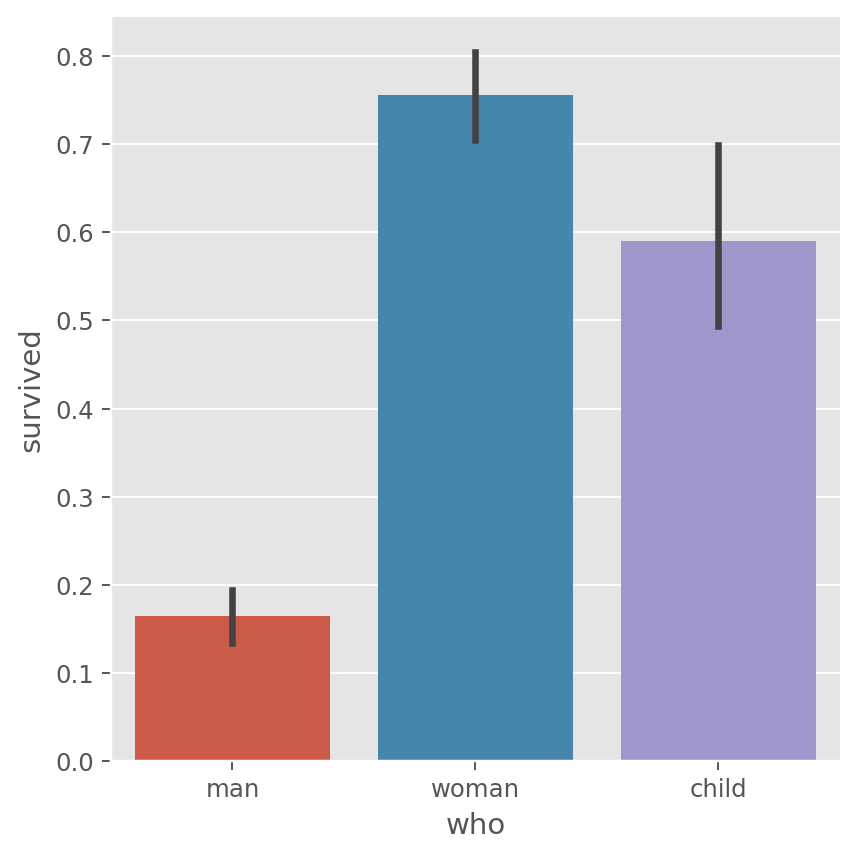

In [166]:
sns.catplot(x= 'who', y='survived', kind='bar', data= titanic)

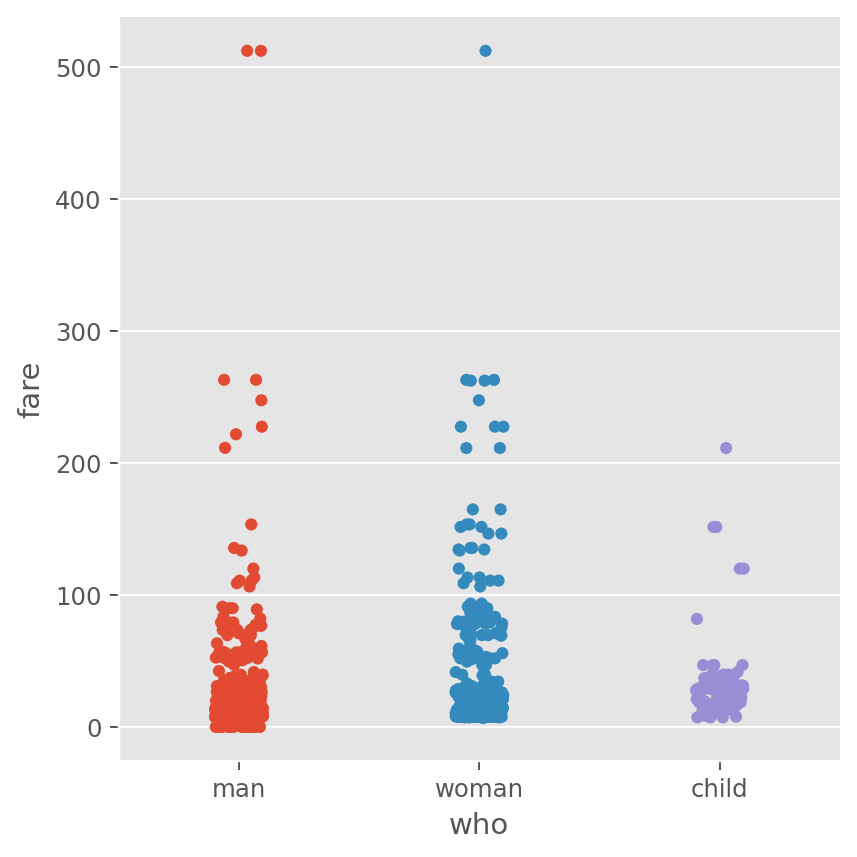

In [167]:
sns.catplot(x='who', y='fare',data=titanic)

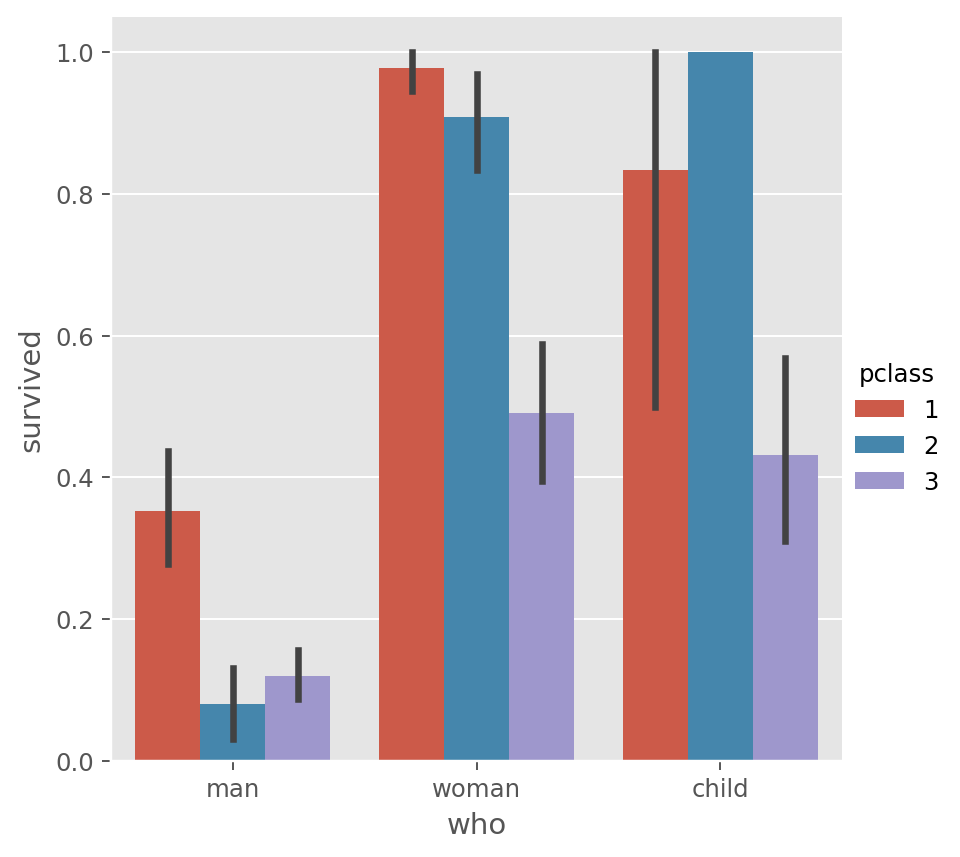

In [168]:
sns.catplot(x= 'who', y = 'survived', data= titanic, kind='bar', hue= 'pclass')

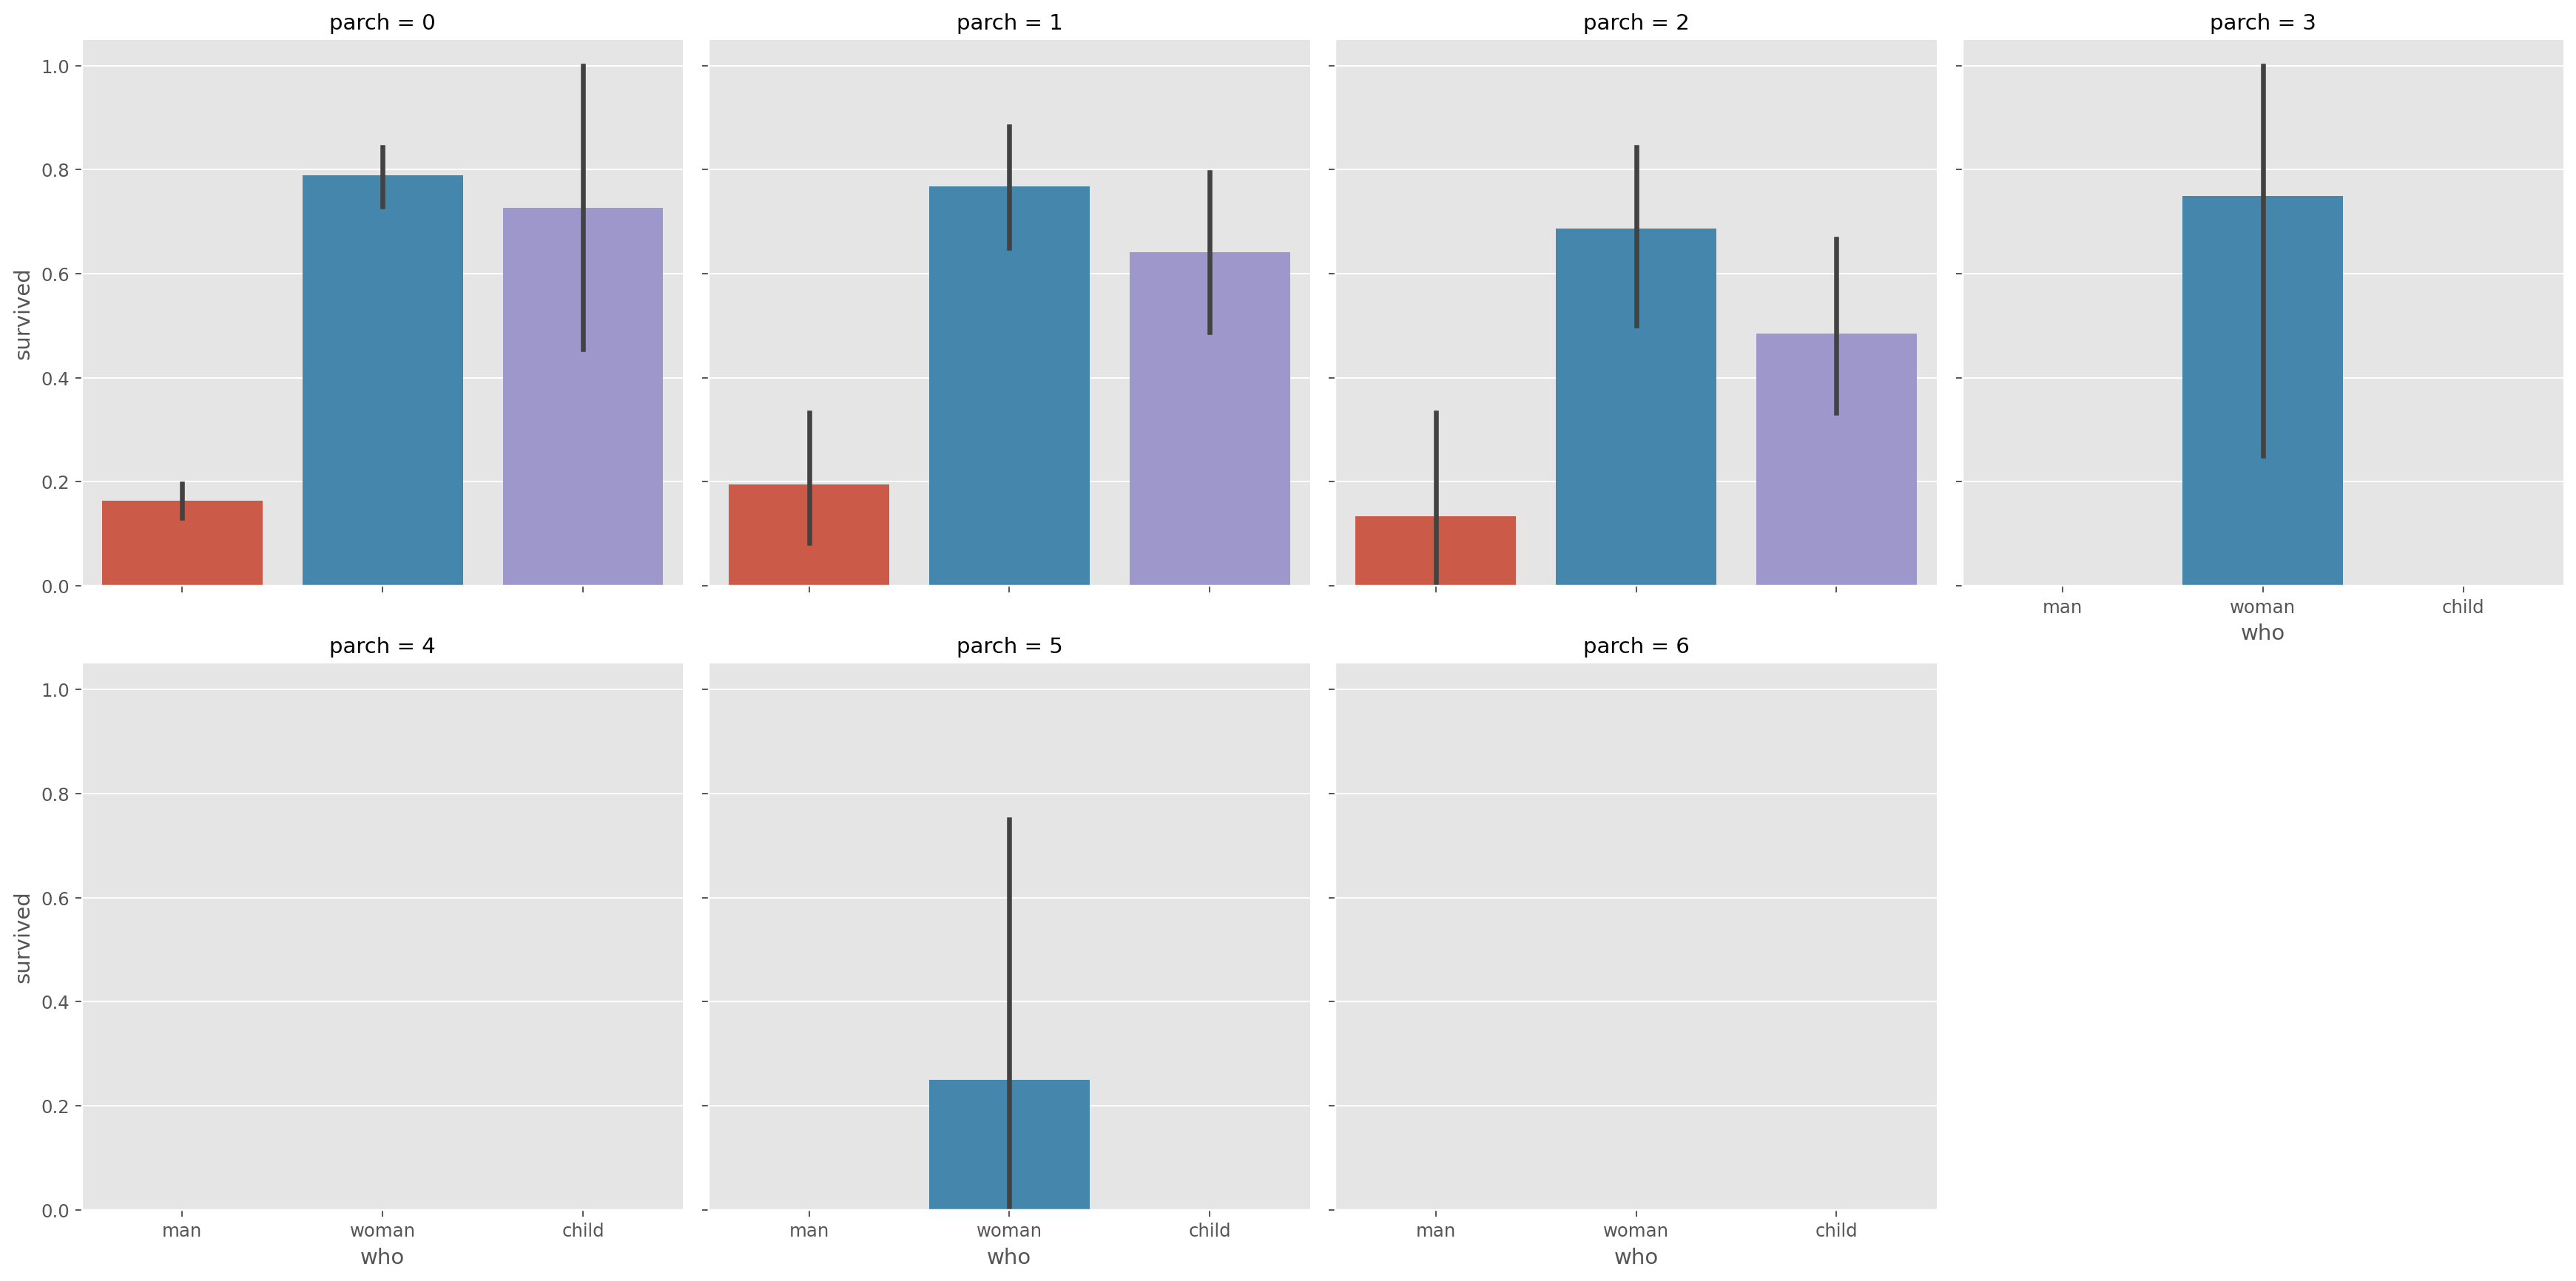

In [169]:
sns.catplot(x= 'who', y = 'survived', data= titanic, kind='bar', col= 'parch', col_wrap=4)